<a href="https://colab.research.google.com/github/jgjoao5/Projetos/blob/master/Hotel_Description_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 
import pandas as pd
import numpy as np
import string, os 
import warnings
!pip install langdetect
import langdetect
!pip install transformers
!pip install pytorch
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
!pip install tabulate
from tabulate import tabulate
!pip install wordcloud
from google.colab import drive
drive.mount('/content/gdrive')

# 0. Objetivo: 
Gerar descrições automatizadas para hoteis visando melhorias em SEO(Search Engine Optimization) para aumentar o rankeando em sites de buscas. 

# 1. Aplicando o modelo LSTM proposto no Artigo

Artigo de Referência:

https://towardsdatascience.com/automatically-generate-hotel-descriptions-with-lstm-afa37002d4fc

In [ ]:
#Carreando a base
hotel_df= pd.read_json('/content/gdrive/My Drive/Colab Notebooks/inventory_hotel_BR_pt.json')


In [ ]:
#Manipulando a base para diminuir o numero de linhas e trabalhar apenas com as colunas necessárias 
hotel_df = hotel_df[['name','description']]
hotel_df = hotel_df[0:500]
all_descriptions = list(hotel_df['description'].values)

hotel_df

,name,description
0,Best Western Hôtel New York Nice,"Located in Nice's city center, Best Western Ho..."
1,Comfort Inn Hyde Park,"In London's Bayswater district, the Comfort In..."
2,Best Western Plus Dayton Hotel & Suites,Breakfast is offered daily and rooms feature f...
3,"The Elizabeth Hotel, Autograph Collection","The Elizabeth Hotel, Autograph Collection feat..."
4,Grand Mercure Vila Olímpia,"Localizado no coração de São Paulo, o Grand Me..."
...,...,...
495,Kelta,"In the Hostería Kelta, located in the Province..."
496,WorldMark Running Y,"Offering an indoor swimming pool, this Klamath..."
497,Hotel Kirst,<h3>Localização Do Estabelecimento</h3>\nCom u...
498,Motel 6,A short drive from beautiful beaches and easil...


In [ ]:
hotel_df.shape


(500, 2)

In [ ]:
#Exemplo da descrção de um dos hoteis da base.
corpus = [x for x in all_descriptions]
corpus[:1]


["Located in Nice's city center, Best Western Hotel Lakmi Nice is located on Avenue Jean Medecin, Nice's main shopping street which leads to Place Massena. It is next to Nice Etoile Shopping Center and is just 1969 feet from Nice- Ville Train Station. Each spacious air-conditioned guest room has a flat- screen TV and a private bathroom fitted with a hairdryer. Some of the soundproofed rooms feature wrought iron furniture and some rooms offer a balcony. WiFi access is available throughout the hotel. A buffet breakfast is served every morning in the breakfast room at the Best Western Hotel Lakmi Nice. Newspapers are available for guests and there is also a bar on site. The Promenade des Anglais is a 13-minute walk from the hotel and Vieux Nice, the historic district, is a 15-minute walk away. Six private parking spaces are available on site at an additional cost, which cannot be booked in advance. ((* Sorry, this information is not available in the selected language and is shown in EN)."

In [ ]:
#Padronizando os textos(aplicação de letra minuscula,retirada de caracteres especiais) 
#levantamento de contagem de palavras e recorrência 

t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
t.fit_on_texts(corpus)

In [ ]:
from collections import OrderedDict
# A dictionary of words and their counts.
word_counts = t.word_counts
sorted_words = OrderedDict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))
top_30_words = list(sorted_words.items())[:30]
print("top30 palavras mais recorrentes:")
for word, count in top_30_words:
    print(f"{word}: {count}")


#print(t.word_counts.sorted())

# A dictionary of words and how many documents each appeared in.
#print(t.word_docs)

# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)
#print(t.document_count)

# A dictionary of words and their uniquely assigned integers.
#print(t.word_index)

top30 palavras mais recorrentes:
the: 2940
and: 2931
a: 2585
is: 2203
in: 1800
de: 1308
hotel: 994
mi: 942
of: 853
km: 847
this: 771
with: 758
from: 730
available: 718
at: 638
e: 597
1: 591
br: 580
as: 544
to: 517
are: 515
rooms: 505
free: 495
2: 474
0: 444
not: 435
en: 433
information: 430
selected: 430
language: 422


In [ ]:
!pip install --upgrade pip

!pip install --upgrade Pillow

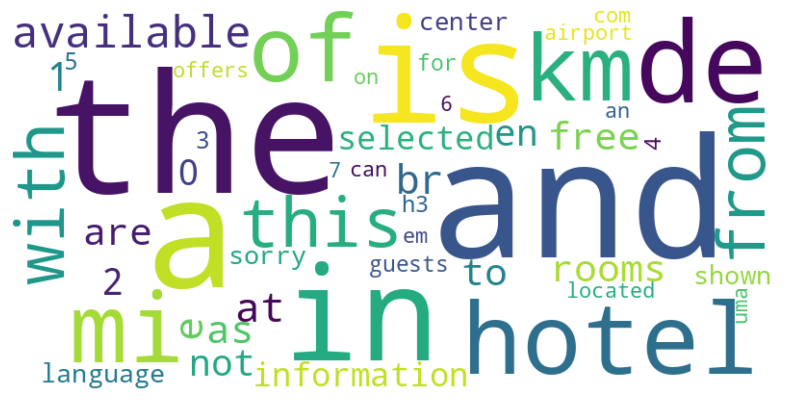

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_counts = t.word_counts

# Criar um dicionário de palavras para a nuvem
wordcloud_dict = {word: count for word, count in list(sorted_words.items())[:50]}

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
print('Found %s unique tokens.' % len(t.word_index))

Found 7553 unique tokens.


Tokenization: Padronizando os textos(aplicação de letra minuscula,retirada de caracteres especiais)
- Remoção de pontuação e caracteres especiais.
- Textos em sequências de palavras separadas por espaço em letras minúsculas.
- Divisão das sequencias em tokens.
- char_level=False : cada palavra será tratada como um token diferente de caractere.
- As listas de tokens são indexadas e vetorizadas.


In [ ]:
# Tokenization
t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def get_sequence_of_tokens(corpus):
    t.fit_on_texts(corpus)
    total_words = len(t.word_index) + 1
    
    input_sequences = []
    for line in corpus:
        token_list = t.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
            
    return input_sequences, total_words

In [ ]:
input_sequences, total_words = get_sequence_of_tokens(corpus)


As frases passam a ser representadas por números.

"Located(45) in Nice's city center, Best Western Hotel Lakmi Nice is located(45) on Avenue Jean Medecin" é representado pela sequencia abaixo:

In [ ]:
input_sequences[:15]

[[45, 5],
 [45, 5, 2698],
 [45, 5, 2698, 94],
 [45, 5, 2698, 94, 33],
 [45, 5, 2698, 94, 33, 279],
 [45, 5, 2698, 94, 33, 279, 343],
 [45, 5, 2698, 94, 33, 279, 343, 7],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43, 1338],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43, 1338, 3870],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43, 1338, 3870, 3871]]

In [ ]:
corpus[:1]

["Located in Nice's city center, Best Western Hotel Lakmi Nice is located on Avenue Jean Medecin, Nice's main shopping street which leads to Place Massena. It is next to Nice Etoile Shopping Center and is just 1969 feet from Nice- Ville Train Station. Each spacious air-conditioned guest room has a flat- screen TV and a private bathroom fitted with a hairdryer. Some of the soundproofed rooms feature wrought iron furniture and some rooms offer a balcony. WiFi access is available throughout the hotel. A buffet breakfast is served every morning in the breakfast room at the Best Western Hotel Lakmi Nice. Newspapers are available for guests and there is also a bar on site. The Promenade des Anglais is a 13-minute walk from the hotel and Vieux Nice, the historic district, is a 15-minute walk away. Six private parking spaces are available on site at an additional cost, which cannot be booked in advance. ((* Sorry, this information is not available in the selected language and is shown in EN)."

In [ ]:
total_words

7554

Deixando as sequences com o mesmo comprimento, transformando numeros inteiros em uma matriz 2D (num_samples,maxlen)

In [ ]:
# pad sequences 
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes = total_words)
    
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(input_sequences)

Criando o Modelo:
- Modelo LSTM com 100 unidades de memória
- Dropout com probalidade de 10.
- Problema de classificação de palavra com 7553 classes.
- Camada de saída Dense com ativação em softmax.
- Uso de otimização ADAM para velocidade

In [ ]:
def create_model(max_sequence_len, total_words):
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=max_sequence_len - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 727, 10)           75540     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 7554)              762954    
                                                                 
Total params: 882,894
Trainable params: 882,894
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(predictors, label, epochs=10, verbose=5)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
def generate_text(seed_text, next_words, model, max_seq_len):
    for _ in range(next_words):
        token_list = t.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ''
        
        for word,index in t.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        seed_text = seed_text + " " + output_word
        
    return seed_text.title()

In [ ]:
print(generate_text("hilton seattle downtown", 100, model, max_sequence_len))


Hilton Seattle Downtown Hotel Is Located In The Heart Of The Historic Of The Hotel In The Heart Of The Heart Of The Heart Of The Hotel The Hotel Is Within Walking Distance Of The Hotel And The Beach Of The Hotel The Hotel Is Within Walking Distance Of The Hotel And The Hotel Is Just Minutes Away From The Hotel And The Hotel Is A Short Drive Away The Hotel Is A Short Drive Away And A Variety Of The Hotel The Hotel Offers A Variety Of The Hotel In The Hotel In The Hotel In The Heart Of The Heart Of


In [ ]:
print(generate_text("Holiday Inn Express - New York City, City-center hotel, walk to Madison Square Garden", 100, model, max_sequence_len))

Holiday Inn Express - New York City, City-Center Hotel, Walk To Madison Square Garden By Wyndham Wapakoneta Is A Short Drive From The Beach Of The Beach The Hotel Is Just A Short Drive From The Hotel And The Beach Of The City Of The Hotel The Hotel Is Just Close From The Historic Of The The Conditioned And The Hotel The Hotel Is Just Minutes From The Historic Of The Hotel The Hotel Is Within Walking Distance Of The Hotel The Hotel Is Just A Short Drive Away And A Variety Of The Hotel The Hotel Offers A Variety Of The Hotel In The Hotel In The Hotel In The Hotel In The


# 2. - Classificando as descrições por idioma


### 2.1 Apenas descrições em português

- Identificação do idioma das descrições, visando otimizar o modelo.
- Utilização da Descrição curta e aumanto das camadas de teste.

In [ ]:
data = pd.read_json('/content/gdrive/My Drive/Colab Notebooks/inventory_hotel_BR_pt.json')
data = data[['short_description','description']]


In [ ]:
data['idioma'] = ''


for i in range(len(data['description'])):
    description = str(data['description'][i])
    if description.strip() and len(description) > 3:
        data.at[i, 'idioma'] = langdetect.detect(description)
    else:
        data.at[i, 'idioma'] = 'Desconhecido'

data

,short_description,description,idioma
0,"Nice, France. ((* Sorry, this information is n...","Located in Nice's city center, Best Western Ho...",en
1,Notting Hill - Paddington Station Area. ((* So...,"In London's Bayswater district, the Comfort In...",en
2,Há várias opções de lazer e entretenimento ao ...,Breakfast is offered daily and rooms feature f...,en
3,"Fort Collins North. ((* Sorry, this informatio...","The Elizabeth Hotel, Autograph Collection feat...",en
4,"Localizado no coração de São Paulo, o Grand Me...","Localizado no coração de São Paulo, o Grand Me...",pt
...,...,...,...
101873,"Haines City. ((* Sorry, this information is no...",The Rodeway Inn & Suites hotel is a 15 minutes...,en
101874,"Hotel Mi Colombia is a central hotel, ideal fo...","Hotel Mi Colombia is a central hotel, ideal fo...",en
101875,"Vouliagmeni. ((* Sorry, this information is no...","Located in the exclusive area of Vouliagmeni, ...",en
101876,"Property Location : Located in Marmaris, Umut ...","Property Location : Located in Marmaris, Umut ...",en


In [ ]:
name_counts = data['idioma'].value_counts()
name_counts_df = pd.DataFrame({'Nome': name_counts.index, 'Contagem': name_counts.values})
total = name_counts_df['Contagem'].sum()
name_counts_df['Percentual'] = (name_counts_df['Contagem'] / total * 100).round(1)
table = tabulate(name_counts_df, headers='keys', tablefmt='fancy_grid')
print(table)

╒════╤══════════════╤════════════╤══════════════╕
│    │ Nome         │   Contagem │   Percentual │
╞════╪══════════════╪════════════╪══════════════╡
│  0 │ en           │      88574 │         86.9 │
├────┼──────────────┼────────────┼──────────────┤
│  1 │ pt           │      12568 │         12.3 │
├────┼──────────────┼────────────┼──────────────┤
│  2 │ es           │        344 │          0.3 │
├────┼──────────────┼────────────┼──────────────┤
│  3 │ Desconhecido │        303 │          0.3 │
├────┼──────────────┼────────────┼──────────────┤
│  4 │ tr           │         41 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  5 │ ro           │         25 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  6 │ fr           │         11 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  7 │ de           │          4 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  8 │ ca           │          3 │          0   │


In [ ]:
hotelBR_df= data[data['idioma']=='pt']
hotelBR_df.reset_index(inplace = True)
hotelBR_df = hotelBR_df[0:300]

In [ ]:
hotelBR_df

,index,short_description,description,idioma
0,4,"Localizado no coração de São Paulo, o Grand Me...","Localizado no coração de São Paulo, o Grand Me...",pt
1,8,Com uma estadia Candiland Apartment em Semaran...,<h3>Localização Do Estabelecimento</h3>\nCom u...,pt
2,10,"Deleite-se com uma ida ao spa, que oferece mas...",<h3>Localização Do Estabelecimento</h3>\nEm La...,pt
3,21,Este agradável hotel encontra-se em Norco Area...,"Não perca as atividades de recreação, como uma...",pt
4,24,"Em Chetumal, Hotel Mexico ficará a 2 minuto(s)...",<h3>Localização Do Estabelecimento</h3>\nEm Ch...,pt
...,...,...,...,...
295,2192,Estilo e conforto completam as 172 acomodações...,Estilo e conforto completam as 172 acomodações...,pt
296,2195,Contemple fantásticas vistas a partir da açote...,Aprecie a vista em um terraço e um jardim e ap...,pt
297,2222,Algumas das comodidades e serviços em destaque...,"Aproveite a conveniência de comodidades, como ...",pt
298,2235,Participe nas várias atividades recreativas do...,Participe nas várias atividades recreativas do...,pt


In [ ]:
all_descriptionsBR = list(hotelBR_df['short_description'].values)

hotelBR_df.describe()

,index
count,300.000000
mean,1111.026667
std,673.133783
min,4.000000
25%,524.500000
50%,1135.500000
75%,1676.000000
max,2253.000000


In [ ]:
hotelBR_df.columns

Index(['index', 'short_description', 'description', 'idioma'], dtype='object')

In [ ]:
#hotelBR_df[['name','price_currency','possible_integrators','description','short_description','small_description']]

In [ ]:
corpusBR = [x for x in all_descriptionsBR]
corpusBR[:1]


['Localizado no coração de São Paulo, o Grand Mercure SP Vila Olimpia (ex Caesar Business) está próximo a grandes centros financeiros e importantes empresas. Por perto, há também excelentes bares e restaurantes, shoppings e variados locais de entreteni']

In [ ]:
tBR = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tBR.fit_on_texts(corpusBR)

In [ ]:
# A dictionary of words and their counts.
print(tBR.word_counts)

# A dictionary of words and how many documents each appeared in.
#print(tBR.word_docs)

# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)
#print(tBR.document_count)

# A dictionary of words and their uniquely assigned integers.
#print(tBR.word_index)

OrderedDict([('localizado', 20), ('no', 75), ('coração', 5), ('de', 646), ('são', 30), ('paulo', 4), ('o', 158), ('grand', 5), ('mercure', 1), ('sp', 2), ('vila', 3), ('olimpia', 1), ('ex', 2), ('caesar', 1), ('business', 1), ('está', 46), ('próximo', 11), ('a', 320), ('grandes', 1), ('centros', 1), ('financeiros', 1), ('e', 516), ('importantes', 2), ('empresas', 1), ('por', 9), ('perto', 2), ('há', 6), ('também', 27), ('excelentes', 1), ('bares', 5), ('restaurantes', 5), ('shoppings', 3), ('variados', 2), ('locais', 6), ('entreteni', 1), ('com', 102), ('uma', 241), ('estadia', 18), ('candiland', 1), ('apartment', 5), ('em', 102), ('semarang', 3), ('ficará', 20), ('5', 41), ('minutos', 36), ('carro', 23), ('indonesia', 2), ('kaya', 1), ('park', 9), ('old', 2), ('post', 1), ('office', 1), ('este', 62), ('hotel', 131), ('2', 57), ('km', 96), ('1', 26), ('mi', 53), ('akademi', 1), ('kepolisian', 1), ('3', 28), ('ciputra', 1), ('mall', 1), ('deleite', 7), ('se', 67), ('ida', 11), ('ao', 88

In [ ]:
print('Found %s unique tokens.' % len(tBR.word_index))

Found 1886 unique tokens.


In [ ]:
# Tokenization
tBR = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def get_sequence_of_tokensBR(corpusBR):
    tBR.fit_on_texts(corpusBR)
    total_wordsBR = len(tBR.word_index) + 1
    
    input_sequencesBR = []
    for line in corpusBR:
        token_list = tBR.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequencesBR.append(n_gram_sequence)
            
    return input_sequencesBR, total_wordsBR

In [ ]:
input_sequencesBR, total_wordsBR = get_sequence_of_tokensBR(corpusBR)


In [ ]:
input_sequencesBR[:10]

[[101, 23],
 [101, 23, 245],
 [101, 23, 245, 1],
 [101, 23, 245, 1, 62],
 [101, 23, 245, 1, 62, 286],
 [101, 23, 245, 1, 62, 286, 5],
 [101, 23, 245, 1, 62, 286, 5, 246],
 [101, 23, 245, 1, 62, 286, 5, 246, 705],
 [101, 23, 245, 1, 62, 286, 5, 246, 705, 447],
 [101, 23, 245, 1, 62, 286, 5, 246, 705, 447, 341]]

In [ ]:
total_wordsBR

1887

In [ ]:
# pad sequences 
def generate_padded_sequencesBR(input_sequencesBR):
    max_sequence_lenBR = max([len(x) for x in input_sequencesBR])
    input_sequencesBR = np.array(pad_sequences(input_sequencesBR, maxlen = max_sequence_lenBR, padding = 'pre'))
    predictorsBR, labelBR = input_sequencesBR[:,:-1],input_sequencesBR[:,-1]
    labelBR = ku.to_categorical(labelBR, num_classes = total_wordsBR)
    
    return predictorsBR, labelBR, max_sequence_lenBR

predictorsBR, labelBR, max_sequence_lenBR = generate_padded_sequencesBR(input_sequencesBR)

In [ ]:
def create_modelBR(max_sequence_lenBR, total_wordsBR):
    modelBR = Sequential()
    
    # Add Input Embedding Layer
    modelBR.add(Embedding(total_wordsBR, 10, input_length=max_sequence_lenBR - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    modelBR.add(LSTM(100))
    modelBR.add(Dropout(0.1))
    
    # Add Output Layer
    modelBR.add(Dense(total_wordsBR, activation='softmax'))

    modelBR.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return modelBR

modelBR = create_modelBR(max_sequence_lenBR, total_wordsBR)
modelBR.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 55, 10)            18870     
                                                                 
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1887)              190587    
                                                                 
Total params: 253,857
Trainable params: 253,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelBR.fit(predictorsBR, labelBR, epochs=50, verbose=1)

Epoch 1/50
321/321 [==============================] - 34s 98ms/step - loss: 6.1791 - accuracy: 0.0616
Epoch 2/50
321/321 [==============================] - 10s 31ms/step - loss: 5.6153 - accuracy: 0.0627
Epoch 3/50
321/321 [==============================] - 4s 13ms/step - loss: 5.2359 - accuracy: 0.0804
Epoch 4/50
321/321 [==============================] - 4s 13ms/step - loss: 4.8889 - accuracy: 0.1214
Epoch 5/50
321/321 [==============================] - 4s 12ms/step - loss: 4.5709 - accuracy: 0.1767
Epoch 6/50
321/321 [==============================] - 5s 16ms/step - loss: 4.3631 - accuracy: 0.2075
Epoch 7/50
321/321 [==============================] - 3s 9ms/step - loss: 4.1086 - accuracy: 0.2532
Epoch 8/50
321/321 [==============================] - 3s 9ms/step - loss: 3.8779 - accuracy: 0.2801
Epoch 9/50
321/321 [==============================] - 3s 9ms/step - loss: 3.6824 - accuracy: 0.3101
Epoch 10/50
321/321 [==============================] - 3s 8ms/step - loss: 3.5050 - accuracy

In [ ]:
def generate_textBR(seed_textBR, next_wordsBR, modelBR, max_seq_lenBR):
    for _ in range(next_wordsBR):
        token_listBR = tBR.texts_to_sequences([seed_textBR])[0]
        token_listBR = pad_sequences([token_listBR], maxlen=max_seq_lenBR-1, padding='pre')
        
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(modelBR.predict(token_listBR, verbose=0), axis=-1)
        output_word = ''
        
        for word,index in tBR.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        seed_textBR = seed_textBR + " " + output_word
        
    return seed_textBR.title()

In [ ]:
print(generate_textBR("Buzios Beach localizado em Buzios", 100, modelBR, max_sequence_lenBR))

Buzios Beach Localizado Em Buzios Chetumal Hotel Mexico Ficará A 3 Minuto S De Carro De Gypsum Creek Beach E A 2 Minutos De Carro De Corso De Aires E A 4 4 Km 2 2 Mi De Praia De La Independencia Contemple Fantá H3 Este Hotel Fica A 16 3 Km De Uni Slugger Museum E A 8 Km De Thong Pavilion Beach E A 13 9 Km De Pal Laem Mae P Este Hotel Fica A Mesma Km De Glenwood Hot Springs H3 Este Aparthotel H3 A 4 Km Em St Férias Esta Residencial Está A 9 Km De Louisville Slugger Poderá Axé


In [ ]:
print(generate_textBR("Hotel localizado em Copacabana", 100, modelBR, max_sequence_lenBR))

Modernos Hotel Oferece Várias Salas De Thong Plana E A 2 2 Km 0 6 Mi De Praia Fica A 2 Km Entre De Praia São Horas E A 2 Km Com 2 Km Ou Aquela Tacada Perfeita Os Ainda De Brasília Entre A Parque Exteriores De Aeroporto De Barreirinhas De Neg Família Do Porto Brasi Perisur A 6 Km 6 6 Piscinas


In [ ]:
# Avaliação do modelo
accuracy = modelBR.evaluate(predictorsBR, labelBR)[1]
print("Accuracy:", accuracy)

321/321 [==============================] - 2s 5ms/step - loss: 0.7236 - accuracy: 0.8378
Accuracy: 0.8378483653068542


### 2.2 Apenas descrições em inglês

In [ ]:
hotelUS  = data[data['description']!='']
hotelUS = hotelUS[0:150]

In [ ]:
langdetect.detect(str(hotelUS['description'][2]))

'en'

In [ ]:
hotelUS= hotelUS[hotelUS['idioma']=='en']

In [ ]:
hotelUS.reset_index(inplace= True)

In [ ]:
hotelUS.drop(columns = 'index',inplace= True)
hotelUS

,short_description,description,idioma
0,"Nice, France. ((* Sorry, this information is n...","Located in Nice's city center, Best Western Ho...",en
1,Notting Hill - Paddington Station Area. ((* So...,"In London's Bayswater district, the Comfort In...",en
2,Há várias opções de lazer e entretenimento ao ...,Breakfast is offered daily and rooms feature f...,en
3,"Fort Collins North. ((* Sorry, this informatio...","The Elizabeth Hotel, Autograph Collection feat...",en
4,"Alivie o stress com massagens, tratamentos cor...","Located in Sattahip, 15 miles from Eastern Sta...",en
...,...,...,...
118,"Fredericksburg South. ((* Sorry, this informat...",Located just minutes from historic Fredericksb...,en
119,As propostas de lazer e entretenimento à sua d...,Comfort Inn & Suites features an indoor pool a...,en
120,Mime-se com massagens e tratamentos faciais no...,"This waterfront Newport, Rhode Island property...",en
121,Há várias opções de lazer e entretenimento ao ...,"Copantl Hotel & Convention Center, tennis cour...",en


In [ ]:
all_descriptionsUS = list(hotelUS['description'].values)

hotelUS.describe()

,short_description,description,idioma
count,123,123,123
unique,123,123,1
top,"Nice, France. ((* Sorry, this information is n...","Located in Nice's city center, Best Western Ho...",en
freq,1,1,123


In [ ]:
corpusUS = [x for x in all_descriptionsUS]
corpusUS[:1]

["Located in Nice's city center, Best Western Hotel Lakmi Nice is located on Avenue Jean Medecin, Nice's main shopping street which leads to Place Massena. It is next to Nice Etoile Shopping Center and is just 1969 feet from Nice- Ville Train Station. Each spacious air-conditioned guest room has a flat- screen TV and a private bathroom fitted with a hairdryer. Some of the soundproofed rooms feature wrought iron furniture and some rooms offer a balcony. WiFi access is available throughout the hotel. A buffet breakfast is served every morning in the breakfast room at the Best Western Hotel Lakmi Nice. Newspapers are available for guests and there is also a bar on site. The Promenade des Anglais is a 13-minute walk from the hotel and Vieux Nice, the historic district, is a 15-minute walk away. Six private parking spaces are available on site at an additional cost, which cannot be booked in advance. ((* Sorry, this information is not available in the selected language and is shown in EN)."

In [ ]:
tUS = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tUS.fit_on_texts(corpusUS)

In [ ]:
# A dictionary of words and their counts.
#print(tUS.word_counts)

# A dictionary of words and how many documents each appeared in.
#print(tUS.word_docs)

# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)
#print(tUS.document_count)

# A dictionary of words and their uniquely assigned integers.
#print(tUS.word_index)

In [ ]:
print('Found %s unique tokens.' % len(tUS.word_index))

Found 2604 unique tokens.


In [ ]:
# Tokenization
tUS = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def get_sequence_of_tokensUS(corpusUS):
    tUS.fit_on_texts(corpusUS)
    total_wordsUS = len(tUS.word_index) + 1
    
    input_sequencesUS = []
    for line in corpusUS:
        token_list = tUS.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequencesUS.append(n_gram_sequence)
            
    return input_sequencesUS, total_wordsUS

In [ ]:
input_sequencesUS, total_wordsUS = get_sequence_of_tokensUS(corpusUS)


In [ ]:
input_sequencesUS[:10]

[[26, 5],
 [26, 5, 880],
 [26, 5, 880, 99],
 [26, 5, 880, 99, 24],
 [26, 5, 880, 99, 24, 152],
 [26, 5, 880, 99, 24, 152, 217],
 [26, 5, 880, 99, 24, 152, 217, 6],
 [26, 5, 880, 99, 24, 152, 217, 6, 881],
 [26, 5, 880, 99, 24, 152, 217, 6, 881, 437],
 [26, 5, 880, 99, 24, 152, 217, 6, 881, 437, 3]]

In [ ]:
# pad sequences 
def generate_padded_sequencesUS(input_sequencesUS):
    max_sequence_lenUS = max([len(x) for x in input_sequencesUS])
    input_sequencesUS = np.array(pad_sequences(input_sequencesUS, maxlen = max_sequence_lenUS, padding = 'pre'))
    predictorsUS, labelUS = input_sequencesUS[:,:-1],input_sequencesUS[:,-1]
    labelUS = ku.to_categorical(labelUS, num_classes = total_wordsUS)
    
    return predictorsUS, labelUS, max_sequence_lenUS

predictorsUS, labelUS, max_sequence_lenUS = generate_padded_sequencesUS(input_sequencesUS)

In [ ]:
def create_modelUS(max_sequence_lenUS, total_wordsUS):
    modelUS = Sequential()
    
    # Add Input Embedding Layer
    modelUS.add(Embedding(total_wordsUS, 10, input_length=max_sequence_lenUS - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    modelUS.add(LSTM(100))
    modelUS.add(Dropout(0.1))
    
    # Add Output Layer
    modelUS.add(Dense(total_wordsUS, activation='softmax'))

    modelUS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return modelUS

modelUS = create_modelUS(max_sequence_lenUS, total_wordsUS)
modelUS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 720, 10)           26050     
                                                                 
 lstm_2 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 2605)              263105    
                                                                 
Total params: 333,555
Trainable params: 333,555
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelUS.fit(predictorsUS, labelUS, epochs=50, verbose=1)

Epoch 1/50
567/567 [==============================] - 94s 150ms/step - loss: 6.3508
Epoch 2/50
567/567 [==============================] - 34s 59ms/step - loss: 5.8773
Epoch 3/50
567/567 [==============================] - 26s 46ms/step - loss: 5.6575
Epoch 4/50
567/567 [==============================] - 21s 36ms/step - loss: 5.4437
Epoch 5/50
567/567 [==============================] - 21s 37ms/step - loss: 5.2385
Epoch 6/50
567/567 [==============================] - 21s 37ms/step - loss: 5.0432
Epoch 7/50
567/567 [==============================] - 17s 31ms/step - loss: 4.8523
Epoch 8/50
567/567 [==============================] - 19s 34ms/step - loss: 4.6628
Epoch 9/50
567/567 [==============================] - 17s 30ms/step - loss: 4.4814
Epoch 10/50
567/567 [==============================] - 18s 32ms/step - loss: 4.3106
Epoch 11/50
567/567 [==============================] - 17s 30ms/step - loss: 4.1560
Epoch 12/50
567/567 [==============================] - 17s 30ms/step - loss: 3.9981


In [ ]:
# Avaliação do modelo
accuracy = modelUS.evaluate(predictorsUS, labelUS)[1]
print("Accuracy:", accuracy)

567/567 [==============================] - 8s 12ms/step - loss: 7.8652 - accuracy: 2.7604e-04
Accuracy: 0.0002760448260232806


In [ ]:
def generate_textUS(seed_textUS, next_wordsUS, modelUS, max_seq_lenUS):
    for _ in range(next_wordsUS):
        token_listUS = tUS.texts_to_sequences([seed_textUS])[0]
        token_listUS = pad_sequences([token_listUS], maxlen=max_seq_lenUS-1, padding='pre')
        
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(modelUS.predict(token_listUS, verbose=0), axis=-1)
        output_word = ''
        
        for word,index in tUS.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        seed_textUS = seed_textUS + " " + output_word
        
    return seed_textUS.title()

In [ ]:
print(generate_textUS("buzios beach located in buzios in rio de janeiro", 100, modelUS, max_sequence_lenUS))

Buzios Beach Located In Buzios In Rio De Janeiro Corporations And A Star Hotel Offers Free Wi Fi And Free Wi Fi And A Inch Flat Screen Tv With A Private Bathroom Fitted With A Shower Or Shower A Microwave Refrigerator And Coffee Maker A Microwave Refrigerator And Coffee Maker Are Provided In The Fairfield Inn The Hotel Has A Hour Front Desk Can Also Be Enjoyed In The Hotel Lounge A Minute Walk Away Torgallmenningen Square Is Feet Away Fløibanen Furnicular Is A Minute Walk From The Hotel Sorry This Information Is Not Available In The Selected Language And Is Shown In En Shown In En Shown In


In [ ]:
print(generate_textUS("hotel located near the beach", 100, modelUS, max_sequence_lenUS))

Hotel Located Near The Beach Inn Hotel Collection By Picturesque Planty Park Is Mi From The Hotel And The Hotel Offers Free Wi Fi And A Private Bathroom With A Private Bathroom With A Hairdryer Every Room At The Hotel Suites Gerold Are Equipped With A Flat Screen Tv And A Private Bathroom With A Hairdryer And A Safe Deposit Box With A Hairdryer Every Room At The Hotel Suites The Hotel Also Features A Hairdressing Salon The Hotel Is A Minute Walk Away Torgallmenningen Square Is Feet From The Hotel The Cincinnati Premium Outlets Is Within Feet Away From The Property Sorry This Information


### 2.3 Separando os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
hotelUS23 = hotelUS  

In [ ]:
# Obter as descrições da coluna desejada do dataframe
descricoes = hotelUS['description'].values.tolist()


In [ ]:
descricoes

In [ ]:
# Pré-processamento das descrições
tokenizer = Tokenizer(num_words=1000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789', lower=True, split=' ', char_level=False, oov_token=None, document_count=0) 
tokenizer.fit_on_texts(descricoes)
sequences = tokenizer.texts_to_sequences(descricoes)

In [ ]:
max_length = 5
context_length = 4
sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [ ]:
# Divisão em dados de treino e teste
X, y = sequences[:, :-1], sequences[:, -1]
vocab_size = tokenizer.num_words
y = np.eye(vocab_size)[y]

# Adicionar uma dimensão extra nas sequências de entrada
X = np.expand_dims(X, axis=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(None, 1)))
model.add(Dense(tokenizer.num_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1000)              101000    
                                                                 
Total params: 141,800
Trainable params: 141,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinamento do modelo
model.fit(X_train, y_train, epochs=100, verbose=1)

In [ ]:
# Avaliação do modelo
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('Acurácia do modelo: %.2f%%' % (acc * 100))

Acurácia do modelo: 16.67%


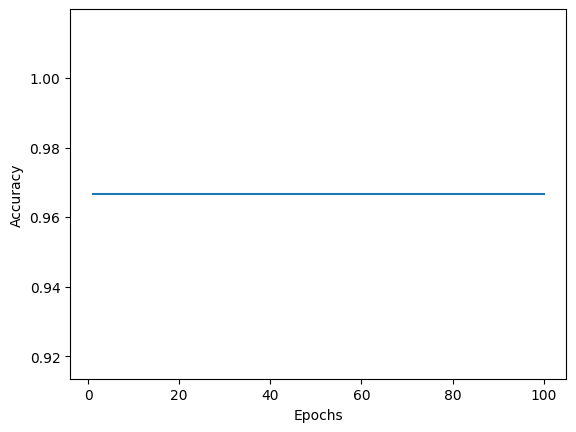

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_test, y_test, epochs=100, verbose=0)

accuracy = history.history['accuracy']
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Função para gerar descrições
def generate_description(seed_text, num_words):
    for _ in range(num_words):
        sequence = tokenizer.texts_to_sequences([seed_text])[0]
        sequence = pad_sequences([sequence], maxlen=context_length, padding='post', truncating='post')
        y_prob = model.predict(sequence, verbose=0)
        y_class = np.argmax(y_prob, axis=-1)
        predicted_word = tokenizer.index_word.get(y_class[0], '')  # Usar index_word para mapear o índice para a palavra
        seed_text += ' ' + predicted_word
    return seed_text

In [ ]:
# Geração de descrição
seed_text = "Hotel near the beach"
generated_description = generate_description(seed_text,30)
print("Descrição gerada:", generated_description)

Descrição gerada: Hotel near the beach from from from from from from from from from from from from from from from from from from from from from from from from from from from from from from


In [ ]:
seed_text = "Hotel in the city center"
generated_description = generate_description(seed_text,30)
print("Descrição gerada:", generated_description)

Descrição gerada: Hotel in the city center from from from from from from from from from from from from from from from from from from from from from from from from from from from from from from


# 3. Description GPT2

https://www.kaggle.com/code/ysthehurricane/text-generation-with-gpt2-huggingface


In [ ]:
from itertools import compress

In [ ]:
CUDA_VISIBLE_DEVICES=0

In [ ]:
df_gpt22= data[data['idioma']=='en']
df_gpt22 = df_gpt22['description']
df_gpt22 = df_gpt22[0:100]

In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2', 
                                          bos_token='<|startoftext|>', 
                                          eos_token='<|endoftext|>', 
                                          pad_token='<|pad|>')


tokenizer.encode("sample text")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[39873, 2420]

In [ ]:
print("The max model length is {} for this model".format(tokenizer.model_max_length))
print("The beginning of sequence token {} token has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), tokenizer.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), tokenizer.eos_token_id))
print("The padding token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.pad_token_id), tokenizer.pad_token_id))

The max model length is 1024 for this model
The beginning of sequence token <|startoftext|> token has the id 50257
The end of sequence token <|endoftext|> has the id 50256
The padding token <|pad|> has the id 50258


In [ ]:
max_flavour = max([len(tokenizer.encode(df_gpt22)) for df_gpt22 in df_gpt22])

print(f'The longest flavour text is {max_flavour} tokens long.')

The longest flavour text is 1017 tokens long.


In [ ]:
import torch
torch.manual_seed(42)
from torch.utils.data import Dataset # this is the pytorch class import

class MTGDataset(Dataset):
    def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=max_flavour):
        self.tokenizer = tokenizer # the gpt2 tokenizer we instantiated
        self.input_ids = []
        self.attn_masks = []

        for txt in txt_list:
            """
            This loop will iterate through each entry in the flavour text corpus.
            For each bit of text it will prepend it with the start of text token,
            then append the end of text token and pad to the maximum length with the 
            pad token. 
            """

            encodings_dict = tokenizer('<|startoftext|>'+ txt + '<|endoftext|>', 
                                       truncation=True, 
                                       max_length=max_length, 
                                       padding="max_length")
      
            """
            Each iteration then appends either the encoded tensor to a list,
            or the attention mask for that encoding to a list. The attention mask is
            binary list of 1's or 0's which determine whether the langauge model
            should take that token into consideration or not. 
            """
            
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [ ]:
from torch.utils.data import random_split

dataset = MTGDataset(df_gpt22, tokenizer, max_length=max_flavour)

# Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

f'There are {train_size} samples for training, and {val_size} samples for validation testing'

'There are 80 samples for training, and 20 samples for validation testing'

In [ ]:
dataset[0]

(tensor([50257, 43525,   287,  ..., 50258, 50258, 50258]),
 tensor([1, 1, 1,  ..., 0, 0, 0]))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), # Sampling for training is random
            batch_size = 1
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), # Sampling for validation is sequential as the order doesn't matter.
            batch_size = 1 
        )

In [ ]:
print(torch.cuda.device_count())   # --> 0
print(torch.cuda.is_available())   # --> False
print(torch.version.cuda)          # --> 9.0.176

1
True
11.8


In [ ]:
import random
from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np

# Loading the model configuration and setting it to the GPT2 standard settings.
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)

# Create the instance of the model and set the token size embedding length
model = GPT2LMHeadModel.from_pretrained("gpt2", config=configuration)
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# This step is optional but will enable reproducible runs.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


In [ ]:
# We wil create a few variables to define the training parameters of the model
# epochs are the training rounds
# the warmup steps are steps at the start of training that are ignored
# every x steps we will sample the model to test the output

epochs = 4
warmup_steps = 1e2
sample_every = 100

In [ ]:
from transformers import AdamW
# AdamW is a class from the huggingface library, it is the optimizer we will be using, and 
# we will only be instantiating it with the default parameters. 

optimizer = AdamW(model.parameters(),
                  lr = 5e-4,
                  eps = 1e-8
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

"""
Total training steps is the number of data points, times the number of epochs. 
Essentially, epochs are training cycles, how many times each point will be seen by the model. 
"""

total_steps = len(train_dataloader) * epochs

"""
We can set a variable learning rate which will help scan larger areas of the 
problem space at higher LR earlier, then fine tune to find the exact model minima 
at lower LR later in training.
"""
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

In [ ]:
import random
import time
import datetime

def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(0, epochs):

    print(f'Beginning epoch {epoch_i + 1} of {epochs}')

    t0 = time.time()

    total_train_loss = 0

    model.train()
    
    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()        

        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None
                        )

        loss = outputs[0]  

        batch_loss = loss.item()
        total_train_loss += batch_loss
        
        # Get sample every 100 batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print(f'Batch {step} of {len(train_dataloader)}. Loss:{batch_loss}. Time:{elapsed}')

            model.eval()

            sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 200,
                                    top_p=0.95, 
                                    num_return_sequences=1
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print(f'Example output: {tokenizer.decode(sample_output, skip_special_tokens=True)}')
            
            model.train()
            
        loss.backward()

        optimizer.step()

        scheduler.step()
        
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0
    
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids,  
                             attention_mask = b_masks,
                             labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss
    
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print(f'Validation loss: {avg_val_loss}. Validation Time: {validation_time}')

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print(f'Total training took {format_time(time.time()-total_t0)}')

Beginning epoch 1 of 4
Average Training Loss: 2.980872095748782. Epoch time: 0:00:31
Validation loss: 0.928011791035533. Validation Time: 0:00:02
Beginning epoch 2 of 4
Average Training Loss: 0.6374318920075893. Epoch time: 0:00:29
Validation loss: 0.8521051350980997. Validation Time: 0:00:02
Beginning epoch 3 of 4
Average Training Loss: 0.6548698177561164. Epoch time: 0:00:30
Validation loss: 1.3839229486882687. Validation Time: 0:00:02
Beginning epoch 4 of 4
Average Training Loss: 0.5892759759910404. Epoch time: 0:00:31
Validation loss: 1.1093952771276236. Validation Time: 0:00:02
Total training took 0:02:10


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import os

output_dir = './'

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.json',
 './merges.txt',
 './added_tokens.json')

In [ ]:
model.eval()

prompt = "hotel located near the beach"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = 300,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: hotel located near the beach in the Peloponnese River, the Peloponnese is a 4-hour drive from Peloponnese Regional Park. Shopping malls include a fitness center, fitness center and a sports room. A seasonal outdoor pool is also included in the property. At Peloponnese Waterfront Airport and Sea World Stadium, this hotel offers free Wi-Fi, a private bathroom and a flat-screen TV. A wide range of outdoor terrace views make the destination of this local airport and shopping areas. The Peloponnese River Trail features hiking trails, ironing facilities and a snack bar. ((* Sorry, this information is not available in the selected language and is shown in EN).


1: hotel located near the beach. The property is a 10-minute drive from the Holiday Inn. It features a 24-hour front desk with free WiFi. Guests can relax on the beach on the beach or soak in views of Stowe Field and the Holiday Inn. Private bathrooms and launderette are available to guests as well. Private bathrooms and showers ar

In [ ]:
prompt = "Copacabana place located in Rio de Janeiro"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = 300,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Copacabana place located in Rio de Janeiro, this historic district is one of the most magnificent and popular destinations in the city's north-eastern coast and one of the world's best locations in Rio De Janeiro. A modern hotel with a full range of activities, including a 24-hour front desk, an indoor swimming pool and a swimming pool. The hotel has a seating area with a free Wi-Fi.


1: Copacabana place located in Rio de Janeiro, and Rio de Janeiro's historic sea city. It is a 13-minute drive from the famous Aquí International Airport and are conveniently located on the outskirts of Montforto. The Place de Cerros Artigráo is just 3 minutes' drive from the Peloton-Plaza Montforte. This modern hotel is surrounded by a terrace, with a large balcony with a desk. You can relax in the hotel. The hotel is 3 mi from the Artílín Olympic Hotel near Lima, and offers complimentary wireless Internet access, free self-care and toiletries. The local airport is 2 mi from the resort and 0.3 mi fro

## 3.2 Description GPT
Como o modelo GPT demonstrou os melhores resultados, vamos aumentar os dados de input(número de descrições) e o número de épocas e deixar o modelo rodar por mais tempo.



In [ ]:
df_gptBig= data[data['idioma']=='en']
df_gptBig = df_gptBig['description']
df_gptBig = df_gptBig[0:1000] #Vamos considerar 1000 descrições 

In [ ]:
dataset = MTGDataset(df_gptBig, tokenizer, max_length=max_flavour)

# Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

f'There are {train_size} samples for training, and {val_size} samples for validation testing'

'There are 800 samples for training, and 200 samples for validation testing'

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), # Sampling for training is random
            batch_size = 1
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), # Sampling for validation is sequential as the order doesn't matter.
            batch_size = 1 
        )

In [ ]:
# Loading the model configuration and setting it to the GPT2 standard settings.
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)

# Create the instance of the model and set the token size embedding length
model = GPT2LMHeadModel.from_pretrained("gpt2", config=configuration)
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# This step is optional but will enable reproducible runs.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


In [ ]:
epochs = 50 #Aumentados as epocas para 50
warmup_steps = 1e2
sample_every = 100

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 5e-4,
                  eps = 1e-8
                )

In [ ]:
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

In [ ]:
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(0, epochs):

    print(f'Beginning epoch {epoch_i + 1} of {epochs}')

    t0 = time.time()

    total_train_loss = 0

    model.train()
    
    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()        

        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None
                        )

        loss = outputs[0]  

        batch_loss = loss.item()
        total_train_loss += batch_loss
        
        # Get sample every 100 batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print(f'Batch {step} of {len(train_dataloader)}. Loss:{batch_loss}. Time:{elapsed}')

            model.eval()

            sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 200,
                                    top_p=0.95, 
                                    num_return_sequences=1
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print(f'Example output: {tokenizer.decode(sample_output, skip_special_tokens=True)}')
            
            model.train()
            
        loss.backward()

        optimizer.step()

        scheduler.step()
        
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0
    
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids,  
                             attention_mask = b_masks,
                             labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss
    
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print(f'Validation loss: {avg_val_loss}. Validation Time: {validation_time}')

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print(f'Total training took {format_time(time.time()-total_t0)}')

Beginning epoch 1 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.5214322209358215. Time:0:00:39
Example output:  bipartisanA special day for lawmakers to be fully within walking distance of the historic House Museum, Hotel Hinton and The Great Mall. Guests can use private Wi-Fi to connect directly with the National Museum of American History and an outdoor dining lounge. Make yourself at home with some of the finest natural wines and natural herbs with a traditional and modern flair. Featuring a stylish modern design feature with a unique, spacious kitchen with seating, a microwave, air conditioning and a shower center. A traditional and modern bathroom features microwave access. The guests may also enjoy a free and open air balcony views. A family gym can be set up and an outdoor poolside pool is available. This evening can also be enjoyed on a rooftop patio. The tour is offered in the style of a family holiday. After making your reservation you can relax in our outdoor guesthouse. The hotel offers guest rooms free of charg

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.32616785168647766. Time:0:01:22
Example output:  increasingThis 2 1/2-minute drive from Charlotte North and Interstate-5, Interstate 5 will have an indoor pool and outdoor pool. An electric hot-tub is also provided for guests in the event. You can enjoy cocktails, bite-sized sandwiches, grilled meats, grilled (Shenango) Midwest. The University of Pennsylvania is located in the heart of the heart of Pennsylvania. Other West Pennsylvania (Shenango) Midwest (Indiana) and the (Shenango) Midwest region). The University of Pennsylvania is located in the heart of the Midwest. Other state and suburbs of Pennsylvania are served by Piedmont Park Zoo, the State Fair and The


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.30103808641433716. Time:0:02:01
Example output: daySet in New York, this 4-minute drive to Port of Bogota, you'll be within minutes of a stop on Route 66. This 4-minute drive from the heart of Bogota, you'll be within a 15-minute walk of the historic Victory Museum, which serves a daily holiday break from the business center. A 24-hour reception is offered onsite, and tickets are available for a 24-hour check-in. Free WiFi is provided onsite. Featured amenities include complimentary newspapers, free local calls, a hot tub and toiletries. Additional amenities include complimentary newspapers, fax and local calls. Private bathrooms featuring toiletries are located just steps away. Additional amenities include complimentary wireless Internet access. Guests can also check out the gym and swimming pool. Bathrooms make room for a shared bathroom, which can be shared with guests at the lobby. Free self parking is available on site. ((* Sorry, this information is not a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.7389965057373047. Time:0:02:41
Example output:  HangPacks include a desk with an LCD televisions, and a seating area with satellite programming onsite. Each has a private bathroom with a private bathroom with private bathrooms. Bathrooms have a shower/tub. Private balconies are also provided onsite for your privacy. The bathroom facilities also features a safe and a safe.
Gelestabra Airport, Belgrade offers daily free airport shuttle service. Lively Skiing, mountain biking, sailing, cycling, or cycling are some of the main sports activities at the Belgrade Airport. The nearest airport to the Airport and Belgrade is Baku Castle. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.9947926998138428. Time:0:03:20
Example output:  foodsThe hotel is situated just minutes from the historic Algarve city center. It's an excellent choice for a quick night's sleep.
Located on the waterfront overlooking the Algarve River, Casa Quinta Inn combines modern modern amenities, a stylish hotel and an indoor swimming pool with a work and leisure atmosphere. With a modern location and a well-appointed outdoor terrace featuring an elevator, it offers a range of conveniences to suit any needs. The Casa Quinta Inn offers air conditioning, concierge services and a spa. The Casa Quinta Inn serves European cuisine and cocktails from European specialties and creates special cocktails for guests to enjoy. Guest lounge in a comfortable room that includes a private bathroom with a hairdryer and a hair salon. Casa Quinta Inn offers more features in its guest service, including an indoor pool with a TV, 24-hour hot tub, a TV with full channels and a kitchenette. Guest

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.3926752209663391. Time:0:04:00
Example output:  trailThis hotel features 3 rooms equipped with a private bathroom and free Wi-Fi throughout. Rooms offer a kitchenette and an oven with eggs and meat, a sauna and a sauna. Free parking is available on-site. Guest laundry service is available at this hotel. The property is located in the heart of the historic Old Town of Dominguez, 10 minutes’ drive from St. Lucia. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.6790193319320679. Time:0:04:39
Example output: intendThe Green Meadow Hotel has accommodations in El Centro, Colorado. It offers a range, from the airport to the airport and a hotel service (complimentary). Rooms at the Green Meadow Hotel are free. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.7756410628929734. Epoch time: 0:05:16
Validation loss: 0.4811395997554064. Validation Time: 0:00:23
Beginning epoch 2 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.249136283993721. Time:0:00:37
Example output:  surroundThe hotel is located in Mueang District, 16 km from Mueang Town Hall. A 24-hour reception can be requested during the day. The air-conditioned room offers free WiFi. At Hotel Makati, each room is furnished with a wardrobe and a flat screen TV. The rooms have a private bathroom with a shower. Free private parking is available at the hotel. Makati Airport is 4 km from Makati International Airport and the hotel is 3 km from Mueang Town Hall. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.46106797456741333. Time:0:01:16
Example output:  reflexI recommend this hotel as well as the surrounding shopping mall area.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.06517177820205688. Time:0:01:54
Example output:  displayHotel Solamar is nestled amidst a beautiful green hilltop gardens, overlooking the Andes. An indoor heated pool and rooftop terrace await guests in Hotel Solamar. A flat-screen TV and a private bathroom with free toiletries are standard in every room at Hotel Solamar Hotel Solamar. You can relax in the spacious kitchenette with a microwave. You can find a small fridge, a coffee machine and a desk in the room. Your pillowtop bed comes with bed linen. Your bed comes with bedding, towels, towels and complimentary toiletries. You can sleep in the lounge chair, which has a hairdryer. You can play on your balcony. There are a number of guestrooms available on the hotel's website. Guest laundry facilities can help you enjoy your daily breakfast. The hotel offers a 24-hour front desk. At Hotel Solamar Hotel Solamar you will find a bus stop, a garden and a terrace. All guests will enjoy a continental


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.9248129725456238. Time:0:02:34
Example output:  pastorHuaenchui Jingu is set 2.9 mi away by the beautiful Tousada River. It is 4.9 mi from Shibuya Beach and 10.6 mi from Jingu Town. Guests can swim in the swimming pool, take a dip in the poolside pool bar and relax on the beach. The property offers modern recreational facilities. You can enjoy the poolside pool bar or relax on the beach. Guests can exercise on the sun terrace. Guests will have access to a 24-hour front desk and a fitness center. Guests can unwind in the hot tub, take a dip in the poolside bar or lounge. Massages and facials are available for a fee, and are possible for a fee. A complimentary buffet breakfast buffet breakfast is served daily at Huaenchui Jingu. Massages are also served in the evening. Guests will have a drink at the bar/lounge. Drinks and beverages are available in the morning. You can


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.671684980392456. Time:0:03:14
Example output:  illicitThis family room hotel has modern rooms with free Wi-Fi. Each room includes a flat-screen TV. A desk and cable TV are included. Each includes a desk chair. A pillowtop bed and slippers are provided. A fridge is included. Guests can enjoy a variety of breakfast options during their stay at Hotel Echostrea in the summer. They can get around the property on the indoor pool, or the steam room. Each room offers a flat-screen TV with pay-per-view channels. Guests can swim in the outdoor pool and relax in the hot tub. Local calls are offered in the lobby. Hotel Echostrea is less than a 4-minute walk from Echawes Olympic Park. Several restaurants are nearby, including the Cappelle's restaurant and Cappelle's Café. The hotel's beautiful décor is dominated by bright wood furniture, and the rooms have views over the hillsides. Guests staying at Echostrea in the summer


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.2731347978115082. Time:0:03:54
Example output:  LiberationOn site of New South Bay's famous Malibu Bay, this hotel features an outdoor pool and free WiFi access. Free high-speed internet access is available. Each room at the Comfort Inn & Suites is furnished with a satellite TV and a private bathroom that offers a bathtub. Some rooms come with a mini-bar, a hairdryer, a hairdryer and a safety deposit box. For lunch and dinner, guests can swim in the sun in the lobby. The Comfort Inn & Suites provides free valet services. At the Comfort Inn & Suites there is a 24-hour business center, a business center and free coffee. Conveniences include phones and coffee-making facilities. A roundtrip airport shuttle is offered. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.29339534044265747. Time:0:04:33
Example output:  NamThe Best Western New Orleans is offering the best Western hospitality in downtown New Orleans with a wide range of entertainment entertainment options in New Orleans as well as a brand new hotel.. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.3865888940962032. Epoch time: 0:05:11
Validation loss: 0.47487338572740556. Validation Time: 0:00:23
Beginning epoch 3 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.34757035970687866. Time:0:00:37
Example output: IONThis 3-star hotel offers accommodations in Fredericksburg, a 1-minute drive from Fredericksburg. Free private parking is available on site. The hotel also offers barbecue facilities. The hotel has a shared lounge and rooms with a flat-screen TV, while certain units include coffee, tea and coffee-making facilities. A microwave and refrigerator are also included in each of the rooms at the hotel. Nonsmoking rooms can be found at the hotel. The hotel provides free Wi-Fi throughout the property. The rooms also provide cable and DVD players. The Fredericksburg Airport is 1.5 miles away by car from the hotel. The Fredericksburg Town Center is 4.5 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.3565392792224884. Time:0:01:16
Example output:  glimpseThis Extended Stay America - Dallas North is centrally located in the Dallas/Fort Worth area, within a 3-minute drive of the Center for Medical Residence and Training - Dallas Texas Baptist University. This 3-star motel offers wireless internet access and concierge services. Wireless internet access is also offered to guests. A flat-screen cable TV and coffee-making facilities are provided in all guestrooms. The traditionally decorated rooms have private balconies or patios. Certain rooms also have a seating area with a sofa bed. Guests can enjoy facilities including an outdoor pool. A business center is available on site. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.13181425631046295. Time:0:01:56
Example output:  LaureThe Best Western Golden Hotel - Golden Diving Bay is located in Golden Diving Bay, just a 5-minute walk from Baytown and 4 minutes' walk from the beach. It features an indoor swimming pool with a private pool, 3 tennis courts, and a beach club. Some of the facilities at the Best Western Golden Diving Bay Hotel include a sauna, a hairdryer, an ATM machine, an outdoor swimming pool and an private beach. A restaurant and bar is also available for guests' use. Guests can play beach volleyball at the beach club, while a business center and luggage storage are also offered. The hotel offers free private parking. The accommodation is 1.9 mi from Boney fiddle Club. The beach club can arrange family and business retreats. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.04086308553814888. Time:0:02:35
Example output: ismProperty Location When you stay at the beach in Santa Barbara, you'll be near Santa Barbara Golf Club and Santa Barbara Coliseum. This pousada is within a 15-minute drive of Santa Barbara Beach Museum.Rooms Make yourself at home in one of the 58 air-conditioned rooms featuring free wired and wireless Internet access. Rooms have private balconies. Bathrooms have showers. Conveniences include safes and minibars, and housekeeping is provided daily.Rec, Spa, Premium Amenities Take in the views from a terrace, and a garden and make use of amenities such as complimentary wireless Internet access.Dining Enjoy a satisfying meal at the deluxe Mediterranean restaurant, which features an open daily hot breakfast featuring eggs, meat, yogurt, and more.Business, Other Amenities A roundtrip airport shuttle is complimentary (available on request) from Santa Barbara Airport for a surcharge of $39.9 per vehicle. ((* Sorry, this

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.31488853693008423. Time:0:03:15
Example output: ounLocated in the center of Fredericksburg, Fredericksburg Convention Center provides rooms with an indoor pool and free WiFi. It is a state-of-the-art, air-conditioned conference facility. The property is located in Fredericksburg, 18 miles from Fredericksburg Children's Hospital and on the waterfront of Fredericksburg, one of the area's popular attractions. Visitors at this Fredericksburg Convention Center can make the day at the Fredericksburg Convention Center. Free parking is offered at the property. All guest rooms include coffee makers, hair dryers, irons and ironing boards, refrigerators, irons, iron and ironing boards, microwaves, refrigerators and coffee makers. A private bathroom with a shower is included. Guests of this Fredericksburg Convention Center will enjoy free access to city views. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.27908873558044434. Time:0:03:55
Example output:  election<h3>Property Location</h3>
  With a stay at La Tijuca Hotel & Amenities in Tijuca, you'll be centrally located in Tijuca, steps from San Lorenzo Church and Tijuca Underground. This 4-star hotel is within close proximity of Museo Del Carmen and Tijuca Cathedral.    

<h3>Rooms</h3>
  Make yourself at home in one of the 29 individually decorated guestrooms featuring refrigerators and microwaves. Complimentary wireless Internet access keeps you connected, and satellite programming is available for your entertainment. Private bathrooms with showers feature jetted bathtubs and complimentary toiletries. Conveniences include safes and desks, as well as phones with free local calls. 

<h3>Amenities</h3> Take in the views from a rooftop terrace and make use of amenities such as complimentary wireless Internet access and concierge services.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.2710636854171753. Time:0:04:34
Example output:  crazyThe Holiday Inn Express Leesville hotel is conveniently located off Interstate 64, minutes from downtown Leesville. It offers guests a daily shuttle service along with free Wi-Fi, and amenities like a 24-hour fitness center. The hotel also provides free private parking. Guests at Holiday Inn Express Leesville, located between Leesville International Airport and Quantico Marine Corps Base can enjoy a buffet daily, featuring American classics. The hotel also offers a continental breakfast, featuring cereal and fruit. The hotel also offers a business center with copy and fax services. At the hotel, each room is equipped with air conditioning, while some rooms are equipped with bed linen and towels. Guests at the Leesville Holiday Inn Express can enjoy a daily newspaper. At the hotel, every room is equipped with bed linen and towels. The hotel also offers a 24-hour fitness center. The hotel also provides a busine

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.24941524863243103. Time:0:00:37
Example output:  benchThe Comfort Inn Livingston is located across the street from Livingston, Wisconsin and serves guests of Wisconsin Dellsand and Lake Livingston. Free Wi-Fi and a cable TV are provided in the hotel. Some rooms have a stovetop and others overlook the names on the LCD. A breakfast buffet is also available daily at the Livingston-level desk. Guests of the Livingston-level restaurant can relax in the guest laundry room next to the front desk. Laundry facilities are located at Livingston-level Livingston. The Livingston-level Laundry Facilities features free high-speed Internet access and free local calls. All guest rooms are equipped with microwaves and refrigerators and microwaves. The Livingston-level Lounge offers evening cocktails, light meals and local snacks. After a long day of work or play, guests can return to the Livingston-level business center with convenient facilities. Other facilities offered at thi

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.2539364695549011. Time:0:01:17
Example output:  incorporatedWhen you stay at Beyond Resort & Spa in Palm Coast town center in Palm Coast town center, you'll be on the beach, within 2 miles of Quadrado Resort & Spa and Relaxation and Sand Island. This beach resort is 3.5 mi (4.3 km) from Cape May County Zoo and 8.2 mi (12.2 km) from The Breakers of Palm Coast. Treat yourself with body treatments and facials. Additional features at this resort include complimentary wireless Internet access, a picnic area, and a television in the lobby. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.15815484523773193. Time:0:01:55
Example output: PeterJust off Route 1 in Indianapolis, The Best Western Indianapolis Motor Speedway is located 16 miles from the Indianapolis Motor Speedway. The Indianapolis Blue Mountain Hotel features an outdoor pool, a hot tub and tennis courts. Free Wi-Fi is featured in all rooms at the Best Western Indianapolis. Some rooms include a coffee maker, microwave and ironing facilities. A business center, laundry facilities and a front desk are offered as well. In-room guest laundry facilities are on site. Indianapolis Motor Speedway is 4 miles from Best Western Indianapolis. The Best Western Indianapolis Airport is 22 miles away. The Southgate Mall is 15 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.36252561211586. Time:0:02:35
Example output: uringOffering an indoor pool, this motel features an ATM and free Wi-Fi. Hilton Garden Inn Savannah is 0.1 miles from Georgia State Fairgrounds. Hilton Garden Inn Savannah provides a 24-hour front desk, a reception and a fitness center. Guests at Hilton Garden Inn can enjoy a meal or a cocktail at the Hilton Garden Inn. Hilton Garden Inn Savannah is 0.4 miles from Georgia State Fairgrounds. Hilton Garden Inn Savannah is a 15-minute drive from the Savannah International Airport. Hilton Garden Inn Savannah is 7.9 miles from the Savannah Art Gallery. South Carolina State Fairgrounds is 7.1 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.4562515914440155. Time:0:03:14
Example output:  reproductiveHotel Concord Hotel is located within the heart of the business parks of Rome and surrounded by exciting entertainment choices. A multidisciplinary hotel that offers high quality services and high Britannia rating, it stands 41 floors, offering easy access to prestigious sites such as the Coliseum, the Basilica di San Lorenzo and the Basilica di San Lorenzo Church. Both business travelers and tourists can enjoy the hotel's facilities and services like free high quality concierge services in various local venues. The hotel is strategically positioned close to popular attractions such as the Coliseum and the Presidential Palace, the Coliseum San Lorenzo Exhibition Center, the Presidential Palace, the Presidential Library and Convention Center, the Presidential Palace. Consisting of a baggage storage service and express check-in, the Concord Hotel's central location is walking distance from the business p

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.20220014452934265. Time:0:03:54
Example output:  zoneHilton Garden Inn is located in a 1930s skyscraper and 10-inch (15cm) marble staircase. The rooms at Hilton Garden Inn are decorated with bright finishes and contemporary furnishings. Rooms have an private bathroom, a flat-screen TV and work desk. Rooms at Hilton Garden Inn feature a seating area and wooden floors. A microwave, fridge and coffee maker are provided. Guests at the Garden Inn can dine at the 24-hour staff center. Coffee is served every day at Hilton Garden Inn. Languages spoken at the reception include English and Korean. A manager’s reception is offered Monday through Thursday from 7:00 AM to 10:00 AM for a fee. Guests at Hilton Garden Inn can enjoy vending machines and a business center. Languages spoken at the reception include English and Korean. The hotel has an outdoor pool, while city center is 10 minutes' drive away. Coffee is also available in the mornings at the coffeemaker. ((* Sorry


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.18022467195987701. Time:0:04:33
Example output:  commitsThis hotel in the middle of Munich is a 15-minute drive from the A4 Motorway. It lies in a quiet, side street with direct access to the city center, only a 5-minute drive from the Munich tourist bus stop. It lies in a quiet, side street with direct access to the A4 motorway, half a mile away from the Ettalienmarkt bus stop and a few meters from the historic Old Town. On- site shopping and dining options are available in the on- site shopping area. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.260487371457275. Epoch time: 0:05:12
Validation loss: 0.5218642790615559. Validation Time: 0:00:23
Beginning epoch 5 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.12185908854007721. Time:0:00:37
Example output:  ironyThe Claridge Point Inn & Suites Indianapolis Northwest Indianapolis provides comfort and convenience whether you're on business or holiday in Indianapolis. Both business travelers and tourists can enjoy the hotel's 24-hour front desk service. Guests can appreciate breakfast at the 24-hour convenience store on site. All guest rooms are warmly decorated and offer carpeted floors and a work desk. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.269742488861084. Time:0:01:16
Example output:  SahLocated off Interstate 10, 3.5 miles from downtown San Antonio, Novotel San Antonio Northpark offers a daily continental breakfast. Guests can have coffee at the hotel and use the gym. The property provides an on-site ATM. San Antonio Northpark Novotel San Antonio Northpark Hotel offers free WiFi. San Antonio Northpark Hotel offers an indoor pool. The Hotel also offers laundry facilities. San Antonio-Fort Worth International Airport is 30 miles away. San Antonio Northparkfield Airport is 45 miles from the accommodation. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.24521790444850922. Time:0:01:55
Example output:  BryanThis Augusta hotel offers easy accommodations in Augusta National Golf Course, Golf Club Augusta Course, Golf Club Augusta Course, and Augusta Golf Club Course. Augusta National Golf Club Augusta Golf Course and Augusta Course are also available. Augusta National Golf Club Golf Course Augusta Course is less than 1 mile away, while Augusta Golf Club Augusta Course is 2 miles away. Guest rooms at Augusta National Golf Club Augusta Golf Course Golf Course and Golf Course are just over 1 mile away. Guests at Augusta National Golf Club Augusta course Golf Course and Golf Course can also easily discover the greens course, the greens course, the greens course, the greens course, the greens course, the greens course and the greens course. Augusta Golf Course Golf Club Augusta Course and Golf Club Course are also a short distance away. Augusta National Golf Club Augusta National Golf Course is a short drive away. The

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.3053436279296875. Time:0:02:35
Example output:  spiritsLocated just south of San Diego and near beaches, Casada Bay Resort features a modern fitness center and guests can work out in the gym. Featuring views of San Diego Island Beach and oceanfront, the property provides a free airport shuttle service and a 24-hour front desk. Rooms at Casada Bay Resort are furnished with air conditioning. Cable TV is available. Guests can get a workout at the fitness center or work out in the 24-hour business center. Massage sessions can be arranged upon request, as well. Guests at the accommodation can enjoy dining in the hotel's gourmet, local and international options. San Diego Boardwalk is 6.9 mi away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.20889312028884888. Time:0:03:15
Example output:  seesThe Quality Inn and Suites is located within a 5 minutes' drive of Rockport Mall and the University of Texas at Rockport. This hotel features a state-of-the-art indoor pool and free WiFi throughout the property. Guest rooms are equipped with a flat-screen TV, microwave, fridge, coffee maker, safes, desk, safety deposit box and cable channels. Individually designed rooms provide a flat-screen cable channels. Select rooms feature a kitchen that offers a dishwasher with an ergonomic chair, a dishwasher with an ergonomic chair, and coffeemaker with an ergonomic chair. Guests can enjoy a buffet breakfast in the hotel breakfast area. The Rockport Quality Inn and Suites is within a 5-minute drive of Gulf View Square Mall. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.16818808019161224. Time:0:03:54
Example output:  hungryIn Winston-Salem, this hotel is less than a mile from South Carolina Wesleyan University. With air-conditioned rooms featuring cable TV and free Wi-Fi, rooms at Traveler rooms include a fridge and microwave. Guests at Traveler rooms include a microwave, refrigerator and coffeemaker. The private bathroom includes toiletries. Guests at Traveler rooms enjoy an in-room safe. Free access to the on-site business center is offered to travelers. The College of the Military Circle is one mile from Traveler rooms. The University of South Carolina is 11 miles from this hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.06532169133424759. Time:0:04:33
Example output:  PTSet in an Ileana Forest Resort and a 1-hour drive from Główny Golf Resort, this 4-star hotel offers modern accommodations with free WiFi. This 4-star hotel offers family rooms. The Bistro offers a buffet or continental breakfast. Guests at the accommodation will enjoy private parking and free parking on site. The nearest bus stop in Leecapark is just 1 mile from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.224723789782729. Epoch time: 0:05:12
Validation loss: 0.575466383676976. Validation Time: 0:00:23
Beginning epoch 6 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.06326132267713547. Time:0:00:37
Example output: üProperty Location Located in Alanya, Quality Inn Alanya is convenient to Hippocampos Project, a beach tourist and Saray Guest House. This hotel is within the region of Nea Propontida Museum and Agora Plantation.Rooms Stay in one of 10 guestrooms featuring flat-screen televisions. Complimentary wireless Internet access is available to keep you connected. Bathrooms with showers are provided. Conveniences include safes and complimentary newspapers, and housekeeping is provided daily.Rec, Spa, Premium Amenities Take time to pamper yourself with onsite massages or enjoy recreation amenities such as a children's roo, or other amenities including complimentary wireless Internet access and concierge services.Dining Enjoy a meal at a restaurant serving guests of Quality Inn, while looking for a snack at a coffee shop/café is a complimentary shuttle from Medersa. Relax with your favorite drink at a bar/lounge or a poolside

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.5007361769676208. Time:0:01:17
Example output: ruceLocated in the heart of downtown Midland, this SpringHill Suites features an indoor pool. A continental breakfast is available daily at the SpringHill Suites Midland area. The suites feature an private garden, free WiFi and a fully equipped kitchenette. The suites also have sofa bed amenities. Guests can work out in the gym or play the on-site fitness center. The hotel provides a business center for guests' enjoyment. For added convenience, SpringHill Suites Midland provides a laundry center and guest parking is available.SpringHill Suites Midland is a 25-foot-deep flat-screen cable TV and free movie channels. All rooms include safes and cable channels.Rec, Spa, Premium Amenities Relax, Premium Amenities Relax, Premium Amenities Relax, Premium Amenities Relax, and the hot tub tub, while unwinding in the state-of-the-art spa and wellness center are also featured.SpringHill Suites Midland is 5 minutes’


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.3116980791091919. Time:0:01:57
Example output:  derivativesSet on 3-star Elounda Winery, Hotel Tres Reyes de San Ildefonso is in San Ildefonso's Colonial Zone, a 15-minute walk from the historic center. An on-site spa is located and free WiFi is provided. Air conditioned rooms and a flat-screen TV are provided in Tres Reyes de San Ildefonso's Colonial Zone. An iPod docking station and air conditioning can be requested. A restaurant is available for an additional charge and free parking is available at the property. A buffet breakfast is served daily on site. Hotel Tres Reyes de San Ildefonso is 984 feet from San Diego State University and San Diego Convention Center. San Diego parks are within 9 minutes of the property. The hotel is 984 feet from San Diego Convention Center and San Diego Museum of San Diego. The historic downtown business district is San Diego's premier entertainment, and offers fax and copy services in the lobby bar and on-site shops


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.1292283833026886. Time:0:02:37
Example output: Offering an indoor pool, Best Western Plus Executive Residency Austin Austin is located in Austin. Each room features a flat-screen cable TV and a private bathroom with a hairdryer. Air conditioning, a work desk and a private bathroom are offered. A business center with fax, copy and printing services are offered at Coffee Amotel Austin. Other facilities offered at the hotel include BBQ facilities, fitness facilities and vending machines. A buffet continental breakfast is served. Guest laundry facilities are located on-site at Travelers Mall Shopping Mall Area, which is 2 miles away from Best Western Plus Executive Residency Austin. The hotel has vending machines with snacks and drinks. At Coffee Amotel Austin Guest laundry facilities are on-site and there are a fitness center. A business center with copy and printing services is offered at the property. Starbucks®®® Breakfast is available each morning, and guests

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.13268892467021942. Time:0:03:17
Example output:  rememberingProperty Location : With a stay at Novotiki Arapos Lodge in Oros, you'll be minutes from Avenida da Liberdade and Gulbenk House. This guesthouse is within close proximity of City Museum and Citibank Hall. Rooms : Make yourself at home in one of the 16 guestrooms, featuring kitchens with full-sized refrigerators/freezers and stovetops. Kitchensettes are outfitted with full-sized refrigerators/freezers and microwaves. Complimentary wireless Internet access is available to keep you connected. Conveniences include coffee/tea makers, housekeeping is provided daily, and you can request irons/ironing boards. Amenities : Take in the views from a rooftop terrace and a garden and make use of amenities such as complimentary wireless Internet access and tour/ticket assistance. Dining : Take advantage of the hotel's room service (during limited hours). Business & Other Amenities : Featured amenities include complim

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.2071177065372467. Time:0:03:57
Example output:  SourcesOverlooking Folkestone Harbor in Gestone Harbor, The Grand Burstin Hotel offers stylish décor and a swimming pool. Limited in distance, the Victorian-style hotel has an 18-hole Championship Golf Course. Guests can relax in after a busy day with a massage. Grand Burstin Hotel features numerous outdoor pools, a children's pool and a sauna. The Victorian-style restaurant serves charming surroundings and French cuisine. For lunch and evening meals, the varied buffet offers à la carte, à la carte and à la carte options. Sports enthusiasts will find the Britannia sports club next door. Just 10 minutes’ walk from Folkestone Temple, The Grand Burstin Hotel Gestone Hotel has a number of scenic hiking routes. On-site parking is available, and road links can be reached in minutes. The Grand Burstin Hotel can conveniently provide information during limited hours and provide useful services in the area around the hotel.

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.3388579189777374. Time:0:04:36
Example output: emsLocated off Interstate 10, this Las Cruces hotel features an indoor pool, hot tub and offers a furnished terrace. It features a year round indoor pool with jacuzzi. Hotel Club La Quinta Inn & Suites features spacious rooms with free WiFi. All rooms include cable TV, a work desk and air conditioning. A business center and business center are available on site at La Quinta Inn & Suites. For convenience, a self parking is available on site. Guests can use the hot tub along with an American buffet. La Quinta Inn & Suites is 3.1 mi from the Humboldt Speedway. An airport shuttle service is available along with free local calls. The hotel is within 531 miles of Western Texas University and the University of Texas. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.19381748548010364. Epoch time: 0:05:16
Validation loss: 0.6049145423807204. Validation Time:

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.3007260262966156. Time:0:00:37
Example output: tzSet in 2 separate islands connected by a bridge, The Crete Crete - Barbados features 3 couples and traditional couples. The modern, spacious suites have free Wi-Fi access. A flat-screen TV, air conditioning, flat-screen TV and private bathroom are included. Guests can enjoy a variety of sweet and savory dishes in The Crete - Barbados, Crete - Barbados, Tompkins, Crete - Barbados, Tompkins, Crete - Fosters, Tompkins and Waterfront Galleria can all be reached on foot. The nearest airport is Crete - Barbados, 12.1 miles from The Crete - Barbados. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.2096751183271408. Time:0:01:16
Example output: maticIn Southridge Centre, a spacious shopping and dining complex, this capital city hotel has a collection of spacious, air-conditioned rooms and has a peaceful, walled garden. Spindles Health and Leisure Club is a 15-minute walk from the hotel, and there is free Wi-Fi in public areas. The hotel has been awarded the “Estrela de Comedias de Excelência de la Troje), which sits at the historic center of downtown Lille and features inimited from the “Estrela de Comedias Restaurant and its beautiful outdoor terrace. The hotel also has a cozy atmosphere, with great music and some dancing in the evening. The hotel has access to an on-site gym, complemented by a cozy lounge and a jeep and motorway. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.1674482375383377. Time:0:01:56
Example output:  syndThe Quality Inn & Suites hotel is minutes from I-75 as well as many other popular area attractions and local businesses. This hotel is minutes from area attractions, including the Mall of America and the Santa Fe Mall. Additional points of interest less than 30 miles from the hotel include: Verizon Arena, Fox Wireless Amphitheater, Cadron Settlement Park, Frontier Days annual festival, Fairview Park, Flight Trude Sojka, Texas, Texas, Frontier Days annual festival, BBQ, hot tub suites, hair dryers, sinks, desks and cable television with premium channels. Guests will enjoy full-service amenities, including free wireless high- speed Internet access, free weekday newspaper, voice mail, free weekday New York Times, hair dryers, irons, ironing boards, sofa sleepers, desks, safes, desks with voice mail and free weekday newspaper. This hotel also features gift shops/newsstands. Downtown Harrisburg, Harrisburg and the 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.2074538916349411. Time:0:02:36
Example output:  gamWith a stay at Americas Best Value Inn & Suites-Cliffs near You Theological Seminary in Cliffs (Boa Vista), you'll be 22 mi (35.1 km) from Americas Best Value Inn & Suites-Cliffs-Cliffs-On The Strip and 24.6 mi (39.4 km) from Camp Pendleton Marine Corps Base. This hotel is 27.3 mi (41.3 km) from Blue Mesa Resort and 31.2 mi (50.4 km) from Pechanga Resort & Casino. Make yourself at home in one of the 50 guestrooms featuring refrigerators. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Private bathrooms are designed to be used with shower/tub combinations and hair dryers. Amenities include safes and irons. Make use of convenient amenities, which include complimentary wireless Internet access and a picnic area. Guests can catch a ride to nearby destinations on the area


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.08693225681781769. Time:0:03:16
Example output:  injuryThe Holiday Inn Express & Suites Streetsboro - Kent is centrally located between Kent State University and Kent State University. This hotel features an outdoor swimming pool, hot tub, and fitness center. Every room at the hotel features a TV and cable channels. The rooms of Holiday Inn Express & Suites Streetsboro - Kent are well-appointed, and offer a desk with ironing board and coffee-making facilities. Guests can make use of the indoor hot tub or exercise in the on-site fitness center. For easy access to the airport, guests can visit the Regional Airport, Kent's Natural Theme Park, Kent State University or the Addison Zoo. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.1197870522737503. Time:0:03:56
Example output: azaThe Quality Inn & Suites North is centrally located in Raleigh, only 7 miles from Raleigh-Durham International Airport and Raleigh-Durham Airport. It features an indoor pool, wading pool, hot tub and a fully-equipped kitchenette. Quality Inn & Suites Raleigh Airport offers free Wi-Fi and an outdoor pool. Quality Inn & Suites Raleigh-Durham Airport offers a cooked-to-order breakfast. This area is popular for cycling, and car rental is available at this Raleigh-Durham Airport hotel. Many restaurants and shopping centers can be found in the vicinity. The Raleigh-Durham International Airport is 19 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.1588805913925171. Time:0:04:34
Example output:  membraneProperty Location With a stay at Hotel Seffarine Medersa in Metamorfosi you'll be minutes from Mercedes Benz Museum and Mediterranean Conference Center. This Mediterranean hotel is within close proximity of City Hall and Neffarine Medersa.Rooms Make yourself at home in one of the 5 air- conditioned guestrooms, featuring kitchens. Flat-screen televisions with cable programming provide entertainment, while complimentary wireless Internet access keeps you connected. Conveniences include a laptop and a saf/minibar, and housekeeping is provided daily.Amenities Take advantage of recreation opportunities such as an outdoor pool, or other amenities including complimentary wireless Internet access and tour/ticket assistance.Dining Satisfy your appetite at the hotel's restaurant, which serves breakfast, lunch, and dinner, or stay in and take advantage of the hotel room service (during limited hours). Mingle with oth

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.1291491836309433. Time:0:00:37
Example output: ijingWhen you stay at Beyond Resort Khaolak - SHA Extra Plus in Takua Pa, you'll be on the beach and steps from Pak Weep Beach. This 4.5-star resort is 11.3 mi (18.3 km) from Takuapa Hospital and 2.2 mi (4.2 km) from Bang Sak Beach. Treat yourself with body treatments and facials. You're sure to appreciate the recreational amenities, including an outdoor pool and an on-site convenience store. Additional amenities at this resort include complimentary wireless Internet access, wedding services, and tour/ticket assistance. Guests can catch a ride to nearby destinations on the area shuttle (surcharge). . ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.07976531237363815. Time:0:01:17
Example output:  castProperty Location Located in Clovis/Orlando city center, Pousada Villa Serena is convenient to Hippocampos Project and Bojangles Coliseum. This pousada is within the region of Hippocampos Project and Bojangles Coliseum.Rooms Make yourself at home in one of the 15 air-conditioned rooms featuring minibars. Complimentary wireless Internet access keeps you connected, and LED televisions televisions are provided for your entertainment. Private bathrooms with showers feature rainfall showerheads and complimentary toiletries. Conveniences include safes and desks, and housekeeping is provided daily.Rec, Spa, Premium Amenities Enjoy recreation amenities such as a fitness center or enjoy recreation amenities such as a seasonal outdoor pool. Additional features at this pousada include complimentary wireless Internet access, babysitting/childcare, and tour/ticket assistance.Dining Enjoy a meal at a restaurant serving gue

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.10957054048776627. Time:0:01:57
Example output:  purchLocated in the heart of Avignon, the Avignon Hotel is a perfect place for travellers interested in culture, with the spectacular sunsets over the Cascades. Indeed, it was while living at the Avignon that the great English author wrote, and it was while living at the same time that he wrote it. The great English author John Milton found inspiration for his inspiration, and it was while living with us that he wrote it. The great English author John Milton found inspiration for his inspiration in his solitude, and it was while living with us that he wrote it. The wonderful English author John Milton found inspiration for his own Adventures, and it was while living with us that he wrote it. The great English author John Milton found inspiration for his own Adventures, and it was while living with us that he wrote it. The great English author John Milton found inspiration for his own inspiration in his solitude, 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.09563728421926498. Time:0:02:37
Example output:  shouldersThis 5-star hotel is located in Kowloon, a 12-minutes drive from downtown Warsaw. Guests will have a workout in the fitness center or visit the outlet, located less than a mile away. With comfortable guestrooms, comfortable guestrooms create a calm atmosphere and feature towels, slippers and flat-screen TV. Each room provides a safe and tea/coffee making facilities. A buffet or continental breakfast is served at the property. Warsaw ZOO is 12 miles from this hotel. The nearest airport is Ronald Reagan Washington National Airport, 7.5 miles from BWX. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.04595828428864479. Time:0:03:16
Example output:  builtFeaturing a free hot breakfast buffet, the Days Inn & Suites offers free WiFi and fitness center. Guests can enjoy outdoor pool and in the seasonal pool. All guest rooms include cable TV with HBO and free to-go coffee and tea making facilities. A microwave, fridge, and coffee maker are all featured. Free and 24-hour concierge services are offered. Guests can grab a quick grab-and-go breakfast at the on-site restaurant, The Garden Grille. A variety of dishes are served daily at the daily-long Quiette Restaurant. Quiette options can also be requested. There is Continental and buffet breakfast offers drinks and hot beverages daily. Free hot drinks are available in the lobby. The property provides free shuttle service that can take a dip in the water sports pool. The hotel has a concierge service that provides an airport shuttle service and a 24-hour airport transportation service. Laundry facilities are located

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.11068350076675415. Time:0:03:56
Example output:  openlyThis boutique hotel is minutes from I-40, as well as walking to downtown Pittsburgh International Airport. The guest who stays with us can enjoy the on-site business center and meeting the on-site banquet hall. The guest who stays with us can enjoy their every moment as each guest will be treated like an family member. We are on the famous Pittsburgh location, where guests will find wonderful views of the beautiful city. The hotel is conveniently located on the famous Pittsburgh skyline. Downtown Pittsburgh International Raceway is 13 mi away, and the Mary Todd Lincoln House Hotel is 45 minutes away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.07131297886371613. Time:0:04:35
Example output:  haltedEnjoying an outdoor pool and a beautiful garden, Begonville Hotel Begonville is located in Begonville. It has an outdoor pool with free Wi-Fi. The Hotel has a TV with satellite channels. You can start the day at with a buffet breakfast. Wrap up your day with a drink from the bar. You can also enjoy a buffet breakfast in the garden. The Hotel also has a terrace overlooking the pool. You can also enjoy a variety of specialties in the afternoons at the buffet. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.1398916451598052. Epoch time: 0:05:14
Validation loss: 0.6791770054399967. Validation Time: 0:00:23
Beginning epoch 9 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.029825303703546524. Time:0:00:37
Example output:  NikOnly 1.5 mi from West Edmonton Mall and 24.6 mi from Edmonton city center, this hotel offers modern guestrooms and a fully-equipped kitchen. The guestrooms offer cable TV, air conditioning and a work desk. At the Royal Hotel West Edmonton, guest rooms include bed linen and towels. Royal Hotel West Edmonton, Trademark Collection by Wyndham, Trademark Collection offers a fitness center. After getting some work in the 24-hour business center, guests can enjoy a casual meal in Steel's Cafe & Grill, which is open for breakfast, lunch and dinner. Edmonton city center is 14 mi from this Royal Hotel West Edmonton, Trademark Collection by Wyndham, while Edmonton city center is 14.6 mi away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.21235738694667816. Time:0:01:16
Example output:  tinProperty Location Located in Liberia, Hotel Boyeros is convenient to Liberia Parque Central and Church of La Ermita La Agonia. Rooms have private balconies. Rooms have private balconies. A telephone with free local calls is also available. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.12847545742988586. Time:0:01:55
Example output:  clinicalThe Econo Lodge Midtown is located just 5 mi from historic Savannah,GA, and 11.2 mi from Interstate 95. All guest rooms include 32-inch flat-screen TVs. Nonsmoking rooms are also included. A coffee maker and cable television are included at the Nonsmoking rooms. Guest laundry facilities are located on the property. Hunter Army Airfield is a 12 minutes' drive from this hotel. Pompeys Pillar and Flag Army training center are a 15 minutes' walk from the property. The National Oceanic and Atmospheric Administration are only about 30 minutes away from the Econo Lodge Midtown. The National Center for the Pacific War is just 11.4 mi from the hotel. Hunter Army Airfield is only a 40 minutes' drive away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.08014073967933655. Time:0:02:34
Example output: lectionsThe Days Inn Brooksville is conveniently located in the heart of a growing commercial area in the hotel.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.16260069608688354. Time:0:03:12
Example output: elsLocated in Corpus Christi, Omni Corpus Christi, Omni Corpus Christi offers rooms equipped with bed linen and towels. Free WiFi access and a fully-equipped kitchen are available. The air-conditioned rooms at Omni Corpus Christi also have cable TV and a private bathroom with free toiletries. Guests are also provided ironing facilities and ironing facilities. The city's restaurant serves American cuisine and local seafood. The property offers a laundry service and a business center. laundry facilities are on the premises. The Omni Corpus Christi Hotel is 3.7 miles from Bainbridge city center. Bainbridge city center. The Panama Canal Grande Metro station is Panama Canal Sports and Cisad Obregón International Airport. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.22663654386997223. Time:0:03:51
Example output: labThe Dolphin Beach Resort is located within the serene surrounding lush hillsides with olive trees. It is less than 2.5 mi from the Dominguez Art Gallery and Portincho Beach. All rooms at the Dolphin Beach are fitted with a 40-inch flat-screen TV. Select a private bathroom with free toiletries. Guests enjoy access to a sauna where comes with a bath or shower. Dolphin Beach Resort features free WiFi access and barbecue facilities. Free private parking is available on site. The hotel is located close to restaurants and the main supermarket. It is 8 minutes’ drive to the Newport News International Airport. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.13788558542728424. Time:0:04:31
Example output:  tripleLocated 1.9 km from Northern Illinois University and 1.7 km from the center of Illinois, this Illinois hotel features a complimentary breakfast buffet daily. Guest rooms at the Microtel Inn and Suites by Wyndham Illinois provide a work desk. Laundry facilities are also included. Local attractions, including the Heritage Hanes Shopping Mall and a number of shopping centers are within driving distance of the hotel. Illinois' historical center is 1 mile away. The downtown Illinois Gallery of Art is 1 mile away. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.11522251764079555. Epoch time: 0:05:09
Validation loss: 0.7195578465610742. Validation Time: 0:00:23
Beginning epoch 10 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.011438443325459957. Time:0:00:37
Example output: 220Located on Gan Island in the Laamu Atoll, Reveries Maldives offers a relaxing getaway amid untouched coral reefs and white sandy beaches. This property features an indoor swimming pool, restaurant and free Wi-Fi. Each unit here will provide you with a flat-screen cable TV, desk and cable channels. Complete with a refrigerator, the unit also offers a balcony. In addition to a desk, certain units at Reveries Diving Village also have a private balcony. Guests can go diving, snorkeling or work out at the gym. Staff at the tour desk can also assist with water sport activities and travel arrangements. Local and international dishes are served at the restaurant. Maldives Reveries Diving Village also features an indoor pool, while Matriot Falls is a 10-minute drive from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.10590061545372009. Time:0:01:18
Example output:  SeeOffering a scenic location beside Lake Riessersee, this 4-star hotel stands beside the River Riessersee. Free WiFi is available in the surrounding areas. Rooms Riessersee features spacious rooms and features an LCD TV and air conditioning. All rooms Riessersee has a private bathroom. A rich breakfast is also provided. Free newspapers and a selection of newspapers are served nightly. The Riessersee Café Riessersee also features a sauna, a hot tub and hot tub. The nearby water park Riessersee is a 10-minute drive from the hotel. Free private parking is available nearby. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.1787988543510437. Time:0:01:57
Example output: @@This hotel is located across from the SNHU Arena and just 5 miles away. Begin the morning at the DoubleTree by Hilton Columbus Downtown with a cup of coffee from in-room coffeemakers or enjoy an energizing workout in the state-of-the-art fitness center. Relax by the indoor swimming pool or take advantage of on-site dining at The Current Kitchen & Bar or The Current Kitchen & Bar or The Sichuan Kitchen & Bar or The Sichuan Kitchen & Bar or The Craftsmanualtoaster. Grab a bite to eat at the hotel's coffee shop, which features an indoor pool, and also offers a indoor hot tub and sauna. A short drive from Columbus Convention Center and the University of Indianapolis, this hotel is located near the Indianapolis Zoo, Indianapolis Life Park, and the University of Indianapolis. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.08409910649061203. Time:0:02:37
Example output:  hostLocated in Kenedy, Microtel Inn & Suites Kenedy offers 3-star accommodations with barbecue facilities. With a shared lounge, the 3-star hotel has air- conditioned rooms with free WiFi, each with a private bathroom. The rooms at Microtel Inn & Suites Kenedy are equipped with a seating area and a satellite TV. The rooms at the hotel come with a seating area and a kitchenette. A buffet breakfast is available every morning in the rooms at Microtel Inn & Suites Kenedy. A business center and vending machines with snacks and drinks are available on site at Microtel Inn & Suites Kenedy. Speaking English and Spanish at Microtel Inn & Suites Kenedy, staff will be happy to provide guests with practical advice on the area at the reception. The nearest airport is San Antonio International Airport, 68 miles from the accommodation. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.0708126649260521. Time:0:03:17
Example output: roleOffering an indoor pool and a restaurant, Homewood Suites by Hilton Dulles-North/Loud is located in Ashburn. Free Wi-Fi and a seasonal outdoor pool are available. The modern-décor rooms offer air conditioning and a seating area to relax and rejuvenate. Some units include a kitchenette with a fridge, an oven, a stovetop, and a dishware. The units provide a separate seating area and a kitchenette. The hotel offers a à la carte restaurant and complimentary coffee. At Homewood Suites by Hilton Dulles-North/Loud you'll find an outdoor pool, a gym and a business center. Other facilities offered include meeting facilities, laundry facilities and a safe deposit box at the front desk. The property offers free parking. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.10434672981500626. Time:0:03:57
Example output: iacA sun terrace with bar overlooking the Mimizan Current is the perfect place for hiking or cycling. Featuring views of the Mimizan Current and its Mimizan Current, the spacious, air-conditioned rooms at the DoubleTree Inn and Suites can comfortably accommodate a group of travelers. An outdoor swimming pool and a fitness center are also provided. The Mimizan Current terrace provides useful links to the Mimizan Current and the surroundings Mimizan Current. Guests can benefit from a range of brand-new dining establishments, including a Starbucks coffee shop and an on-site store. The Mimizan Current terrace also features an indoor pool and state-of-the-art fitness center. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.04597829654812813. Time:0:04:37
Example output:  LDThis hotel is located off of Interstate 26 and is close to many area attractions, including the historic downtown area, Chicago city center, the National Civil War and the Snow Trails Ski Resort. The DoubleTree by Hilton Chicago Downtown features a 17th-century décor with a flat-screen TV and sofa. The kitchen has a stovetop, outfitted with both a stovetop and dishwasher. The kitchen also offers a dishwasher and a dishwasher. The Grand Peay State Park is less than one mile away from the hotel. The National Civil War Naval Museum is 2.2 miles from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.09760849376558327. Epoch time: 0:05:16
Validation loss: 0.7668599208444357. Validation Time: 0:00:23
Beginning epoch 11 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.13377059996128082. Time:0:00:37
Example output:  ListenThis 4-star Copernicus Toruń Hotel is located in a period building in the heart of a historic building. Original and modern building features a marble bathroom, air conditioning, a flat-screen TV and a spacious work area. Some rooms also have a balcony and a view of the fairy chimneys. Copernicus also features a panoramic view of the fairy chimneys. Guests can enjoy a drink in the bar. Copernicus also features a lobby and laundryrooms. The hotel is surrounded by a number of beautiful lush gardens. Toruń Miasto Train Station is a 10-minute walk from Copernicus Toruń Miasto Train Station and Toruń Miasto; Toruń Miasto Miasto Train Station is a 10-minute walk away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.05437546595931053. Time:0:01:18
Example output:  dyA short drive from Arrowhead Stadium, home of the Kansas City Chiefs baseball team, this hotel in Independence, Missouri offers guest rooms with free wireless internet access and coffeemakers. Holiday Inn Express Independence - Kansas City features an indoor pool and on-site fitness center. Guests can enjoy the indoor pool and on-site fitness center. Holiday Inn Express Independence - Kansas City features a fitness center, business center and bar in the guest rooms. Free parking is available on-site. Holiday Inn Express Independence - Kansas City is a 20-minute drive from the hotel and is located 1312 feet from the Sprint Center. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.08943438529968262. Time:0:01:58
Example output:  DomesticProperty Location With a stay at Seward Windsong Lodge in Seward, you'll be in the mountains and close to Kenai Fjords National Park. This hotel is within the vicinity of Seward Museum and Alaska SeaLife Center.Rooms Make yourself at home in one of the guestrooms featuring refrigerators and flat-screen televisions. Rooms have private balconies. Cable programming and DVD players are provided for your entertainment, while complimentary wireless Internet access keeps you connected. Private bathrooms with shower/tub combinations feature complimentary toiletries and hair dryers.Rec, Spa, Premium Amenities Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance.Business, Other Amenities Featured amenities include luggage storage and coffee/tea in a common area. Free self parking is available onsite. ((* Sorry, this information is not available in the sel

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.05550165846943855. Time:0:02:37
Example output:  beneficiariesIn a quiet, tree-lined residential street, just yards from Earl's Court London Underground Station and the exhibition center, the hotel offers comfortable rooms with attached bathroom. Free WiFi is available throughout and an indoor pool and hot tub, a flat-screen TV and free newspapers. Hyde Park's spacious rooms include a work desk. The Oxford Hotel has a convenient location, with banks and restaurants close by and Kensington High Street just over half a mile (2625 ft) away (2625 ft) away. Hyde Park Tube Station has just a 2-minute walk away. Earl's Court London Underground Station has a comfortable, tree-lined lounge and free Sky TV. The hotel is just a 2-minute walk from Madame Tussauds and a restaurant. The Oxford Newsstand is a 40-minute walk away. The hotel has a stylish, tree-lined bar and modern brasserie. The Oxford Hotel has a cozy atmosphere. ((* Sorry, this information is not available i

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.07663790136575699. Time:0:03:18
Example output:  TitleLocated in Istanbul, within a 15 -minutes drive from Suleymaniye Mosque, SpringHill Suleymaniye Park Sultanahmet has accommodations in the heart of Istanbul, opposite the Grand National Assembly of Turkey. With a fitness center, the 2-star hotel has air- conditioned rooms with free WiFi, private parking and an shared lounge. The hotel will provide guests with air- conditioned rooms offering a closet, an electric tea pot, a minibar, a safety deposit box, a minibar, a terrace and a garden. At SpringHill Suleymaniye Park Sultanahmet the rooms include bed linen and towels. Continental and halal breakfast options are available at the accommodation. At the hotel rooms come with bed linen and towels. à la carte or American breakfast options are available at the hotel. Eastern and Egyptian cuisine is served at the hotel. The nearest airport is Ankara Sabiha Gokcen International Airport, 25 minutes drive from


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.07532576471567154. Time:0:03:58
Example output:  μJust 1 block from upscale Santa Fe Avenue, Casa Calma Hotel offers chic décor and a two-place spa. WiFi access is free. Rooms have a private balcony. Wired and wireless internet is available. Rooms are decorated with soothing color tones and modern style. Rooms have private spa baths, flat-screen cable TV and a private bathroom with free toiletries and a bathrobe. For breakfast, CasaCalma features a wide assortment of traditional croissants, fine woods and unique detailing with many furnishings made exclusively for adults. CasaCalma features a vertical garden, a panoramic restaurant and a fully-equipped fitness room. CasaCalma features a lounge with lounge bar and a bar. WiFi access is free. CasaCalma is located 1684 feet from famous pedestrian Florida Avenue. Amélia Amorim Cultural Center is 1.9 mi from CasaCalma, while Amélia Amorim Airport is 17 mi from CasaCal


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.07864797115325928. Time:0:04:40
Example output:  sellingLocated on the shore of Mikołaskie lake, in the bay, Hotel Amax offers accommodations with free Wi-Fi. It is 0.7 mi from the Old Town, 0.9 mi from Cesky Krumlov Castle and 0.9 mi from Municipal Theater and Municipal Theater. All rooms are air conditioned, feature a mini- bar and a spa and a spa area. Spa at the Amax consists of 12 spa treatment rooms, where guests can have various beauty treatments and massage using complimentary spa baths and massages. There is also a sauna and an outdoor pool. Children can have fun at the playground. Hotel Amax houses modern art and copying rooms with a printer and scanner. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.08244282326195389. Epoch time: 0:05:19
Validation loss: 0.7864059672877193. Validation Time: 0:00:23
Beginning epoch 12 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.04480481520295143. Time:0:00:37
Example output:  migrantOnly 164 feet from Keleti Railway Station, Baross offers modern accommodations in a period building with an inner courtyard. Keleti Underground (line M2 and M4) as well as tram and bus stops provide direct links to the Danube River banks and the city's main sights. Staff at the Baross City Hotel – Budapest can help guests find their way around town, as well as give suggestions on local cuisine and attractions. They are available around the clock and are praised for their friendliness. Spacious guestrooms come with air-conditioning and satellite flat-screen TV. All rooms include a private bathroom with a bath or shower, and most overlook the quiet courtyard. Baross City is less than a 10-minute walk from the popular Heroes’ Square and City Park. It is also adjacent to the local bus n.7 stop, which provides transport to Buda. ((* Sorry, this information is not available in the selected language and is shown 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.03469112887978554. Time:0:01:17
Example output: ivelyLocated in Kenedy, Microtel Inn & Suites is in a great location only 4 blocks from downtown San Antonio and within walking distance to University of Texas and 13 miles from Market 28. A friendly and knowledgeable staff will welcome and guide you at Microtel Inn & Suites. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.05695691332221031. Time:0:01:56
Example output:  orderLocated on Cap-aux-Meules Island in the Gulf of Saint Lawrence, this hotel is 1 mile from the CTMA Ferry. It provides free Wi-Fi, a seasonal outdoor pool, and rooms with cable TV. All guest rooms at the Château Madelinot include a microwave and refrigerator. Resto Bistro Restaurant Brunelles-outdoor food truck are equipped with refrigerators, and coffee makers with freezers. Resto Bistro serves breakfast and dinner. Chagall's Lounge offers a variety of other dining options. Free access to the hot tub and sauna is provided to all guests of the Château. Parking is also free on site. Iles de la Madeleine Airport is a 15 minutes’ drive from the hotel. Club de Golf des Iles is 6.5 mi away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.11702460795640945. Time:0:02:36
Example output:  VPNWhen you stay at New Star Beach Resort in Koh Samui, you'll be by the sea, within a 5-minute walk of Bangkok Hospital Samui and Phetch Bazaar. This 4-star resort is 1.4 mi (2.5 km) from Chaweng Thai Boxing Stadium and 1.4 (2.4 km) from Central Festival Samui. Relax with a refreshing drink at one of the resort's 2 bars or visit the entertainment venue. You can soak up the sun at the private beach or soak up the sea air after snorkeling or work out at our gym. If you're on a break, there's 2 flood-lit tennis courts, an outdoor pool and a Turkish bath. The guest rooms are furnished with comfortable beds, and some rooms come equipped with LCD/plasma screen, DVD player, Free Wi-Fi access – wireless, WIFI access – wireless, and international direct dial telephone. Samui Chaweng Thai


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.054074764251708984. Time:0:03:16
Example output:  explanationThis property enjoys a privileged location in Belã?m. There are a total of 216 rooms on the premises. The property is made up of 121 single rooms, 95 double rooms and 7 junior suites. The Hotel enjoys a idyllic location in the heart of the city. The Hotel is within easy reach of the city's main bus and train stations. Guests are within easy reach of the city's main bus and train stations. The Hotel is within easy reach of the city's main shopping street. The Hotel is within easy reach of the city's main bus and train stations. The Hotel is within easy reach of the city's main shopping district. The beautiful lobby in the front of the Hotel enjoys easy reach of the city's main shopping district. The Hotel is within easy reach of the city's main bus and train station. Guests will find it within easy reach of the city's main shopping street. Guests can also walk to the bus and bus terminus. ((* Sorry, th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.04964132234454155. Time:0:03:55
Example output:  BachThis family-run hotel in Monroe, North Carolina offers comfortable rooms with a 32-inch LCD TV. NASCAR Hall of Fame and Museum are also nearby. The spacious rooms include a work desk. Free Wi-Fi is provided in the warmly decorated room at Rodeway Inn of Monroe. Guests can also enjoy a newspaper here. Free hot breakfast is served every morning. Several spacious, traditional outdoor pool offers promise you a picnic area for a fee. After a day of swimming or take advantage of the complimentary water in the swimming pool. All of our spacious suites feature a fully equipped kitchen. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.07862350344657898. Time:0:04:35
Example output:  folderLocated in the heart of Lourdes, Hotel Île II offers air-conditioned rooms with free WiFi and private parking on site. Just a 10-minute walk from the hotel is set in an Art Nouveau building, which features a lounge and a bar. An American breakfast is served every morning. For lunch and dinner guests can enjoy a cocktail in the restaurant, or an American breakfast. Hotel Île II features an outdoor swimming pool, and is 984 feet from Notre Dame Sanctuary of Sédiac. An airport shuttle is also offered. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.06927931341691874. Epoch time: 0:05:14
Validation loss: 0.847940375097096. Validation Time: 0:00:23
Beginning epoch 13 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.043195873498916626. Time:0:00:37
Example output:  buildingProperty Location With a stay at Hotel Casa San Agustin in Santo Domingo (Domingo), you'll be within a 5-minute drive of Villa Santo Domingo and San Diego Bay. This hotel is within a 15-minute drive of Mesoamerican Museum of Jade and Arches of Carmen.Rooms Make yourself at home in one of the 9 guestrooms featuring plasma televisions. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Bathrooms with showers are provided. Conveniences include phones and complimentary bottled water, and housekeeping is provided daily.Rec, Spa, Premium Amenities Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance. Guests can catch a ride to nearby destinations on the area shuttle surcharge.Dining A complimentary buffet breakfast is served daily.Business, Other Amenities Featured amenities include 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.03923088312149048. Time:0:01:18
Example output:  BabylonLocated 26 miles from Lourdes, Hotel du Commerce is set in the quiet town of Pontacq. Hotel du Commerce features single, double, triple and family rooms to suit all kinds of guests. For your comfort, the hotel features a restaurant and a bar. Hotel du Commerce is 9.3 mi from Tarbes and 16 miles from Pau. It offers easy access to both the mountains of Moyano and the coast of Mexico. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.018580811098217964. Time:0:01:57
Example output: perialThe KnightsInn on Diplomat is for those individuals looking for a clean, comfortable place to stay that is convenient to everything that Hallandale has to offer. The beach, casinos, horse and dog racing, shopping and restaurants are only minutes away. All of our units have kitchens allowing for that feeling of home. Please be advised that an extra person charge of $10.00 applies for the 3rd and 4th guest in a guest room.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.08473602682352066. Time:0:02:35
Example output:  rentsThe hotel is located in beautifully restored mid 19th century Grade II listed townhouses.      Among the facilities of this masterpiece are a complete restoration of 16 city blocks away from its immediate vicinity. The hotel's beautiful early Life-size restaurant allows guests to enjoy the city view and nightlife of the city.. (* Sorry, this information is not available in the selected language and is shown in EN)  


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.07965210825204849. Time:0:03:13
Example output:  RegProperty Location When you stay at Résidence Carlton in Beaulieu-sur-Mer, you'll be on the beach, a 5-minute drive from Villa Kerylos and 6 minutes by foot from Villa Ephrussi. This beach apartment is 5.3 mi (9.3 km) from Casino Monte Carlo and 6.3 mi (10.3 km) from Nice Etoile Shopping Center.Rooms Make yourself at home in one of the 29 guestrooms, featuring kitchenettes with refrigerators and microwaves. Flat-screen televisions with digital programming provide entertainment, while complimentary wireless Internet access keeps you connected. Conveniences include separate sitting areas and coffee/tea makers, and housekeeping is provided on a limited basis.Rec, Spa, Premium Amenities Take advantage of recreation opportunities such as an outdoor pool, or other amenities including complimentary wireless Internet access and a television in a common area.Business, Other Amenities Featured amenities include luggage s

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.06465006619691849. Time:0:03:53
Example output: olasThis Virginia hotel features an indoor pool and a fitness center. The hotel is a 15-minute drive to Beagle Channel. Guest rooms at the Comfort Inn are equipped with a coffee maker and a safe side desk. Yegen Golf Club is 4 miles away. The Reef Indoor Water Park is a 15-minute drive from the hotel. For guests' convenience, this hotel offers a 24-hour reception and free WiFi. Yegen Golf Club is a 4-minute drive from the accommodations. The Reef Indoor Water Park is a 15-minute drive away. The Reef Indoor Water Park is a 15-minute drive from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.034722015261650085. Time:0:04:33
Example output:  responsesProperty Location With a stay at Hotel Arcos del Carmen, you'll be centrally located in San Cristobal de las Casas, steps from La Casar and San Cristobal de las Casas Cathedral. This hotel is within close proximity of Mesoamerican Museum of Jade and San Cristobal de Indoor heated pool.Rooms Make yourself at home in one of the 16 guestrooms. Complimentary wireless Internet access is available. Private bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include desks, and housekeeping is provided daily.Dining Satisfy your appetite at the hotel's restaurant, which serves breakfast and dinner. Or stay in and take advantage of room service during limited hours.Business, Other Amenities Featured amenities include dry cleaning/laundry services and a 24-hour front desk. Free self parking is available onsite. ((* Sorry, this information is not available in the selected language 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.056973498314619064. Time:0:00:37
Example output:  attendanceThe award-winning Netherstowe House Hotel is situated in the city of Lichfield, with a magnificent three-spired cathedral dating back to the 12th century. It is surrounded by a fine-dining restaurant, steakhouse brasserie, a lounge and a private bathroom. Some of the well-appointed guest rooms feature a balcony and views of the city.Rooms are traditional in style, with elegant décor. Some retain charming old features, and all come with a flat-screen TV, a DVD player and facilities for making tea and coffee.A 5-minute drive from the city centre, Netherstowe House is just 10 miles from Drayton Manor. The NEC and Tamworth Snow Dome can be reached in under 20 minutes by car. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.056956104934215546. Time:0:01:17
Example output:  rigidTake advantage of recreation opportunities such as an outdoor pool or take in the view from a terrace and the garden. Additional features at this resort include complimentary wireless Internet access, concierge services, and a picnic area.Enjoy local and international cuisine at Keirth Bar and international cuisine at Keirth Bar and Restaurant. Keirth Bar has a rustic décor with log wood benches and an indoor pool. Keirth Bar has a lounge chair and is staffed during limited hours. Keirth Bar has a light snack bar and is given access to a communal fitness center. A hairdryer is available. Wrap up your day with a drink at the bar/lounge. Cooked-to-order breakfasts are available daily from 6 AM to 10 AM for a fee.Featured amenities include dry cleaning/laundry services, a 24-hour front desk, and luggage storage. A roundtrip airport shuttle is provided for a surcharge (available 24 hours), and free self parking

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.04450041428208351. Time:0:01:57
Example output: groThis beachfront hotel is on 15 acres of tropical grounds in the heart of the excitement amid the Fado in the Boro de Ixtapa, the city’s gloriously furnished gardens. The hotel offers a wide range of amenities and perks to ensure you have a great time. Take advantage of the hotel's free Wi-Fi in all rooms, 24-hour front desk, room service, airport transfer, room service, balcony/terrace. Designed for comfort, selected guestrooms offer exotic cocktails and apartments with outdoor furniture, offering sweeping views of the surrounding tropical gardens. The property also has a lobby shop, allowing guests find their way around town. The Hotel La Pisc has a stylish cocktail bar, which is great for the money. The hotel has an extra charge and the property offers a lot of parking. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.03694373369216919. Time:0:02:37
Example output:  GreLocated in Dubai – Deira. The Claridge Hotel is very close to Union Metro Station and is only 4.3 mi from Al Ghurair Shopping Center. All rooms in Claridge hotel are air-conditioned rooms and rooms include a 26-inch flat screen TV, a fridge and a microwave. Some rooms include balconies & panoramic city views. The hotel offers a buffet restaurant and bar. Al Ghurair Shopping Center is 328 feet from the hotel and 328 feet from the skybar. Guests can also walk to the business district, which also features top of the Spring Street hill 9 and the Islamic Center. The hotel is only 4.3 mi from Kite Beach and 5 mi from the International Airport. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.009751326404511929. Time:0:03:16
Example output: uraA 10-minute drive from Jomtien Beach, Costa Village Pool Villa offers Mediterranean-style rooms with free Wi-Fi access and flat-screen TVs. It features an private bathroom with free toiletries and complimentary toiletries. Costa Village Pool Villa features an outdoor pool. There is a free Wi-Fi zone throughout Costa Village and an private bathroom with a hairdryer. Costa Village Pool Villa is a 15-minute drive from Pattaya city and a 1.5 hour from Suvarnabhumi Airport. Air-conditioned rooms at Costa Village are equipped with cable TV and a DVD player. A refrigerator and electric teakettle are provided for guests’ convenience. Spacious rooms have a furnished terrace. Complimentary beach towels are provided. Guests can enjoy activities such as windsurfing, fishing and lounge chairs. Costa Village Pool Villa is a 15-minute drive from Pattaya city and a 40-minute drive from Suvarnabhumi Airport


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.03245293349027634. Time:0:03:56
Example output:  2020Offering complimentary WiFi. Rodeway Inn Near JFK Airport is 1.6 mi from the John F. Kennedy International Airport. Every room at the Rodeway Inn JFK Airport comes with 51-inch flat-screen TVs, coffee makers, iron with ironing board, hair dryer, safes, desks and refrigerators. Private bathroom is also provided. A business center is provided for the convenience of the Guests at this JFK Airport Rodeway Inn. Guests will find copy, print and fax facilities as well. A bus stop within 531 feet of the property provides guests with access to public transport. A coin laundry facilities is available on site. The F. Kennedy Convention Center is 5 mi from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.05668031796813011. Time:0:04:36
Example output:  chargingLocated off Interstate 81 Exit 5 in Bristol, Virginia, this nonsmoking hotel features free Wi-Fi. The hotel has a heated indoor pool and fitness center. Guest rooms at the Residence Inn Bristol include a coffee maker. The rooms are equipped with a flat-screen TV with cable channels. Bristol Motor Speedway is 10 minutes’ drive from Residence Inn Bristol. A Bristol fitness center is available at the hotel. Additional business facilities include a business center and dry cleaning services. There is a business center at the hotel. Bristol Mall is open 8 miles from Residence Inn Bristol. The College of the Bristol Wireless is a short drive away. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.05049524490372278. Epoch time: 0:05:15
Validation loss: 0.8923557883501053. Validation Time: 0:00:23
Beginning epoch 15 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.03122791461646557. Time:0:00:37
Example output:  SarThe Danieli Hotel is located on the Mississippi Gulf Coast, the exciting playground of the south. This hotel is just minutes drive to the University of Southern Mississippi and Prime Outlets at Gulfport, providing shoppers a variety of brand-name outlet stores. Meridian North Shopping Center, which features Mall of sand and a variety of retail stores, are also close by. This is a pet-friendly hotel (fees apply). This small boutique hotel provides an outdoor swimming pool, modern fitness facilities and free WiFi. Some rooms also feature whirlpool suites. A furnished outdoor dining area, free Morning Medley Hot Breakfast is offered. A variety of cocktail loungers and cocktail loungers are located in the surrounding area. This hotel provides free access to copy and fax services, and free local calls are also offered. Snacks and refrigerators are also included at this Diamondhead, MS hotel. A variety of massages a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.024400660768151283. Time:0:01:18
Example output:  JasThis hotel is conveniently located in the historic post office building, directly opposite Leipzig Central Station. It offers free Wi-Fi in all rooms and a rich breakfast buffet. Behind a classic-style façade, the a&o; Leipzig Hauptbahnhof hotel features modern rooms with modern furnishings and natural colors. The bright lobby in the lobby offers fax and photocopying services. The brightly decorated rooms also include a 32-inch flat-screen TV with free Wi-Fi. Private bathrooms with a hairdryer and toiletries. The hotel offers a range of light lunch and dinner options for a comfortable stay. Tram Stop U-Tapao is less than a 5-minute walk away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.07242244482040405. Time:0:01:57
Example output:  permitProperty Location : With a stay at Hotel Anesi in Metamorfosi, you'll be close to Mall Athens and Athens Olympic Stadium. This hotel is within the vicinity of Helexpo and Golden Hall. Rooms : Make yourself at home in one of the 44 air-conditioned rooms featuring LED televisions. Rooms have private furnished balconies. Complimentary wireless Internet access keeps you connected, and satellite programming is available for your entertainment. Private bathrooms with showers feature complimentary toiletries and hair dryers. Amenities : Take in the views from a garden and make use of amenities such as complimentary wireless Internet access and concierge services. Dining : Continental breakfasts are available daily for a fee. Business & Other Amenities : Featured amenities include a 24-hour front desk, luggage storage, and coffee/tea in a common area. Free self parking is available onsite. ((* Sorry, this informati

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.06361662596464157. Time:0:02:37
Example output:  AdministratorLocated 1.2 mi from the center of Florence, Hotel Emma Small Luxury Hotel is a friendly, family-run hotel with a terrace overlooking the city's rooftops. This friendly hotel has excellent transport links. Air-conditioned rooms at the Emma Hotel are comfortable and feature free WiFi throughout and a TV. Guests enjoy a daily breakfast which includes eggs, bacon, fruit, cereal, breakfast. It is served either on the terrace or in the breakfast room. Florence Stadium is a short walk away, while Campo di Marte Station is 2297 feet away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.03212711587548256. Time:0:03:16
Example output:  EVENTSThe award-winning Netherstowe House Hotel is situated in the city of Lichfield, with its magnificent three-spired cathedral dating back to the 12th century. It has a fine-dining restaurant, steakhouse brasserie, an on-site gym, cocktail bar and a lounge with an open fireplace.Netherstowe House Hotel is surrounded by a picturesque location, with a peaceful, walled garden just over half a mile from Drayton Manor Theme Park. There are free Wi-Fi throughout, and free private parking on site. The NEC and Tamworth Snow Dome can be reached in under 20 minutes by car. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.04964663088321686. Time:0:03:55
Example output:  MentalProperty Location With a stay at Glasgow Central Clock Tower Boutique Suites and Bistro, you'll be centrally located in Glasgow, steps from Provand's Lordship and Bistro. This apartment is within close proximity of St Mungo's Museum of Religious Life and Art and Bistro.Rooms Make yourself at home in one of the 8 guestrooms, featuring kitchens with full-sized refrigerators/freezers and microwaves. 32-inch flat- screen televisions with digital programming provide entertainment, while wireless Internet access surcharge keeps you connected. Conveniences include desks and washers, and you can also request rollaway/extra beds.Rec, Spa, Premium Amenities Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance.Business, Other Amenities Self parking subject to charges is available onsite. ((* Sorry, this information is not available in the selected language a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.05622551962733269. Time:0:04:36
Example output: idsLocated in the heart of Goreme, Stone House Cave Hotel offers 22 traditional rooms and features free wireless internet access and free street parking. Stone House Cave Hotel is set in a 300-year-old building that has been beautifully restored using Ottoman architectural traditions, to offer rooms with modern bathrooms and facilities. Dinner is served in Stone House Cave Hotel's restaurant, which features a carved wooden ceiling, which is a masterpiece of the Ottoman art. The lovely courtyard and terrace offers spectacular views of the fairy chimneys. Guests can enjoy complimentary apple tea and herbal tea. Goreme Open until 22:00, on-sitecumbir shop, is just 1 mile from the property. Tours of Cappadocia can be organized by the friendly staff team, who are available 24 hours a day. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.0456950572022469

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.03732720762491226. Time:0:00:37
Example output: ceansThis Baytown hotel features an outdoor pool and a restaurant. Guests can relax in the tropical sun at the on-site terrace or experience a variety of sports activities nearby. The Baytown Days Inn and Suites features spacious outdoor pools and a modern fitness room. Suites and multiple rooms are available. The hotel also offers free Wi-Fi access and cable TV. Days Inn and Suites is conveniently located 10 minutes’ drive from the Houston Museum District. Werner-Boyce State University is 2.1 mi from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.022255046293139458. Time:0:01:17
Example output:  geneticallyThe Comfort Inn hotel is conveniently located minutes from shopping at the Columbia Mall and local businesses like Saturn of Cool Springs. Henry Horton State Park, CoolSprings Galleria shopping mall and Columbia State Community College are also nearby. Several historic attractions, like the Battle of Franklin Civil War site and the Rippavilla Plantation, are within 10 miles from the Columbia Convention Center. Several restaurants and cocktail lounges are nearby. After a stressful day on the highway or day trip, this Columbia, TN hotel provides guests with all the amenities that make any stay enjoyable. Full- service features and amenities include free USA Today, free local calls and free USA Today. Enjoy our free hot breakfast featuring eggs, meat, yogurt, fresh fruit, cereal and more. Start or end the day with a workout in the exercise room, followed by a dip in the indoor heated pool, open year roun

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.02440987527370453. Time:0:01:57
Example output:  adviceThis Williamsville hotel is within a 7-minute drive of the Buffalo/Niagara International Airport. The hotel offers a gym, business center and rooms with free Wi-Fi. La Quinta Inn Buffalo Airport La Quinta provides a breakfast buffet every morning. Guests can work out in the gym or relax in the outdoor hot tub. La Quinta Inn is within a 40-minute drive of Niagara Falls. Seneca Niagara Casino is 28 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.0518198162317276. Time:0:02:36
Example output:  incompleteWith a stay at Rosewood Inn of the Anasazi in Santa Fe (Downtown Santa Fe), you'll be steps from Santa Fe Plaza and 4 minutes by foot from Loretto Chapel. This 5-star hotel is 0.4 mi (0.7 km) from Canyon Road and 4.9 mi (7.9 km) from Meow Wolf. Treat yourself to a stay in one of the 58 individually decorated guestrooms, featuring fireplaces and flat-screen televisions. Your bed comes with down comforters and premium bedding. Cable programming and DVD players are provided for your entertainment, while complimentary wireless Internet access keeps you connected. Conveniences include safes and desks, as well as phones with free local calls. Pamper yourself with onsite massages or enjoy recreation amenities such as a fitness center. Additional features at this hotel include complimentary wireless Internet access, concierge services, and a fireplace in the lobby. Enjoy Latin American cuisine at The Anasazi


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.03293135389685631. Time:0:03:16
Example output: commentLocated 25 minutes from DXB International Airport. Adjacent to Burj Al Arab and Wild Wadi Waterpark and Jumeirah Beach Hotel and 10 minutes to the nearest shopping mall.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.04544711485505104. Time:0:03:54
Example output:  pilotLocated 3.9 mi from Johor-Sing Causeway, Doubletree by Hilton Hotel Johor Bahru features a large outdoor swimming pool and 4 dining options. The rooms and suites of this stylish hotel are luxuriously furnished and free WiFi. All rooms and suites of this stylish hotel come with air conditioning and satellite TV-Channels. A personal safe and tea/coffee making facilities are also available. For your comfort, a pillow menu is included. Certain units have a separate living area and suite. Please be advised that an array of common areas and activities can be enjoyed at Doubletree by Hilton Hotel Johor Bahru. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.027643265202641487. Time:0:04:34
Example output: gersProperty Location Located in Kilkenny, Kilford Arms Hotel is minutes from Kilkenny Castle and Shee Alms House. This hotel is within the region of Kilkenny Castle and Tholsel.Rooms Complimentary wired and wireless Internet access keeps you connected, while 32-42-inch flat-screen televisions with satellite programming provide entertainment. Conveniences include microwave and coffee/tea makers, as well as phones with free local calls.Rec, Spa, Premium Amenities Relax on the private beach or take advantage of other amenities including complimentary wireless Internet access and a fireplace in the lobby.Dining Satisfy your appetite at the hotel's restaurant, which serves breakfast, lunch, and dinner, or stay in and take advantage of room service (during limited hours). Relax with a refreshing drink at one of the 3 bars/lounges.Business, Other Amenities Featured amenities include a 24-hour front desk, luggage storag

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.032904740422964096. Time:0:00:37
Example output:  mutationEnjoy a refreshing hotel experience in Princeton, New Jersey.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.03393072262406349. Time:0:01:15
Example output:  DriverFeaturing free WiFi, Abadia Hotel Boutique offers Adults-Only accommodations in Guadalajara. Free private parking is available on site. Every room at this hotel is air conditioned and is fitted with a flat-screen TV with cable channels. Certain rooms include a seating area for your convenience. You will find a coffee machine in the room. Rooms are equipped with a private bathroom. Rooms are equipped with a private bathroom. You will find a 24-hour front desk at the property. Guadalajara Cathedral is 4.3 mi from Abadia Hotel Boutique, while Plaza del Sol is 1969 feet away. The nearest airport is Guadalajara Airport, 11 mi from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.01810244843363762. Time:0:01:55
Example output: itiSet in the heart of the Lincolnshire Corporate Center and surrounded by offices and local attractions, this all-suite hotel features in-room full kitchen and free local area shuttle service. Start the day at the Staybridge Suites Lincolnshire with a free breakfast buffet or take advantage of in-room coffeemakers, stoves, and toasters. Relax in the indoor heated pool or prepare a meal on the outdoor barbecues. Additional amenities at the Lincolnshire Staybridge Suites include a 24-hour fitness center and complete with an indoor hot tub and sauna. The pet-friendly hotel also offers an on-site convenience store and free laundry facilities. The corporate offices of Mitsubishi, Motorola and Allstate can be found close to the Staybridge Suites in Lincolnshire. Six Flags Great America amusement park, Arlington International Race Course and Gurnee Mills Shopping Shopping Shopping Shopping Shopping Center are also easil

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.039781708270311356. Time:0:02:35
Example output: fffProperty Location Located in Venice (Cannaregio), Ca' Rielo is minutes from Guglie Waterbus and Palazzo Labia. This apartment is close to Rialto Bridge and Rialto Bridge.Rooms Make yourself at home in of the guestrooms, featuring kitchenettes with full-sized refrigerators/freezers and stovetops. 17-inch flat-screen televisions with cable programming provide entertainment, while complimentary wireless Internet access keeps you connected. Conveniences include desks and sofa beds, and housekeeping is provided once per stay.Rec, Spa, Premium Amenities Take in the views from a garden and make use of amenities such as complimentary wireless Internet access.Business, Other Amenities The front desk is staffed during limited hours. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.04161728173494339. Time:0:03:14
Example output: riminationThe Comfort Inn & Suites Streetsboro - Kent is centrally located off the Ohio Turnpike (Interstate 80), between Akron, Cleveland and Youngstown. This hotel is near many popular attractions, including, Aurora Farms Premium Outlets, Blossom Music Center, Kent State University, Hiram College and the University of Akron. Additional area attractions include: Cleveland Metroparks Zoo, Progressive Field, Rock and Roll Hall of Fame and Museum and Pro Football Hall of Fame. Visitors will enjoy the nearby soapbox derby festivities or skiing at Brandywine. Several shops are close to the hotel. Several restaurants and cocktail lounges are located on thesite. Your Morning Breakfast is full of hot options, making breakfast at the Comfort Inn & Suites Streetsboro - Kent the perfect way to start your day. Enjoy our free hot breakfast featuring eggs, meat, yogurt, fresh fruit, cereal and more, including your choice of ho

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.05696246773004532. Time:0:03:55
Example output: aqueLocated in Washington, D.C., a 6-minute walk from Phillips Collection, Generator Hotel Washington DC provides accommodations with a terrace, private parking, a garden and a shared lounge. Featuring a seasonal outdoor swimming pool, the 3-star hotel has air-conditioned rooms with free WiFi, each with a private bathroom. The hotel has a terrace and a 24-hour front desk. At the hotel, each room comes with a desk. Every room includes a flat-screen TV, and some units at Generator Hotel Washington DC have a city view. At the accommodation all rooms are equipped with bed linen and towels. At Generator Hotel Washington DC you'll find a restaurant serving American and Local cuisine. Vegetarian, vegan and dairy-free options can also be requested. The area is popular for cycling, and bike rental is available at this 3-star hotel. White House is 1.4 miles from the hotel, while Vietnam Veterans Memorial is 1.5 miles away. 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.2072526514530182. Time:0:04:35
Example output: leeProperty Location With a stay at Hotel Arcos del Carmen, you'll be centrally located in DANA (DAT) and minutes from Plaza Arcos del Carmen. This hotel is close to Monserrate and DANA Plaza.Rooms Make yourself at home in one of the 16 guestrooms. Complimentary wireless Internet access is available to keep you connected. Private bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include desks, as well as phones with free local calls.Dining Satisfy your appetite at the hotel's restaurant, which serves breakfast and lunch, or stay in and take advantage of room service (during limited hours). Dining is also available room service (during limited hours).Business, Other Amenities Featured amenities include a 24-hour front desk and luggage storage. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.03681278126314282. Epoc

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.03166334703564644. Time:0:00:37
Example output:  AlzheimerLocated in the heart of Goreme, Stone House Cave Hotel offers 22 traditional rooms and features free wireless internet access and free street parking. Stone House Cave Hotel is set in a 300-year-old building that has been beautifully restored using Ottoman architectural traditions, to offer rooms with modern facilities. Dinner is served in a typical local restaurant. The lovely courtyard and terrace offers spectacular views of the fairy chimneys. Guests can enjoy a special lesson with plenty of hands-on cooking, plus a buffet breakfast. Goreme Open Air Museum is a 20-minute walk from the property. Tours of Cappadocia can be organized by the friendly staff team, who are available 24 hours a day. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.03408827632665634. Time:0:01:16
Example output:  checkingLocated 26 miles from The Links at Firestone Farms, Travelodge by Wyndham Hubbard OH offers 2-star accommodations in Hubbard and features a terrace, a restaurant and a bar. With a shared lounge, the 2-star hotel has air- conditioned rooms with free WiFi, each with a private bathroom. The property provides a 24-hour front desk and an ATM for guests. A variety of activities can be found on site or nearby, including cycling and casino. The nearest airport is Youngstown-Warren Regional Airport, 10 miles from Travelodge by Wyndham Hubbard OH. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.10763203352689743. Time:0:01:56
Example output: nesiumOffering a large outdoor pool and a fitness center, Auberge Bouctouche Inn & Suites is set in Bouctouche Town. Guests can start their day with a complimentary breakfast and then take a dip in the indoor heated pool. Complimentary WiFi is available to all guests. The hotel also hosts an open meeting room. Guest can enjoy a cocktail in the hotel bar or on the outdoor terrace. Auberge Bouctouche Inn & Suites is also a 24-hour front desk. Other facilities at the accommodations include a laundromat and ironing facilities. The property offers free parking and a business center. The historical Sumela Monastery is 39 mi from the Auberge Bouctouche Inn & Suites. Bouctouche Golf Course is 12 mi away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.03821486607193947. Time:0:02:36
Example output:  1957Located off Interstate-10, one mile from El Paso International Airport. Complimentary buffet breakfast is served. A manager's reception with free drinks and snacks is offered on Tuesday and Wednesday evenings. Guest rooms feature coffee makers, hairdryer, ironing facilities and a flat-screen TV with premium channels. Book a spacious apartment style suite featuring a bedroom with 1 king or 2 queen beds, living room with a sofa sleeper, and full kitchen. Airport transportation provided by complimentary ride share service from 6am-10pm from the airport, Woodbridge Suites El Paso Airport offers free airport shuttle service. A business center with copy and printing services is available. Room service is provided during limited hours. The hotel is 9 minutes' drive from the Texas State University in El Paso. Nearby leisure facilities include volleyball, volleyball and the Performing Arts Center. ((* Sorry, this info

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.020219124853610992. Time:0:03:16
Example output: manshipThe Comfort Suites hotel is conveniently located just three miles from the Save Mart Center at Fresno State. The Fresno Yosemite International Airport is eight miles from the hotel. This hotel offers a scenic view, outdoor swimming, horseback riding, hiking and a complete-service spa. The Fresno Yosemite Airport is eight miles from the Save Mart Center hotel. This hotel offers a premier downtown location, fitness center and a modern front desk. Guest suites at the Fresno Yosemite Airport offer a free hot breakfast. After a busy day, guests can enjoy a cocktail in one of the inviting hotel lobby. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.03200601413846016. Time:0:03:55
Example output:  understandLocated on Route 66, this lodge is less than 20 miles to lodge. It serves a lodge, and offers rooms with free Wi-Fi and views of the mountain. The lodge's comfortable rooms include a microwave and fridge. A microwave and crockery set are provided. Guests can enjoy a continental breakfast every morning. The lodge's hot tub is less than 1 mile away from the hot tub. The Ellwood House Museum and a variety of local restaurants are also featured on the premises. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.03507068380713463. Time:0:04:33
Example output:  passion<h3>Property Location</h3>
   With a stay at Insail Hotel Beijing Road Branch in Guangzhou (Yuexiu), you'll be steps from Beijing Road Pedestrian Street and 5 minutes by foot from Archaeological Site of the Palace of Nanyue Kingdom. This hotel is 0.3 mi (0.5 km) from Guangdong Provincial Museum and 0.5 mi (0.8 km) from Nanfang Theater. 

<h3>Rooms</h3>
   Make yourself at home in one of the 135 air-conditioned rooms featuring LCD televisions. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Private bathrooms with bathtubs or showers feature complimentary toiletries and hair dryers. Conveniences include phones with free local calls, and housekeeping is provided daily. 

<h3>Amenities</h3>

Average Training Loss: 0.03317651365476195. Epoch time: 0:05:14
Validation loss: 0.9883922332152725. Validation Time: 0:00:23
Beginning epoch 19 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.021958040073513985. Time:0:00:37
Example output:  curvedLocated in Auch, in the Gascogne region, this former farmhouse is set in the heart of the French countryside. It offers a heated, outdoor swimming pool. Guest rooms at Le Domaine de Baulieu are contemporary in style. Modern facilities include a flat-screen TV, free Wi-Fi access and air conditioning. Some of the rooms feature a private terrace. Le Domaine de Baulieu is just a 5-minute drive from Auch city center, and 1.2 mi from the train station. Free private parking is available on site. Free WiFi is provided throughout the property. The relaxation area can be privatized upon reservation. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.013827994465827942. Time:0:01:16
Example output:  AnWith a stay at Motel 6 Arkadelphia, AR, AR, you'll be centrally located in Arkadelphia, AR, Western and completely non-smoking. This motel is non-smoking and is located within a 3-minute drive of Arkadelphia Central Park and Reynolds Science Center Planetarium. Make yourself at home in one of the 58 guestrooms. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Bathrooms with showers are provided. Conveniences include desks, as well as phones with free local calls. This motel offers designated smoking areas. Grab a bite from the snack bar/deli serving guests of Motel 6 Arkadelphia, AR. Free private parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.030962351709604263. Time:0:01:57
Example output: ottiProperty Location : With a stay at The Coleridge in Valletta, you'll be minutes from Manoel Theatre and Mediterranean Conference Centre. This 4-star property is within close proximity of St George's Beach and St. Paul's Anglican Church. Rooms : Make yourself at home in one of the 5 air-conditioned rooms featuring free minibars and flat-screen televisions. Complimentary wireless Internet access keeps you connected, and satellite programming is available for your entertainment. Private bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include safes and desks, and housekeeping is provided daily. Amenities : Treat yourself with massages and facials. This property also features complimentary wireless Internet access and concierge services. Dining : Mingle with other guests at a complimentary reception, held daily. Quench your thirst with your favorite drink at a bar/lounge. A co

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.023890096694231033. Time:0:02:36
Example output:  intakeThis 3 star hotel is located in the city centre of Douglasville. It is a 10-minute drive away from the Six Flags. The Hotel has an outdoor swimming pool. All 56 rooms are equipped with hairdryer, ironing set and air conditioning. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.02077833190560341. Time:0:03:15
Example output:  TsThe Comfort Suites Red Bluff near I-5 is located in the northern tip of the Sacramento Valley, adjacent to the Sacramento Valley. The Win-River Casino and the Rolling Hills Casino are just 25 miles away. The Lake Shasta Caverns are 50 miles from this Red Bluff hotel. Visitors to Red Bluff can also enjoy the seasonal hunting, camping, cross-country skiing and a variety of outdoor activities in and around Lassen Volcanic National Park. Red Bluff has been recognized as the "Inland Salmon Fishing Capital of the West." The hotel is less than one hour from many great northern California lakes. Annually, Red Bluff hosts the Red Bluff Round Up, a popular bull and gelding sale, and the Memorial Day Boat Drag Races. Guests of this Red Bluff hotel are invited to enjoy many amenities, including free local calls and free coffee in the lobby. The hotel also has a fitness center, outdoor pool and hot tub. Enjoy


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.053633932024240494. Time:0:03:55
Example output:  MainIdeally located in the prime touristic area of Palos Verdes, Monterey Inn Hotel promises a relaxing and wonderful visit. The hotel offers a wide range of amenities and perks to ensure you have a great time. To be found at the hotel are free Wi-Fi in all rooms, fax machine, laundromat, photocopying, printer. Designed for comfort, selected guestrooms offer cleaning products, fax machine, closet, towels, clothes rack to ensure a restful night. Take a break from a long day and make use of garden. Friendly staff, great facilities and close proximity to all that Los Angeles (CA) has to offer are three great reasons you should stay at Monterey Inn Hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.01655651070177555. Time:0:04:35
Example output:  temLocated in the Baltic Sea resort of Kühlungsborn, this 4-star Superior hotel stands just 328 feet from the sandy beach. It offers free WiFi, a spa with pool, as well as 2 restaurants and a café. The maritime-style rooms at the Upstalsboom Kühlungsborn feature a flat-screen TV. All rooms offer a balcony. A rich breakfast is served at the Restaurant Fulgen until 12:00 every day. Enjoying great sea views, the Restaurant serves regional and international cuisine. Freshly made cakes are available at the Viennese-style Arendsee Café. The large Baltic SPA at the Upstalsboom offers different saunas and an indoor swimming pool. Massages and beauty treatments are also available. The Wittenbeck Golf Resort is 1.9 mi away from the Upstalsboom Hotelresidenz. ((* Sorry, this information is not available in the selected language and is shown in EN
Average Training Loss: 0.029018743986962362. Epoch time: 0:05:15
Validation lo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.011766779236495495. Time:0:00:37
Example output:  ClickThis small family driven boutique hotel is right in the heart of Boca Chica, close to restaurants and the main supermarket. You will find a lovely decorated terrace, a restaurant with air acondition and an Raval. The rooms are fitted with everything a traveler needs: A/C, fan, tv, safe, fridge, closet and closet. All the rooms feature a fully equipped kitchenette, kitchenette, kitchenette, oven, oven, hot shower, telephone, internet access – wireless, internet access – wireless (complimentary). ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.01731267385184765. Time:0:01:17
Example output:  XVThis hotel is located in Pigeon Forge, just a 7-minute drive away from Dollywood. Free WiFi and complimentary to-go breakfast are available. Every room at Country Inn & Suites provides a TV with cable channels, a microwave and a small refrigerator. Select rooms also include a balcony. An indoor pool is available on-site. The hotel also offers free parking. Great Smoky Mountains National Park is a 15-minute drive away from the motel. Tanger Outlet Center is 5 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.025816451758146286. Time:0:01:56
Example output:  dormLocated in the whirlwind of activity that is Kowloon Hong Kong, Bulgreys Half Moon Inn & Suites Kowloon Hong Kong is located at Kowloon Hong Kong. The Imperial Golden Triangle Resort is a state-the-art urban boutique hotel. Kowloon Hong Kong is a 40-minute drive from Kowloon Hong Kong International Airport. Hong Kong City is less than a 45-minute drive away. Shuttle services go to and from Veegle Hong Kong International Airport, and Hong Kong City shuttle ride to the city. The historic feel is a heritage of hospitality. Guests can enjoy a range of local restaurants, bars, fitness and spa. Lekkasplatz is one of the top hotels in Kowloon Hong Kong which is one of the few hotels in Kowloon Hong Kong which are dominated by various amenities. The carpeted room and balcony are beautifully appointed. Rooms are beautifully appointed with Internet access, a free mini-bar, laptop safe, internet


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.020367732271552086. Time:0:02:37
Example output:  upstreamEnjoy recreation amenities such as a fitness center or take in the view from a terrace. This hostel also features complimentary wireless Internet access and tour/ticket assistance.At Selina Quito, enjoy a satisfying meal at the restaurant. Quench your thirst with your favorite drink at the bar/lounge. Local cuisine breakfasts are available daily from 7:00 AM to 10:30 AM for a fee.Featured amenities include a 24-hour front desk, multilingual staff, and luggage storage. A roundtrip airport shuttle is provided for a surcharge (available 24 hours), and free self parking is available onsite.Make yourself at home in one of the 62 guestrooms. Complimentary wireless Internet access is available to keep you connected. Bathrooms feature showers with rainfall showerheads.Distances are displayed to the nearest 0.1 mile and kilometer. Gabriela Mistral Square - 0.4 km / 0.1 mi Foch Square - 0.4 km


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.024139029905200005. Time:0:03:16
Example output: الLocated in Dubai – Deira. The Claridge Hotel is very close to Union Metro Station and is only 4.3 mi from Dubai International Airport. All rooms in Claridge hotel are air-conditioned rooms. All Units are carpeted and have modern furnishing. They are equipped with a radio, satellite TV-Channels and mini bar. Some rooms include balconies & panoramic city views. It has all day Dining Restaurant and Indian restaurant. Al Kalaa offers shisha and Lebanese cuisine. The hotel has night clubs with international live entertainment: Russian, Arabic and Indian Shows. Guests can benefit from the hotel’s laundry and dry cleaning services. Staff at the 24-hour front desk offer a ticket service and assist with car hire. This area is also great for shopping, and just 656 feet from Al Ghurair Shopping Center. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.01495028380304575. Time:0:03:56
Example output: ariaLocated on Cap-aux-Meules Island in the Gulf of Saint Lawrence, this hotel is the property of the warmly decorated Gulf of Saint Lawrence. It is not suitable for children since it is just a short drive to the main pier. All of the rooms at the Coast Village Inn & Suites are air-conditioned and offer a balcony or terrace. Each has a private bathroom with a shower. Guests of the Coast Village Inn & Suites can enjoy a continental breakfast. A business center and laundry facilities are also available on site. The front desk at the hotel is open 24/7. Marine Corps War Memorial is 1 mile from the hotel. Lady Bird Johnson Park and Golf Course is 4.3 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.0265482347458601. Time:0:04:36
Example output: PGLocated 7 minutes’ drive from Knoxville city center, this Marriott hotel features an indoor pool and hot tub. Guests can also enjoy coffee in the lobby and visit the University of Tennessee 6 miles away. Free Wi-Fi, a 42-inch flat-screen cable TV, and microwave are featured in all rooms. Select rooms have a sofa bed at this Knoxville Courtyard by Marriott as well. Access to the fitness center and flexible lobby work stations are available to all guests throughout their stay at Courtyard by Marriott Knoxville West West West West University West Bearden. A front desk safety deposit box is available for guest use. The Bistro Restaurant serves classic American cuisine for breakfast and dinner. Specialty gourmet and gourmet options are also offered. Smoky Mountain Water Sports is 7 miles from the property. Families can also visit exotic wildlife at the Knoxville Zoon 11 miles away. ((* Sorry, this information is not a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.028931111097335815. Time:0:00:38
Example output: IllLocated close to the Latin Quarter, famous for its bustling student life, the hotel offers cozy accommodations in one of the liveliest areas of Paris. Le Grand Hôtel Des Gobelins features 45 comfortable and fully-renovated rooms decorated with great care and a fully-equipped seminar room near the Jardin des Plantes garden and the Panthéon. Surrounded by numerous restaurants and cinemas and within easy reach of various means of public transport, the hotel offers a great jumping-off point for seeing Paris and experiencing all the French capital has to offer. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.022393785417079926. Time:0:01:17
Example output:  automatedWith a stay at Fox Harb' r Resort in Fox Harbour, you'll be 22 mi (35.4 km) from Ski Wentworth and 26.8 mi (43.2 km) from Rushton's Beach Provincial Park. This 4-star resort is within the region of Confederation Centre of the Arts. Make yourself at home in one of the 72 individually decorated guestrooms, featuring refrigerators and microwaves. Your pillowtop bed comes with down comforters and premium bedding. Wired and wireless Internet access is complimentary, and LCD televisions with satellite programming provide entertainment. Private bathrooms with separate bathtubs and showers feature jetted bathtubs and designer toiletries. Relax at the full-service spa, where you can enjoy massages, body treatments, and facials. You can get some exercise with a round of golf or enjoy a lazy day at the private beach. Wrap up your day with a drink at one of the resort's 2 bars/loung


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.030139707028865814. Time:0:01:58
Example output:  hiringProperty Location When you stay at Rossall House in Blackpool, you'll be near the airport and minutes from Paris Casino and Bloomfield Road. This guesthouse is within close proximity of Grosvenor G Casino Blackpool and Sandcastle Waterpark.Rooms Stay in one of 8 guestrooms featuring flat-screen televisions. Complimentary wireless Internet access is available to keep you connected. Bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include phones, as well as coffee/tea makers and blackout drapes/curtains.Rec, Spa, Premium Amenities Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance.Business, Other Amenities Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.017803054302930832. Time:0:02:38
Example output:  tweetingProperty Location A stay at Hotel Exarchion places you in the heart of Athens, walking distance from National Technical University of Athens and Olympia Theatre. This hotel is close to Hellenic Parliament and Syntagma Square.Rooms Make yourself at home in one of the 49 air-conditioned rooms featuring refrigerators and flat-screen televisions. Complimentary wireless Internet access keeps you connected, and digital programming is available for your entertainment. Private bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include phones, as well as desks and blackout drapes/curtains.Rec, Spa, Premium Amenities Take in the views from a rooftop terrace and make use of amenities such as complimentary wireless Internet access and a television in the lobby.Business, Other Amenities Featured amenities include a computer station, a 24-hour front desk and luggage storage. Free sel

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.017661208286881447. Time:0:03:18
Example output: abitThis hotel features an indoor pool, this La Quinta Inn & Suites Lexington South/Hamburg hotel is a 20 mintues' drive from The University of Kentucky and Rupp Arena. Each room is equipped with a 37-inch flat-screen cable TV and free WiFi. Guests will also find a microwave, fridge and coffee maker. A seating area and desk are also included. Guests can enjoy a continental breakfast served each morning served each morning served each morning in the dining room. The hotel also offers free newspapers and a business center. Boone Station State Historic Park is a 4-minute drive from Lexington LaQuinta Inn. Lakeside Golf Course is 10 minutes away and the Mary Todd Lincoln House is 19 minutes away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.025939762592315674. Time:0:03:58
Example output:  iiFeaturing modern amenities and rooms furnished with microwaves and refrigerators, this Fort Myers hotel is only minutes from I-75 as well as many popular area attractions and famous beaches. Only a short distance from the Hampton Inn and Suites Fort Myers-Colonial Boulevard, guests can discover a number of shopping centers, restaurants and entertainment options. The Harborside Convention Center, top-rated golf courses and the historic downtown area are also easily accessible. On-site at the Fort Myers-Colonial Boulevard Hampton Inn and Suites, guests can enjoy free high-speed internet, a free daily hot breakfast and a modern fitness center. The hotel also features an on-site convenience store. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.015995867550373077. Time:0:04:38
Example output: clipProperty Location With a stay at Dar Sondos in Fes (Fes El Bali), you'll be minutes from University of Al-Karaouine and Medersa Bou-Inania. This riad is within close proximity of Kairaouine Mosque and Nejjarin Fondouk.Rooms Make yourself at home in one of the guestrooms featuring refrigerators. Prepare your meals in the shared/communal kitchen. Complimentary wired and wireless Internet access is available. Bathrooms have showers and hair dryers.Rec, Spa, Premium Amenities Take in the views from a rooftop terrace and make use of amenities such as complimentary wireless Internet access and gift shops/newsstands.Dining Enjoy a satisfying meal at a restaurant serving guests of Dar Sondos. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.024996185984346084. Epoch time: 0:05:17
Validation loss: 1.0130978419259191. Validation Time: 0:00:23
Beginning 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.03816555067896843. Time:0:00:37
Example output:  FrancLocated in downtown San Francisco, this hotel is within 4.6 mi of San Francisco Federal Building, Golden Gate Theatre, and Warfield Theater. United Nations Plaza and Orpheum Theater are also within 5 minutes.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.012570148333907127. Time:0:01:16
Example output:  listeningSet amid the Fichtelgebirge mountain range, this hotel in Fichtelberg offers cozy accommodations, delicious Franconian cuisine and a wide range of wellness facilities, including a swimming pool and sauna. The family-friendly Hotel Schöneblick offers cozily furnished rooms and apartments in peaceful rural surroundings, all equipped with Wi-Fi internet access for free. Several hiking routes start at your doorstep, while the children’s playground and spacious garden promise fun-filled afternoons. Pamper yourself in the spa area where you can enjoy a Finnish sauna, bio sauna, steam bath and infrared cabin. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.02201836369931698. Time:0:01:55
Example output:  EUWith a stay at Armis Hotel, you'll be centrally located in Izmir, just a 3-minute walk from Basmane Square and 6 minutes by foot from Izmir International Fair. This 4-star hotel is 1.4 mi (2.3 km) from Kemeralti Market and 1 mi (1.7 km) from Smyrna. Make yourself at home in one of the 74 air- conditioned rooms featuring minibars and LCD televisions. Private bathrooms with bathtubs or showers feature complimentary toiletries and hair dryers. Conveniences include phones, as well as laptop-compatible safes and desks. Pamper yourself with onsite massages or enjoy recreation amenities such as a sauna. This hotel also features complimentary wireless Internet access, concierge services, and wedding services. Satisfy your appetite for lunch or dinner at the hotel's restaurant, or stay in and take advantage of the 24-hour room service. Quench your thirst with


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.025555964559316635. Time:0:02:36
Example output:  incredibleThe Comfort Inn hotel is conveniently located less than five miles from this Ruidoso, Ruidoso, Ruidoso Coast adults can enjoy a swim in the pool. Ruidoso, New Mexico offers a fitness center and business center. Ruidoso, New Mexico offers guest rooms with cable TV and a fridge. Guests will enjoy a buffet or a continental breakfast. After a Ruidoso, guests can relax in the indoor heated pool. This Ruidoso, NM hotel also provides guests with a business center and laundry facilities. The Ruidoso Municipal Airport is eight miles from Ruidoso, NM. The Sprint Center can be reached in 11 minutes’ drive. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.018487660214304924. Time:0:03:16
Example output:  TYProperty Location With a stay at City Apartment, you'll be centrally located in Cologne, steps from Great St. Martin Church and Cologne Philharmonic. This apartment is within close proximity of Ludwig Museum and Alter Markt.Rooms Make yourself at home in of the guestrooms, featuring kitchenettes with refrigerators and stovetops. 102-cm LED televisions with cable programming provide entertainment, while complimentary wireless Internet access keeps you connected. Conveniences include coffee/tea makers and irons/ironing boards, and housekeeping is provided on a limited basis.Rec, Spa, Premium Amenities Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance.Business, Other Amenities Featured amenities include express check-in, express check-out, and multilingual staff. ((* Sorry, this information is not available in the selected language and is shown in EN

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.020177816972136497. Time:0:03:55
Example output:  230Set in the heart of the island of Palm Beach amid 140 acres of breathtaking oceanfront property, The Breakers is recognized as one of North America's iconic resort destinations.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.020918013527989388. Time:0:04:34
Example output:  TigersEnjoy all the comforts of home, including full kitchens and a free daily hot breakfast at this downtown Chattanooga, Tennessee hotel, situated near popular sites including Finley Stadium. Start the day at the Staybridge Suites Chattanooga Downtown-Convention Center with a workout in the 24-hour fitness center or enjoy a snack from the on-site convenience store. Take advantage of outdoor barbecue grills or enjoy a movie with in-room DVD players. Easily discover the Children's Creative Discovery Museum and the University of Tennessee-Chattanooga only minutes from the pet-friendly Staybridge Suites Chattanooga Downtown. Many local restaurants, entertainment options are also nearby. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.023334259531111456. Epoch time: 0:05:13
Validation loss: 1.0218267022445797. Validation Time: 0:00:23
Beginning epo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.012502348981797695. Time:0:00:38
Example output: CDThis comfortable hotel is located in Deira. A total of 81 rooms are available for guests' convenience at Buraq Hotel By Gemstones. Featuring an outdoor swimming pool, Buraq Hotel by Gemstones offers a fitness centre, free Wi-Fi and air conditioning. Among the facilities of this hotel are a restaurant, a 24-hour front desk and luggage storage space, along with free WiFi. The property is non-smoking throughout and is located 9 km from Grand Buraq Hotel by Gemstones. The hotel will provide guests with air-conditioned rooms with a desk, an electric tea pot, a fridge, a minibar, a safety deposit box, a flat-screen TV and a private bathroom with a shower. Buraq Hotel by Gemstones offers a buffet or American breakfast. City Walk Mall is 11 km from the accommodation, while Dubai Mall is 13 km away. The nearest airport is Dubai International, 11 km from Buraq Hotel by Gemstones,


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.018863389268517494. Time:0:01:18
Example output:  unbelievableLocated in Somerset, Kentucky, this hotel is 9.6 miles from Mill Springs Battlefield and Museum. It features an indoor pool and hot tub, a daily continental breakfast and free Wi-Fi. Each classically styled room offers cable TV, a work desk and a coffee maker. A hairdryer and ironing facilities are provided for added comfort. Somerset Country Inn has an on-site gym and a guest laundry room. Parking is available on site and is free of charge. SomerSplash Water Park is 6.5 miles from this hotel. Country Inn & Suites Somerset is only a 40 minute walk from Cumberland Falls. Somerset Peddlers Mall is 5.3 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.017219705507159233. Time:0:01:57
Example output: RobertFeaturing an outdoor pool, Purple Sage Motel is located in Snyder. Free Wi-Fi access is available. Air conditioning, a seating area, and a cable TV are offered in each room at Purple Sage Motel. Each room is also complete with a microwave, refrigerator, and coffee-making facilities. A 24-hour front desk and BBQ facilities are available on location. Other facilities offered include luggage storage, an ironing service and a laundry center are all offered on location. For hunters, the motel offers dog kennels, a retail shop, and a game cleaning area. The property offers free parking. Abilene, Texas is within a 1-hour drive. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.02810136415064335. Time:0:02:38
Example output:  ContactTake advantage of recreation opportunities such as karaoke or take in the view from a terrace and a garden. Additional features at this villa include complimentary wireless Internet access and barbecue grills.Free self parking is available onsite.Make yourself comfortable in this air-conditioned apartment, featuring a kitchen with a full-sized refrigerator/freezer and a microwave. Complimentary wireless Internet access keeps you connected, and a flat-screen television is provided for your entertainment. Conveniences include a desk and a coffee/tea maker.Distances are displayed to the nearest 0.1 mile and kilometer. Zhejiang University Huajiachi Campus - 28.2 km / 17.5 mi Westlake Culture Plaza - 28.4 km / 17.6 mi Zhejiang Museum of Natural History - 28.9 km / 17.9 mi Wulinmen Wharf - 29.9 km / 17.7 mi Hangzhou Grand Theatre - 29.9 km / 18


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.012467566877603531. Time:0:03:19
Example output:  fountainProperty Location Located in Highland, Stonegate Bed and Breakfast is in a rural location and convenient to Walkway Over the Hudson State Historic Park and Marist College. This bed & breakfast is within close proximity of Poughkeepsie Bridge and Mid-Hudson Children's Museum.Rooms Make yourself at home in one of the 4 air-conditioned rooms featuring DVD players and LCD televisions. Complimentary wireless Internet access keeps you connected, and digital programming is available for your entertainment. Bathrooms have showers and hair dryers.Amenities Enjoy the recreation opportunities such as bicycles to rent or make use of other amenities including complimentary wireless Internet access.Dining Enjoy a satisfying meal at a restaurant serving guests of Stonegate Bed and Breakfast. A complimentary full breakfast is served daily from 8 AM to 10 AM.Business, Other Amenities Featured amenities include a computer

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.021762805059552193. Time:0:03:59
Example output:  clashProperty Location Located in Trumann, Days Inn Trumann Ar is convenient to Cedar Park and Trumann Museum. This motel is within the region of Forrest L Wood Crowley's Ridge Nature Center and Craighead Forest Park.Rooms Make yourself at home in one of the air-conditioned rooms featuring refrigerators and microwaves. Complimentary wireless Internet access is available to keep you connected. Conveniences include coffee/tea makers and irons/ironing boards, as well as phones with free local calls.Rec, Spa, Premium Amenities Take advantage of recreation opportunities such as an outdoor pool, or other amenities including complimentary wireless Internet access and a fireplace in the lobby.Dining A complimentary continental breakfast is included.Business, Other Amenities Featured amenities include a business center, a computer station, and laundry facilities. Event facilities at this motel consist of conference space

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.024730948731303215. Time:0:04:39
Example output:  commodThis hotel is 11 miles north of Indianapolis and within a 5-minute drive of Saint Vincent Heart Hospital. It features an indoor pool and hot tub, a 24-hour market, and rooms with free Wi-Fi. The guest rooms at Sonesta Select Indianapolis Carmel are furnished with a work desk and a lounge chair. Cable TV, a coffee maker and a hair dryer are all included. Sonesta Select Indianapolis Carmel has an on-site gym and business center. The Commons at Sonesta Select serving breakfast, early-evening shareables and dinner. Meridian North Shopping Center is a 5-minute drive from the Carmel Indianapolis hotel. Fort Benjamin Harrison State Park is a 15-minute drive from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.021652848367812113. Epoch time: 0:05:19
Validation loss: 1.0432442095503212. Validation Time: 0:00:23
Beginning epoch 24 of 5

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.010616065002977848. Time:0:00:38
Example output:  algorithmLocated in Revere, Massachusetts and 5 mi away from Boston's Logan International Airport, this hotel offers free airport shuttle service along with accommodations close to area points of interest such as the airport and Boston city center. Guests at the Rodeway Inn Boston Logan Airport can begin the day with a free cup of coffee and a free weekday newspaper. The completely nonsmoking hotel also provides in-room cable TVs. The Boston Logan Airport Rodeway Inn also places guests 1.5 mi away from Revere Beach, the first public beach in the United States. Boston city center attractions are also 8.5 mi away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.010503421537578106. Time:0:01:18
Example output:  accurateThis waterfront Newport, Rhode Island property features an on-site restaurant and luxury accommodations. Free Wi-Fi access is available. A fireplace and a flat-screen cable TV are included in each room at Castle Hill Inn. Select rooms have a balcony. The private bathrooms include towels. Guests can use complimentary bikes to explore Newport. An array of activities can be enjoyed in the area, including cycling, hiking and fishing. Lunch, dinner and weekend brunch are available in the dining room at Newport’s Castle Hill Inn. Additional food and drinks are served at The Glen Grill Restaurant and Bar. The Newport Mansions and features a both-suite-style parking. The property provides free parking. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.025455547496676445. Time:0:01:57
Example output: adoLocated just 15 minutes’ drive from Uptown Charlotte, this North Carolina hotel features a complimentary hot breakfast buffet and daily newspaper. Free WiFi is provided in every room. A microwave, refrigerator and coffee-making facilities come standard in each suite at this Comfort Suites Research Park - University. Ironing facilities and a hairdryer are also included. A fitness center, swimming pool and guest launderette are on site for added guest convenience. Charlotte-Douglas International Airport is 13 miles away. Guests will be 14 minutes’ drive from Charlotte Motor Speedway Complex and 10 minutes' drive from the Verizon Wireless Amphitheater Charlotte. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.03887379914522171. Time:0:02:37
Example output:  regulateProperty Location With a stay at Central House Hotel in Bogota, you'll be near the airport and minutes from Corferias Convention Center and close to Plaza de Bolivar. This bed & breakfast is within close proximity of National University of Colombia and Cundinamarca Government Building.Rooms Make yourself at home in one of the 15 individually decorated guestrooms. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Private bathrooms with bathtubs or showers feature rainfall showerheads and complimentary toiletries. Conveniences include desks and coffee/tea makers, as well as phones with free local calls.Rec, Spa, Premium Amenities Take in the views from a garden and make use of amenities such as complimentary wireless Internet access.Dining Enjoy a meal at a restaurant or in a coffee shop/café. Or stay in and take advantage of bed & breakfa

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.015364961698651314. Time:0:03:18
Example output: ewayThis hotel in Monroe, North Carolina features an outdoor pool, rooms with a 32-inch LCD TV. NASCAR Hall of Fame is a 30-minute drive away. The spacious rooms include a coffee maker and work out in the gym. Free Wi-Fi and in-room movies are provided. Hampton Inn Charlotte Monroe offers a hot breakfast every morning and fresh coffee. Guests have access to the business center and gym. Wingate University is a 15-minute drive from Monroe Hampton Inn, while Bojangles Coliseum is a 20-minute drive away. Downtown Charlotte is within a 30-minute drive. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.021207639947533607. Time:0:03:58
Example output: itteeMIL810 Ushuaia Hotel offers comfortable rooms with free WiFi access in Ushuaia. Located only 492 feet from San Martin Avenue, the property includes a snack bar, a shared lounge and a games room. A daily continental breakfast is served. Each room is equipped with a flat-screen cable TV, a work desk, a mini-bar, heating and a safe. All of them afford views of the city. Private bathrooms are completed with free toiletries and a hairdryer. Interconnected rooms are available. Guests staying at MIL810 Ushuaia Hotel will enjoy 24-hour front desk assistance, luggage and ski storage. The property features a terrace and a tour desk. MIL810 Ushuaia Hotel offers free parking. The hotel is 984 feet from Beagle Channel, 2297 feet from Casino Club Ushuaia and 0.6 mi from Encerrada Bay. Cerro Caster Mount is 1.4 mi from


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.042150288820266724. Time:0:04:39
Example output:  JackieAloft Brussels offers modern chic guest rooms and free WiFi, 1804 feet from the European Parliament and 1312 feet from Schuman Metro Station, which provides a 15-minute connection to Brussels' historical center. Aloft Brussels is a mere 1.2 mi from Grand Place. All of the rooms at Aloft Brussels Schuman have high ceilings and extra-large windows. Each room is equipped with free tea and coffee making facilities. The bathrooms include a spacious walk-in shower and Bliss® Spa toiletries. It benefits from a fitness area and guests can enjoy the acoustic music program Live at Aloft Brussels Schuman concept regularly. Re: Fuel your appetite for lunch and dinner at the on-site restaurant. The open-plan W XYZ bar is the place to provide the Aloft Hotel & Conference Center. Guests can enjoy the acoustic music program Live at Aloft Brussels Schuman concept regularly. concept regularly, Live Modern Music and Orchestr

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.07331590354442596. Time:0:00:38
Example output: He Forest Forest Park - Serena, 34 miles from East Lake and 24 miles from Train Station, this motel features a sauna, free Wi-Fi and a fitness center. A 32-inch flat-screen cable TV, a microwave and refrigerator are found in every room at Country Inn & Suites Columbus North. The traditionally decorated rooms include a coffee maker, hairdryer and ironing facilities. A hairdryer and ironing facilities are provided. An indoor pool is available at site at Comfort Inn & Suites Columbus North Country Lane. For convenience, the hotel also offers a business center and laundry facilities. Attractions within close proximity include the historic Southpark Mall Shopping Center, Pepsi Center and Fort Myers Park. Columbus Convention Center is 25 miles away. The Brewery Museum is 19 miles from the motel, while Treasure Chest Casino is 19 miles away. ((* Sorry, this information is not available in the selected language and is sho

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.03141842409968376. Time:0:01:20
Example output:  wiredThe warmth, familiarity and hospitality of the Hotel Arizona, an elegant 3 star hotel in Florence city center, will feel you right at home.Staying in our hotel located in a historic building recently restored, you will have the impression of being enveloped in the rich history and charm of our beautiful city.From us you can reach in few minutes walk Piazza del Duomo, Piazza della Signoria and Ponte Vecchio, and after a day of sightseeing and shopping, relax in a room with frescoed ceiling.Our 21 rooms have been recently renovated and equipped with private bathroom and all modern amenities like minibar, air conditioning, wireless internet connection, LCD TV with satellite channels, etc. For extra comfort all doors and windows are soundproofed. Room service operates 24 hours a scheduled shuttle service and assist you in the best Western and Andersonas. ((* Sorry, this information is not available in the select

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.025412552058696747. Time:0:02:00
Example output:  frequWhen you stay at Novotel London Heathrow Airport T1 T2 and T3 in Hayes, you'll be 5.6 mi (9 km) from Twickenham Stadium and 8.6 mi (13.9 km) from Hampton Court Palace. This 4-star hotel is 9 mi (14.9 km) from Richmond Park and 9.2 mi (15.1 km) from Windsor Castle. Make yourself at home in one of the 166 air- conditioned rooms featuring refrigerators and flat-screen televisions. Your room comes with a memory foam bed, and all rooms are furnished with sofa beds. Complimentary wireless Internet access keeps you connected, and digital programming is available for your entertainment. Private bathrooms with showers feature rainfall showerheads and complimentary toiletries. Take advantage of recreation opportunities such as a 24-hour fitness center, or other amenities including complimentary wireless Internet access and wedding services. Satisfy your appetite for lunch, dinner, or brunch at Nest Restaurant, a


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.01768636144697666. Time:0:02:42
Example output:  viewsThe property is located in downtown Cancun, 1 block of Yaxchilan Avenue, 3 blocks from Parque de las Palapas and 4 blocks from Market 28. The Cancun International Airport is 19 kilometers. The rooms have a balcony or terrace overlooking the city and are equipped with private bathroom with shower and kitchenette with minibar and microwave oven dishwasher oven. Inside the facilities there is a pool and wading pool, sun terrace with loungers, parking and tours desk. The hotel offers concierge service, wireless internet access, laundry service and safe deposit box at reception. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.028811592608690262. Time:0:03:22
Example output:  StrategyThe award-winning Netherstowe House Hotel is situated in the city of Lichfield, with its magnificent three-spired cathedral dating back to the 12th century. It has a fine-dining restaurant, steakhouse brasserie, an on-site gym, cocktail bar and a lounge with an open fire and daily newspapers.Netherstowe House Hotel is surrounded by picturesque grounds with a peaceful, walled garden. There is free Wi-Fi throughout the building, and free private parking on site.Rooms are traditional in style, with elegant décor. Some retain charming old features, and all come with a flat-screen TV, a DVD player, and facilities for making tea and coffee.A 5-minute drive from the city centre, Netherstowe is just 10 miles from Drayton Manor Theme Park. The NEC and Tamworth Snow Dome can be reached in under 20 minutes by car. ((* Sorry, this information is not available in the selected language


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.017199017107486725. Time:0:04:02
Example output:  radioSet on 2 separate islands connected by a bridge, the luxurious Conrad Maldives Rangali Island offers spacious private villas. It features the all-glass underwater Ithaa Restaurant and 2 award-winning spas. Stretching up to 1640 feet into the Indian Ocean, Conrad Rangali Island's villas are packed full of creature comforts, including free Wi-Fi, flat-screen TVs and DVD players. Beautiful sea or beach views are framed through wooden floor-to-ceiling windows. Total relaxation can be enjoyed at the lagoon Spa Retreat and Over- Water Spa. Guests may make their stays extra rewarding by visiting the on-site Italian boutique, or learning about local culture on a day trip to one of the surrounding islands. Conrad Maldives' 12 world-class restaurants and bars serve an assortment of international, Mediterranean and grilled dishes. Over 600 bottles of premium wine can be enjoyed at The Wine Cellar. Conrad Maldives Rang

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.017719926312565804. Time:0:04:44
Example output: oultProperty Location With a stay at Suites Xiu in Veracruz, you'll be minutes from Bastion of Santiago Museum and Veracruz Cathedral. This hotel is within close proximity of City Museum and Naval Historical Museum.Rooms Make yourself at home in one of the 29 air-conditioned rooms featuring plasma televisions. Complimentary wireless Internet access is available to keep you connected. Private bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include phones, as well as desks and blackout drapes/curtains.Rec, Spa, Premium Amenities Take in the views from a rooftop terrace and make use of amenities such as complimentary wireless Internet access and a picnic area.Dining A complimentary continental breakfast is served daily.Business, Other Amenities Featured amenities include a 24-hour front desk and luggage storage. Free self parking is available onsite. ((* Sorry, this information 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007422090508043766. Time:0:00:38
Example output:  ReinWith a stay at Motel 6 Arkadelphia, AR, you'll be centrally located in Arkadelphia, within a 10-minute drive of Arkadelphia Central Park and Reynolds Science Center Planetarium. This motel is 5.4 mi (8.7 km) from DeGray Lake Resort State Park and 24.5 mi (39.3 km) from Garvan Woodland Gardens. Make yourself at home in one of the 58 guestrooms. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Bathrooms with showers are provided. Conveniences include desks and microwaves, and housekeeping is provided daily. This motel offers designated smoking areas. Grab a bite from the snack bar/deli serving guests of Motel 6 Arkadelphia, AR. Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.009755033999681473. Time:0:01:18
Example output:  procThis comfortable hotel is set in Bad Hindelang. There are a total of 20 units on the premises. Pets are not allowed at this hotel.  . ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.013438466936349869. Time:0:01:57
Example output:  abusesLocated in Washington, D.C., a 6-minute walk from Phillips Collection, Generator Hotel Washington DC provides accommodations with a fitness center, private parking, a garden and a shared lounge. Featuring a seasonal outdoor swimming pool, the 3-star hotel has air-conditioned rooms with free WiFi, each with a private bathroom. The hotel has a terrace and a 24-hour front desk. At the hotel, each room comes with a desk. Every room includes a flat-screen TV, and some units at Generator Hotel Washington DC have a city view. At the accommodation all rooms are equipped with bed linen and towels. At Generator Hotel Washington DC you'll find a restaurant serving American and Local cuisine. Vegetarian, vegan and dairy-free options can also be requested. The area is popular for cycling, and bike rental is available at this 3-star hotel. White House is 1.4 miles from the hotel, while Vietnam Veterans Memorial is 1.9 m

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.01960683800280094. Time:0:02:38
Example output:  waLocated in Parc naturel régional des Ballons des Vosges, this hotel offers free access to an indoor swimming pool, a hot tub, fitness center and an outdoor swimming pool. Free parking is available. Each soundproofed room and suite at the Le Grand Hotel & Spa has classic decor and views of the park or the village. All are equipped with free Wi-Fi, a TV and a private bathroom, while some have a private balcony. Le Grand Hotel has 3 restaurants: L'Assiette du Coq à l'Ane, which offers regional specialties; Le Grand Cerf, which prepares a variety of seasonal dishes and gourmet cuisine in the Le Pavillon Pétrus. Meals can be served in the chic dining areas or out in the garden. Guests can relax in the Fritz bar by the fireplace. Guests at the Le Grand Hotel can go hiking or cycling with bicycle rental available. Lac de Gerardmer is 2133 feet from


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.009626556187868118. Time:0:03:19
Example output: lectedThe OYO Hotel Spokane North is conveniently located five miles from Gonzaga University. This Spokane, WA hotel is minutes from NorthTown Mall, Manito Park, Riverfront Park, Whitworth University, Spokane Arena, Eagles Ice-A-Rena, Holy Family Hospital, the Spokane VA Medical Center and Mt. Spokane ski area. The Spokane International Airport is 17.7 km away.All spacious guest rooms include hair dryers, irons, ironing boards, massage shower heads and cable television. Business executive king, deluxe queen and kitchenette rooms are available. Rooms with whirlpool bathtubs are also offered.   Coin- operated laundry facilities are located on the property for guest convenience. Nonsmoking rooms can be requested.This Spokane hotel is near some of the area's best shopping malls, entertainment venues and business centers. A variety of eateries and cocktail lounges are located in the surrounding area. Two of the best f

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.08513543754816055. Time:0:04:00
Example output:  templeOffering an outdoor pool, garden and a spa and wellness center, Hotel Posada San Javier is located in Taxco de Alarcón. Free Wi-Fi access is available in all areas. The apartments here will provide you with a TV and cable channels. There is a full kitchenette with a microwave and a fridge. Private bathrooms also come with a shower. Some rooms have a garden view. At Hotel Posada San Javier you will find a restaurant, a laundry and free parking. Continental breakfast is included. This property is 5 minutes’ walk from Santa Prisca Church and from Museo de Arte Virreynal. Toluca International Airport is 2 hours’ drive away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.008483026176691055. Time:0:04:41
Example output:  lodLocated on East Cliff, Ibis Styles Bournemouth is just a 5-minute walk from Bournemouth’s 7-mile sandy beach. The hotel has a stylish swimming pool, sun terrace and a restaurant. It has been awarded a Gold Award in the Green Tourism Business Scheme for its commitment to the environment. The bright, modern bedrooms have free Wi-Fi access and a TV with satellite channels. All rooms have a work desk and a cozy seating area, and tea/coffee facilities are provided. Cooked breakfasts and a creative evening menu are served daily in the spacious restaurant. Light snacks and beverages are served in the lounge bar, and 24-hour room service is also available. Just a 10-minute walk from Bournemouth’s shops and restaurants, Ibis Styles Bournemouth is a 15-minute walk from the Bournemouth International Center. Private parking is available at the hotel. ((* Sorry, this information is not available in
Average Training Loss: 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.006050623022019863. Time:0:00:38
Example output:  RioProperty Location : With a stay at Hotel Anesi in Metamorfosi, you'll be close to Mall Athens and Athens Olympic Stadium. This hotel is within the vicinity of Helexpo and Golden Hall. Rooms : Make yourself at home in one of the 44 air-conditioned rooms featuring LED televisions. Rooms have private furnished balconies. Complimentary wireless Internet access is available to keep you connected. Private bathrooms with showers feature complimentary toiletries and hair dryers. Amenities : Take in the views from a garden and make use of amenities such as complimentary wireless Internet access and a picnic area. Dining : Continental breakfasts are available daily for a fee. Business & Other Amenities : Featured amenities include a 24-hour front desk, luggage storage, and coffee/tea in a common area. Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is sho

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.0074304090812802315. Time:0:01:18
Example output:  PenceHampton Inn Kernersville is located in the heart of the Triad area. Guests can start their day with a complimentary breakfast and then take a dip in the pool. Complimentary WiFi is provided to all guests. Piedmont Triad Airport is 6.8 mi away. Rooms feature a flat-screen TV with cable channels. A small refrigerator, and coffee maker are provided as well. A hairdryer is included as well. Business travelers will appreciate the on-site business center and meeting rooms. Guests can grab a quick bite to eat at the snack shop. Greensboro is 16 mi from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.0114090945571661. Time:0:01:58
Example output:  StevenSet in a prime location of Corfu Island, Hotel Bretagne puts everything the city has to offer just outside your doorstep. The hotel has everything you need for a comfortable stay. Facilities like free Wi-Fi in all rooms, 24-hour front desk, express check-in/check-out, luggage storage, room service are readily available for you to enjoy. Comfortable guestrooms ensure a good night's sleep with some rooms featuring facilities such as air conditioning, heating, desk, mini bar, balcony/terrace. To enhance guests' stay, the hotel offers recreational facilities such as garden. Convenience and comfort makes Hotel Bretagne the perfect choice for your stay in Corfu Island. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.011093159206211567. Time:0:02:39
Example output:  discourseSet in Brownsville, SureStay Hotel by Best Western Brownsville offers an outdoor swimming pool. This 2-star motel offers a 24-hour front desk and free WiFi. The rooms have a flat-screen TV with with with with with channels. All guest rooms in the motel are fitted with a coffee machine. Each room comes with a private bathroom with a bath or shower. All rooms at SureStay Hotel by Best Western Brownsville have air conditioning and a desk. A continental breakfast is available daily at the accommodations. SureStay Hotel by Best Western Brownsville offers an outdoor pool. South Padre Island is 24 mi from the motel, while Matamoros is 4.3 mi away. The nearest airport is McAllen-Miller International Airport, 49 mi from SureStay Hotel Brownsville. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.010368096642196178. Time:0:03:19
Example output:  accessoryThe Econo Lodge & Suites hotel is on the Mississippi Gulf Coast, the exciting playground of the south. This hotel is just minutes from the University of Southern Mississippi and Prime Outlets at Gulfport, providing shoppers a variety of brand-name outlet stores. Families will enjoy attractions like NASA's Stennis Space Center, Lynn Meadows Discovery Center children's museum and Gulf Islands Waterpark theme park. For a little peace and quiet, a simple drive along the beach will treat visitors to the unparalleled beauty of graceful live oaks, unique landmarks and antebellum homes. The Gulf Coast area is home to several casinos, featuring Las Vegas-style gambling. A number of restaurants, cocktail lounges and specialty shops are nearby. Some are within walking distance of the hotel. Full-service amenities and features at this Diamondhead, MS hotel include free continental breakfast, free wireless high- spe

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.011332947760820389. Time:0:04:00
Example output: ulSituated 2 km from John G. Diefenbaker International Airport, the Sandman Hotel Saskatoon offers a complimentary airport shuttle and free Wi-Fi. The Hotel Saskatoon’s guest rooms provide complimentary in-room coffee and tea. Air conditioning and a work desk are included. An indoor pool and jacuzzi are part of this hotel. An on-site gym is also open to guests. Apart from the Shark Club Bar & Grill, there is a 24-hour Denny’s restaurant on site for quick snacks and tasty meals. The Persephone Theatre and downtown Saskatoon are less than 4 km away from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.007382911164313555. Time:0:04:40
Example output:  slidingSet in a prime location of Corfu Island, Hotel Bretagne puts everything the city has to offer just outside your doorstep. The hotel has everything you need for a comfortable stay. Facilities like free Wi-Fi in all rooms, 24-hour front desk, express check-in/check-out, luggage storage, room service are readily available for you to enjoy. Comfortable guestrooms ensure a good night's sleep with some rooms featuring facilities such as air conditioning, heating, desk, mini bar, balcony/terrace. To enhance guests' stay, the hotel offers recreational facilities such as garden. Convenience and comfort makes Hotel Bretagne the perfect choice for your stay in Corfu Island. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.010727302785380744. Epoch time: 0:05:20
Validation loss: 1.1055906765162944. Validation Time: 0:00:23
Beginning epoch 28 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.010713638737797737. Time:0:00:38
Example output:  DellThe Premiere Classe Wroclaw Centrum is about just under 1 mile from Wrocław Główny Train Station and has accommodations with free Wi-Fi. The beautiful Old Town is 1.5 miles away. The rooms at Premiere Classe are air-conditioned and feature modern decor in warm colors. There is a flat-screen TV and a private bathroom in each one. A breakfast buffet is available every morning in the dining room. The hotel is located just off the E67 international route and the Aqua Park is just under half a mile away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.010460259392857552. Time:0:01:18
Example output: iusWith a stay at Armis Hotel, you'll be centrally located in Izmir, just a 3-minute walk from Basmane Square and 6 minutes by foot from Izmir International Fair. This 4-star hotel is 1.4 mi (2.3 km) from Kemeralti Market and 1 mi (1.7 km) from Smyrna. Make yourself at home in one of the 74 air- conditioned rooms featuring minibars and LCD televisions. Complimentary wireless Internet access keeps you connected, and satellite programming is available for your entertainment. Private bathrooms with bathtubs or showers feature rainfall showerheads and complimentary toiletries. Conveniences include phones, as well as laptop-compatible safes and desks. Pamper yourself with onsite massages or enjoy recreation amenities such as a sauna. This hotel also features complimentary wireless Internet access, concierge services, and wedding services. Satisfy your appetite for lunch or dinner at the hotel's restaurant, or


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.013329863548278809. Time:0:01:59
Example output: sidedLocated in Tangerang, 1.1 miles from Indonesia Convention Exhibition, Mercure Tangerang BSD City provides accommodations with free bikes, free private parking, an outdoor swimming pool and a fitness center. This 4-star hotel offers room service and a concierge service. The property has a 24-hour front desk, airport transportation, a shared lounge and free WiFi. The daily breakfast offers buffet, continental or American options. At the hotel you'll find a restaurant serving Chinese, Indonesian and Local cuisine. Kosher and halal options can also be requested. The area is popular for cycling, and car rental is available at this 4-star hotel. Pondok Indah Mall is 13 miles from Mercure Tangerang BSD City, while Plaza Senayan is 17 miles away. The nearest airport is Soekarno-Hatta International Airport, 13 miles from the accommodation. ((* Sorry, this information is not available in the selected language and is s

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.009945414960384369. Time:0:02:40
Example output:  WPThe motel comprises a total of 112 rooms. A restaurant, a dining area and a conference room are available to guests of the accommodation. Those arriving in their own vehicles can leave them in the car park of the establishment.
&lt;br/&gt;. (* Sorry, this information is not available in the selected language and is shown in EN) 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.010774599388241768. Time:0:03:19
Example output:  exertTake advantage of recreation opportunities such as an outdoor pool or take in the view from a terrace and a garden. Additional features at this resort include complimentary wireless Internet access, concierge services, and a picnic area.Enjoy local and international cuisine at Keirth Bar and Restaurant, a restaurant where you can take in the pool view, or stay in and take advantage of the room service (during limited hours). Wrap up your day with a drink at the bar/lounge. Cooked-to-order breakfasts are available daily from 6 AM to 10 AM for a fee.Featured amenities include dry cleaning/laundry services, a 24-hour front desk, and luggage storage. A roundtrip airport shuttle is provided for a surcharge (available 24 hours), and free self parking is available onsite.Make yourself at home in one of the 16 air- conditioned rooms featuring LCD televisions. Rooms have private furnished balconies or patios. Compli

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.018539227545261383. Time:0:03:59
Example output: inianSet in a prime location of Opotiki, Island View Holiday Park puts everything the city has to offer just outside your doorstep. Featuring a complete list of amenities, guests will find their stay at the property a comfortable one. Free Wi-Fi in all rooms, facilities for disabled guests, Wi-Fi in public areas, car park, family room are on the list of things guests can enjoy. All rooms are designed and decorated to make guests feel right at home, and some rooms come with television LCD/plasma screen, internet access – wireless (complimentary), non smoking rooms, air conditioning, heating. To enhance guests' stay, the hotel offers recreational facilities such as golf course (within 3 km), outdoor pool, fishing, children's playground, tennis courts. Discover all Opotiki has to offer by making Island View Holiday Park your base. ((* Sorry, this information is not available in the selected language and is shown in 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.009225629270076752. Time:0:04:41
Example output:  electricityProperty Location With a stay at Hotel Casa Bella in Antigua Guatemala, you'll be within a 15-minute walk of La Merced Church and Santa Clara Convent. This bed & breakfast is 0.1 mi (0.2 km) from Antigua Guatemala Colonial Art Museum and 0.2 mi (0.3 km) from House of the Giants.Rooms Make yourself at home in one of the 8 air-conditioned rooms featuring private spa tubs and flat-screen televisions. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Conveniences include phones, as well as minibars and coffee/tea makers.Amenities Take in the views from a garden and make use of amenities such as complimentary wireless Internet access and concierge services.Dining A complimentary continental breakfast is served daily from 8 AM to 10 AM.Business, Other Amenities Self parking (subject to charges) is available on
Average Training Loss: 0.0106

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007481509353965521. Time:0:00:38
Example output:  AviationThe Sure Hotel by Best Western Allen is in the very center of Gothenburg, only 250 meters from the main street The Avenue. Very good parking opportunities and walking distance to everything. 51 rooms – from single rooms to large family rooms. The exhibition center is only 900 meters away, to Liseberg amusement park is one kilometer, Ullevi stadium is 850 meters, and the Gothenburg Central Station is 700 meters away. Coffee, tea and biscuits available 24 hours for free. Private parking next to the hotel for an extra fee, and lots of communal parking nearby. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.011666439473628998. Time:0:01:19
Example output:  encodingThis hotel is located in South Hill, only one mile from Community Memorial Health Center. It has an indoor pool, and offers spacious rooms with cable TV, and free Wi-Fi. Rooms at the Fairfield Inn and Suites South Hill I-85 are air conditioned and include a seating area. Suite rooms feature a media center with TV, CD player, microwave, and refrigerator. In the morning the Fairfield Inn serves a continental breakfast with cereal and fresh pastries. The hotel has vending machines, and offers a local restaurant dinner delivery service. Fairfield Inn and Suites South Hill I-85 is situated five miles from South Hill Country Club. Nearby leisure activities include volleyball and bowling. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.011136332526803017. Time:0:01:59
Example output: fitHacienda Bajamar is set within Bajamar Ocean Front Resort and features rooms overlooking its golf course, swimming pool and gardens. The hotel features tennis courts, a restaurant and bar. Each bright, air-conditioned room at Hacienda Bajamar has traditional décor. All rooms have a balcony and a flat- screen TV with cable channels. Dos Lagos Restaurant serves a buffet breakfast and a range of Mexican cuisine for lunch and dinner. Guests can enjoy a drink in La Trampa Bar. The Bajamar is a 40-minute drive from Ensenada and its airport. Rosarito and Tijuana are less than 43 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.010137795470654964. Time:0:02:39
Example output:  wifeThis comfortable hotel is in Santa Fe. Clients can make good use of the wireless internet connection available at the public areas of the establishment. This hotel offers a 24-hour reception service, so that guests' needs will be fully met at any time of the day or night. This establishment's common areas are disability-friendly. The car park may be useful to those arriving by car. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.009211200289428234. Time:0:03:19
Example output: ileyLocated 20 minutes from downtown Harrisburg and 30 minutes from Hershey Chocolate World, this Carlisle, Pennsylvania hotel features an indoor pool, hot tub, and suites with flat-screen TVs and kitchens. This Harrisburg Residence Inn offers accommodations furnished with a sofa and work desk. Free Wi-Fi is available. The kitchen is equipped with a stovetop, microwave and dishwasher. Cookware and dishware are provided. The facilities at Residence Inn Harrisburg Carlisle include a gym, sports court, and barbecue facilities. Laundry and dry cleaning services are available. Colonel Denning State Park is 45 minutes from Residence Inn Harrisburg Carlisle. Harrisburg International Airport is 30 minutes from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.012601125985383987. Time:0:03:59
Example output: stageLocated between Ao Nang and Nopparathara Beaches, Ben’s House offers modern and stylish rooms with private bathrooms. Guests can take a refreshing swim in the pool or rent a motorbike. All air-conditioned rooms at Ben’s House feature a fridge/minibar and safes. Bathrooms come with toiletries. Ben’s House’s guests can make sightseeing arrangements at the tour desk. Airport shuttle services are available. Breakfast and lunch are served at the restaurant. Ben’s House is located 16 miles from Krabi Airport. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.010177398100495338. Time:0:04:39
Example output: hatLocated off Interstate 64, this Charlottesville hotel features an on-site restaurant and rooms with free Wi-Fi, a flat-screen TV and an MP3 connection. The University of Virginia is just a 15-minute drive away. A microwave, fridge and coffee maker are provided in all rooms at the Hilton Garden Inn Charlottesville. Each warmly decorated room includes a work desk and a seating area. Guests can enjoy breakfast and dinner at the on-site Great American Grill. The Pavilion Lounge offers evening cocktails, and the convenient Pavilion Pantry offers snacks. The Charlottesville Hilton Garden Inn offers guests free access to its fitness room, indoor pool and hot tub. The business center is open 24/7. The Kluge-Ruhe Aboriginal Art Collection is within easy walking distance of this hotel, and the Virginia Discovery Museum is an 8-minute drive away. Meadowcreek Golf Course is 4.5 miles from the hotel. ((* Sorry, this inform

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007467126473784447. Time:0:00:38
Example output: RichProperty Location With a stay at Pousada Recife Inn in Recife (Boa Vista), you'll be minutes from Santa Isabel Theater and Campos das Princesas Palace. This pousada is within close proximity of Catholic University of Pernambuco and Campo das Princesas Palace.Rooms Make yourself at home in one of the 23 air-conditioned rooms featuring LCD televisions. Complimentary wireless Internet access keeps you connected, and satellite programming is available for your entertainment. Bathrooms have showers and hair dryers.Rec, Spa, Premium Amenities Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance.Dining A complimentary buffet breakfast is served daily.Business, Other Amenities Featured amenities include a 24-hour front desk, multilingual staff, and luggage storage. Free self parking is available onsite. ((* Sorry, this information is not available in the se

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.00832345150411129. Time:0:01:19
Example output: �The 100% non-smoking Quality Inn & Suites Garden of the Gods hotel is located off of Interstate 25. Free Wi-Fi and an outdoor heated pool are provided. The hotel has a free hot breakfast with a make-your-own Belgian waffle bar, hot and cold cereals, fruit, muffins and more. All guest rooms have coffee makers, hair dryers, irons, ironing boards and flat-screen LCD TVs with premium movie channels. Some rooms come equipped with microwaves and refrigerators. The two- room suites are suitable for families. Guest laundry facilities are on the premises as an added convenience. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.01025259867310524. Time:0:01:59
Example output:  pretendingLocated on Route 66, this lodge is less than 20 miles to the base of the Grand Canyon. A seasonal hot tub and a heated outdoor pool are featured. Each room offers a flat-screen cable TV, a seating area, free Wi-Fi and contemporary furnishings at Hualapai Lodge. Coffee-making facilities are provided. A full- service restaurant is also featured on the property. The fitness center and business center are available onsite for guests' convenience. Concierge services are featured. A variety of activities can be enjoyed onsite or in the surrounding areas, such as whitewater rafting, fishing, or touring the Grand Canyon. Kingman Airport is less than 45 miles from Hualapai Lodge. The Grand Canyon Skywalk is 122 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.009237006306648254. Time:0:02:39
Example output:  PCBThe Dolphin Beach Resort is situated on the renowned white sandy beach of St Pete. It is a great place for families with children since it is just a short drive to many of the best attractions and sites in the area of Tampa, such as Busch Gardens, Adventure Island and the Florida Aquarium.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.00769802276045084. Time:0:03:19
Example output:  retrospectOffering an outdoor pool and a fitness center, Wingate by Wyndham Seminole is located in Seminole. Each room here will provide you with air conditioning. Complete with a microwave, the dining area also has a refrigerator. Featuring a shower, private bathroom also comes with a bath and a bath or shower. Extras include a desk, a safety deposit box and bed linen. At Wingate by Wyndham Seminole you will find a 24-hour front desk and a bar. Other facilities offered at the property include shops (on site) and a vending machine. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.009319919161498547. Time:0:03:58
Example output:  plainOffering an outdoor pool and spa, this Plymouth hotel is 10 minutes’ drive from Sheboygan Falls. Free Wi-Fi is available throughout the property. Rooms include a cable TV at AmericInn Plymouth. Complete with a refrigerator, the rooms also include a coffee machine. The private bathroom comes with a hair dryer. Free breakfast is available every morning to all guests and includes Belgian waffles, fresh fruit, and pastries. Vending machines for snacks and refreshments are available at Plymouth AmericInn. A business center and laundry facilities are also provided. Free parking is available. The Evergreen Golf Course is located adjacent to the hotel. For family fun, the Sheboygan County Fairgrounds are 2 minutes’ drive away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.007492088247090578. Time:0:04:39
Example output:  disclosedThe Hilton Garden Inn Lake Buena Vista/Orlando is a state-of-the-art, Green lodging hotel located just off I-4 and CR 535 and directly across the highway from Orlando's Premium Outlet Mall. Strategically situated just one mile from the entrance to Walt Disney World Resort and the entrance to SeaWorld, the Hilton Garden Inn Lake Buena Vista hotel offers easy access to the spectacular theme parks, unique restaurants, abundant shops, and exciting entertainment that have made this region one of the world's most popular. This Hilton Garden Inn is just minutes from the downtown Orlando business center and city night life.. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.011099044508882798. Epoch time: 0:05:19
Validation loss: 1.129457038193941. Validation Time: 0:00:23
Beginning epoch 31 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.014734080992639065. Time:0:00:38
Example output:  beverageLocated 2.9 mi from Johor-Singapore Causeway, Doubletree by Hilton Hotel Johor Bahru features a large outdoor swimming pool and 4 dining options. The rooms and suites are luxuriously furnished and free WiFi is available in common areas. The spacious rooms and suites are fitted with air conditioning and a 40-inch flat-screen satellite TV. A personal safe and tea/coffee making facilities are also available. For your comfort, a pillow menu is included. Certain units have a separate living area and a kitchenette. The stylish bathroom comes with premium toiletries and plush bathrobes. Makan Kitchen is open all-day and serves buffet breakfast as well as a vast array of Asian and International cuisines. Italian fares are offered at Tosca Italian Trattoria, which features Straits of Johor views. Coffee/tea and refreshments can be enjoyed at Axis Lounge and The Food Store. The property houses modern meeting rooms

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.007996064610779285. Time:0:01:18
Example output:  ("This 5 star hotel is located in the suburbs of Cairo and was established in 2007\. It is close to the Citystars Mall and the nearest station is QOBA. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.007896766997873783. Time:0:01:57
Example output:  foundingThis air-conditioned hotel is a unique specimen of island architecture and consists of 40 stylish rooms, a lobby area, a magnificent drawing room and dining area and a picturesque garden full of flowers. Guests are also offered a breakfast room and conference facilities. This hotel provided the setting for the films, ‘Boy on a Dolphin' staring Sophia Loren and ‘A Girl in Black' staring Elli Labeti. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.009507006034255028. Time:0:02:37
Example output:  filesystemProperty Location Located in Whitehaven, The Mansion Bed & Breakfast is within a 10-minute drive of The Beacon and The Rum Story. This guesthouse is 3.4 mi (5.4 km) from St. Bees Beach and 9.5 mi (15.3 km) from Helena Thompson Museum.Rooms Make yourself at home in one of the 14 guestrooms.Amenities Enjoy recreation amenities such as a sauna or take in the view from a garden.Dining A complimentary breakfast is included.Business, Other Amenities Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.009792053140699863. Time:0:03:17
Example output:  normalAloft Brussels offers modern chic guest rooms and free WiFi, 1804 feet from the European Parliament and 1312 feet from Schuman Metro Station, which provides a 15-minute connection to Brussels' historical center. Aloft Brussels is a mere 1.2 mi from Grand Place. All of the rooms at Aloft Brussels Schuman have high ceilings and extra-large windows. Each room is equipped with a refrigerator, large work desk and free tea and coffee making facilities. The bathrooms include a spacious walk-in shower and Bliss® Spa toiletries. It benefits from a fitness area and guests can enjoy the acoustic music program Live at Aloft Brussels Schuman concept regularly. Re: Fuel is a self-service snack area offering light meals and treats to take away around the clock. The open-plan W XYZ bar is a casual bar during the day with in the evening cocktails, music and on Wednesday a live DJ. Aloft is just over a 5-minute walk from Ju

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.01044823694974184. Time:0:03:58
Example output:  MartialLocated in Dubai – Deira. The Claridge Hotel is very close to Union Metro Station and is only 4.3 mi from Dubai International Airport. All rooms in Claridge hotel are air-conditioned rooms. All Units are carpeted and have modern furnishing. They are equipped with a radio, satellite TV-Channels and mini bar. Some rooms include balconies & panoramic city views. It has all day Dining Restaurant and Indian restaurant. Al Kalaa offers shisha and Lebanese cuisine. The hotel has night clubs with international live entertainment: Russian, Arabic and Indian Shows. Guests can benefit from the hotel’s laundry and dry cleaning services. Staff at the 24-hour front desk offer a ticket service and assist with car hire. This area is also great for shopping, and just 656 feet from Al Ghurair Shopping Center. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.029758192598819733. Time:0:04:38
Example output: HumanOffering a complimentary shuttle service that runs into the city center of Juneau, this hotel is just 2 minutes’ drive from Juneau International Airport. Free WiFi access is available at Best Western Country Lane Inn. Traditionally decorated, each room here features a flat-screen cable TV, a refrigerator, a microwave, a coffee machine, a refrigerator, a private bathroom and a private bathroom. The private bathrooms are equipped with free toiletries and a hairdryer. Guests are greeted to Best Western Country Lane Inn by a 24-hour front desk. For additional convenience, vending machines, a business center, and an airport shuttle are all offered on site. Complimentary passes to the Alaska Club fitness center are provided. Country Lane Inn Best Western is 9 minutes’ drive from Mendenhall Glacier and 15 minutes’ drive from Mt. Roberts Tramway. The city center of Juneau is 8.1 mi away. ((* Sorry, this information 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.010014396160840988. Time:0:00:38
Example output:  discountProperty Location Located in Ipojuca (Porto de Galinhas), Pousada Villa Serena is convenient to Hippocampos Project and Maracaipe Beach. This pousada is within the region of Maracaipe Point and River Maracaipe tour.Rooms Make yourself at home in one of the 10 air-conditioned rooms featuring minibars and LCD televisions. Complimentary wireless Internet access is available to keep you connected. Bathrooms have showers and complimentary toiletries. Housekeeping is provided daily, and cribs/infant beds (complimentary) can be requested.Amenities Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance.Dining Enjoy a satisfying meal at a restaurant serving guests of Pousada Villa Serena. A complimentary buffet breakfast is served daily.Business, Other Amenities Featured amenities include a 24-hour front desk and luggage storage. A roundtrip airport shutt

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.009598745964467525. Time:0:01:18
Example output:  frontierSet in a prime location of Opotiki, Island View Holiday Park puts everything the city has to offer just outside your doorstep. Featuring a complete list of amenities, guests will find their stay at the property a comfortable one. Free Wi-Fi in all rooms, facilities for disabled guests, Wi-Fi in public areas, car park, family room are on the list of things guests can enjoy. All rooms are designed and decorated to make guests feel right at home, and some rooms come with television LCD/plasma screen, internet access – wireless (complimentary), non smoking rooms, air conditioning, heating. To enhance guests' stay, the hotel offers recreational facilities such as golf course (within 3 km), outdoor pool, fishing, children's playground, tennis courts. Discover all Opotiki has to offer by making Island View Holiday Park your base. ((* Sorry, this information is not available in the selected language and is shown

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.015385689213871956. Time:0:01:59
Example output:  atmospheric<h3>Property Location</h3>
   Located in Rangeley, Rangeley Lake Resort a Ramada by Wyndham is in the mountains, a 4-minute drive from Cascade Stream Gorge Trail and 9 minutes from Rangeley Lakes Trails Center. This condo is 5.6 mi (9 km) from Rangeley Lake State Park and 6.2 mi (10 km) from Wilhelm Reich Museum. 

<h3>Rooms</h3>
   Make yourself at home in one of the 39 air- conditioned rooms featuring fireplaces. Kitchens are outfitted with full-sized refrigerators/freezers and microwaves. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Conveniences include safes and coffee/tea makers. 

<h3>Dining</h3>
 . 

<h3>Rec, Spa, Premium Amenities</h


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.02049926482141018. Time:0:02:40
Example output:  foundingOffering complimentary WiFi. Rodeway Inn Near JFK Airport is 1.6 mi from the John F. Kennedy International Airport. Every room at the Rodeway Inn JFK Airport comes with 51-inch flat-screen TVs, coffee makers, iron with ironing board, hair dryer, safes, desks and refrigerators. Private bathroom is also provided. Guests can also make free local calls from their rooms. A business center is provided for the convenience of the Guests at this JFK Airport Rodeway Inn. Guests will find copy, print and fax facilities as well. A bus stop within 531 feet of the property provides guests with access to public transport. Citi Field is 10 mi from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.008545306511223316. Time:0:03:20
Example output:  medievalHomewood Suites by Hilton West Des Moines/SW Mall Area is offering accommodations in West Des Moines. With free WiFi, this 3-star hotel offers a 24-hour front desk. The property is non-smoking throughout and is located 12 miles from Iowa Events Center. Some rooms also feature a kitchenette with a fridge and a microwave. Hy-Vee Hall is 12 miles from the hotel, while Wells Fargo Arena is 12 miles from the property. The nearest airport is Des Moines International Airport, 9.3 miles from Homewood Suites by Hilton West Des Moines/SW Mall Area. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.012282191775739193. Time:0:04:00
Example output:  channelBoasting an oceanfront location and a large garden, Hotel Club La Serena offers ocean views and a pool surrounded by green areas. A continental breakfast with fruits and pastries is available. Rooms at La Serena feature wooden floors and contemporary décor. All rooms have 32'' plasma cable TVs and free WiFi, while some rooms offer ocean views and a private balcony. La Briza Restaurant serves meat and fresh seafood specialties, and the beach bar offers exotic cocktails and a happy hour to enjoy on the beach. Hotel La Serena offers free parking. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.009675583802163601. Time:0:04:40
Example output:  viewsLocated in Doha, 2625 feet from Souq Waqif, AMT Mena features accommodations with a restaurant, free private parking, an outdoor swimming pool and a fitness center. This 4-star hotel features free WiFi and a bar. The accommodations offers a 24-hour front desk, room service and currency exchange for guests. The hotel will provide guests with air-conditioned rooms with a wardrobe, a safety deposit box, a flat-screen TV and a private bathroom with a bidet. At AMT Mena rooms include bed linen and towels. Continental and halal breakfast options are available each morning at the accommodations. AMT Mena offers a sauna. Guests can enjoy playing billiards, or take advantage of the business center. Qatar National Museum is less than 0.6 mi from the hotel, while Diwan Emiri Royal Palace is a 17-minute walk from the property. ((* Sorry, this information is not available in the selected language and is
Average Training

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007864552550017834. Time:0:00:38
Example output:  revolutionaryIn the lively Navigli area of Milan, the Art Hotel features a collection of modern art sculptures and paintings, private internal pay parking, rooms with free Wi-Fi, mini-bar and electric kettle. The Navigli area is famous for its pubs, restaurants, and boutiques. Milan city center is easily reached via metro, with Porta Genova Metro Station 5 minutes' walk away. Each room at Art Hotel Navigli is air-conditioned and has a flat-screen TV with satellite channels. Some rooms also have a private balcony. The American-style buffet breakfast offers a large choice of sweet and savory food. Services also include an indoor parking garage, 5 bright meeting rooms and a large lobby with bar. On the top floor guests will find a terrace, a gym and a wellness center, that includes a sauna and a Turkish bath. Artworks from international artists such as Arnaldo Pomodoro, Dalì and Man Ray are in display


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.009315943345427513. Time:0:01:19
Example output:  interactingOverlooking Vågen Fjord and Mount Fløyen, Scandic Torget Bergen is only 656 feet from the picturesque Bryggen wharf area in central Bergen. It offers free WiFi and a 24-hour lobby shop. The rooms at Scandic Torget Bergen have a TV. The bathroom features complimentary toiletries, and some rooms offer stunning views of Bryggen. Scandic Torget Bergen’s restaurant serves a daily breakfast. In the evening, the restaurant is transformed into a cozy bar lounge, serving food and beverages. The hotel also has a lobby bar with drinks and light meals from the 24-hour shop on-site. Guests have free access to the fitness center at Scandic Neptun, a 4-minute walk away. Torgallmenningen Square is 262 feet away. Fløibanen Furnicular is a 5-minute walk from the hotel. ((* Sorry, this information is not available in


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.008805873803794384. Time:0:02:00
Example output:  subscA new modern fully equipped and cozy university hotel located in the heart of a busy city only few minute walk from MRT Asoke station with warm-welcomed and helpful staff. Swutel provides 4 star facilities and ensure to meet the hotel standard with a cleanliness ambience. Reward yourself and person you love at Swutel Green University Hotel.A magnificent superior room whether can be chosen for both twin and double beds with connecting doors to share a moment in an exquisite hotel together with the lovely family and friends. In the superior rooms provide hot shower brand new flat screen TV and WI FI Internet.Within the room you will be facilitated by a brand new flat screen TV and DVD player hot shower and free Wi-Fi Internet. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.012186417356133461. Time:0:02:40
Example output:  remainderProperty Location Located in Trumann, Days Inn Trumann Ar is convenient to Cedar Park and Trumann Museum. This motel is within the region of Forrest L Wood Crowley's Ridge Nature Center and Craighead Forest Park.Rooms Make yourself at home in one of the air-conditioned rooms featuring refrigerators and microwaves. Complimentary wireless Internet access is available to keep you connected. Conveniences include coffee/tea makers and irons/ironing boards, as well as phones with free local calls.Rec, Spa, Premium Amenities Take advantage of recreation opportunities such as an outdoor pool, or other amenities including complimentary wireless Internet access and a fireplace in the lobby.Dining A complimentary continental breakfast is included.Business, Other Amenities Featured amenities include a business center, a computer station, and laundry facilities. Event facilities at this motel consist of conference s

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.007669264450669289. Time:0:03:21
Example output: SayFeaturing an indoor pool, a restaurant, and a terrace with a lounge, Hotel Casa San Agustin offers free WiFi and Continental breakfast in Cartagena de Indias. Set in a colonial house, the property offers a meeting room and a library. The rooms in Hotel Casa San Agustin are decorated in Colonial style, and feature an iPod docking station and LCD TV. Some rooms have views of the internal garden and others overlook the city's old streets. Luxury linens and room service are provided. Guests can relax in the solarium, in the game room, or in the pool bar. Massage sessions can be arranged upon request, as well as car and bicycle rentals. Hotel Casa San Agustin is 2297 feet from Santo Domingo and San Diego parks. Bocagrande and the Castillo Grande beaches are 9.3 mi away and the Rosario islands are a 50-minute boat ride away. Rafael Nuñ


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.010677550919353962. Time:0:04:01
Example output:  jarProperty Location When you stay at The Reeds at Shelter Haven in Stone Harbor, you'll be in a shopping district and convenient to Wetland's Institute and Stone Harbor Bird Sanctuary. This 4-star hotel is within the vicinity of Cape May County Zoo.Rooms Make yourself at home in one of the 37 guestrooms featuring refrigerators and flat-screen televisions. Complimentary wired and wireless Internet access keeps you connected, while iPod docking stations help you enjoy your music in the comfort of your room. Private bathrooms have rainfall showerheads and designer toiletries. Conveniences include safes and desks.Rec, Spa, Premium Amenities Take advantage of recreation opportunities such as an outdoor pool or take in the view from a rooftop terrace and a terrace. This hotel also features gift shops/newsstands, a fireplace in the lobby, and a picnic area.Dining Satisfy your appetite at one of the hotel's 2 restauran

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.011919756419956684. Time:0:04:43
Example output: 4This property offers a Special Protection Program, a strict program of precise safeguards dedicated to our guests and our staff. Just 328 feet from Genoa Brignole Train Station, the elegant 4-star Best Western Hotel Moderno Verdi offers stylish interiors in an Art Nouveau building. A generous breakfast buffet is served every morning. Rooms include a free mini-bar and free SKY TV channels, including movies and sport. Wi-Fi is free in the entire building and wired internet is available in the rooms. The Moderno Verdi is a 10-minute walk from the Doge’s Palace. Genoa’s Aquarium can be reached on foot in 20 minutes. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.011899585072533227. Epoch time: 0:05:23
Validation loss: 1.118147492930293. Validation Time: 0:00:23
Beginning epoch 34 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.014341087080538273. Time:0:00:38
Example output:  JeffreyLocated just minutes from historic Fredericksburg, the Holiday Inn Express Fredericksburg - Southpoint is convenient to the University of Mary Washington, Germanna Community College, Fredericksburg and Spotsylvania National Military Park civil war battlefields, Mary Washington Hospital and Spotsylvania Regional Medical Center. Hazelwild Farm, Virginia Sports Complex, Fredericksburg Field House, Celebrate Virginia Live, Patriot Park and Fort A.P. Hill Army training center are also nearby. All spacious guest rooms include coffee makers, hair dryers, irons, ironing boards and cable television with ESPN, CNN, Fox News and free HBO. In addition, some rooms are also equipped with refrigerators and microwaves. This Fredericksburg, Virginia hotel has the following amenities and features: Free high-speed Internet access; Free local calls; Free weekday newspaper; Indoor heated pool; Exercise room. Business traveler

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.009907173924148083. Time:0:01:19
Example output:  corruptProperty Location Located in Trumann, Days Inn Trumann Ar is convenient to Cedar Park and Trumann Museum. This motel is within the region of Forrest L Wood Crowley's Ridge Nature Center and Craighead Forest Park.Rooms Make yourself at home in one of the air-conditioned rooms featuring refrigerators and microwaves. Complimentary wireless Internet access is available to keep you connected. Conveniences include coffee/tea makers and irons/ironing boards, as well as phones with free local calls.Rec, Spa, Premium Amenities Take advantage of recreation opportunities such as an outdoor pool, or other amenities including complimentary wireless Internet access and a fireplace in the lobby.Dining A complimentary continental breakfast is included.Business, Other Amenities Featured amenities include a business center, a computer station, and laundry facilities. Event facilities at this motel consist of conference spa

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.007057214621454477. Time:0:02:00
Example output:  mistakenLocated only 500 metres away from a pebbly beach in Baska Voda, Guesthouse Civljak provides air-conditioned accommodation. Free WiFi access is provided.Some units here come with a TV and a fully equipped kitchenette. The private bathrooms are fitted with a shower. Free toiletries are provided.A furnished terrace or a patio is at the guests' disposal in most units at Civljak Guesthouse. Free private parking is provided on site.The St. Nicholas Church is located within 400 metres from the guesthouse, while the Baska Voda Promenade can be reached in 500 metres. Split Airport is 65 km away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.009873146191239357. Time:0:02:40
Example output:  becProperty Location With a stay at El Pez in Tulum, you'll be on the beach and within the vicinity of Tulum National Park and Tulum Mayan Ruins. This beach hotel is within the region of Gran Cenote and Tulum Monkey Sanctuary.Rooms Make yourself at home in one of the 19 air-conditioned guestrooms. Your memory foam bed comes with down comforters. Prepare your meals in the shared/communal kitchen. Complimentary wireless Internet access is available to keep you connected. Bathrooms have private spa tubs and hair dryers.Rec, Spa, Premium Amenities Enjoy recreation amenities such as an outdoor pool or take in the view from a garden. Additional amenities include complimentary wireless Internet access and concierge services.Dining Enjoy a satisfying meal at a restaurant serving guests of El Pez. Quench your thirst with your favorite drink at a bar/lounge. A complimentary continental breakfast is served daily.Business, 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.007784727960824966. Time:0:03:21
Example output: MyThe University of Central Oklahoma is a 15-minute drive from this hotel. Free Wi-Fi is available in the rooms and an indoor heated pool and sauna are at the hotel. Every room at the Sleep Inn & Suites Oklahoma City North oklahoma city oklahoma provides a microwave and a fridge. A coffee maker and cable TV with pay-per-view movies are available in each room. The Sleep Inn & Suites Oklahoma City North oklahoma city oklahoma includes a gym. A continental breakfast is offered at the hotel. The Will Rogers World Airport is a 30-minute drive from the Sleep Inn & Suites Oklahoma City North oklahoma city oklahoma. Tinker Air Force Base is a 20-minute drive from the hotel. The hotel is located near Interstate 44 and Interstate 35. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.012483165599405766. Time:0:04:01
Example output:  FOThe Knights Inn Jacksonville at Dix Ellis Trail is a hotel.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.011391106061637402. Time:0:04:39
Example output: qqaA short drive from Arrowhead Stadium, home of the Kansas City Chiefs baseball team, this hotel in Independence, Missouri offers guest rooms with free wireless internet access and coffeemakers. Holiday Inn Express Independence - Kansas City features an indoor pool and on-site fitness center. Guests will enjoy a free continental breakfast every morning as well as lunch and dinner at the restaurant and bar, located adjacent to the hotel. Within driving distance of the Independence Holiday Inn Express, guests can explore the Truman Library & Museum. Guests can also play a game of golf at the nearby Adams Point Golf Course or do some shopping at the Independence Center Shopping Mall. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.01163534433580935. Epoch time: 0:05:19
Validation loss: 1.1165148191154004. Validation Time: 0:00:23
Beginning epoch 35

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.014954661950469017. Time:0:00:38
Example output:  206This Las Cruces hotel is only 2.7 miles from New Mexico State University. The Hampton Inn features an indoor pool, continental breakfast and rooms with a 27-inch flat-screen TV. Las Cruces Hampton Inn offers a refrigerator and microwave in every room. Free Wi-Fi and a work desk with an ergonomic chair are provided. Hampton Inn & Suites serves a continental breakfast every morning. Guests can work out in the gym or use the business center, both located on site. Las Cruces Farmers & Craft Market is 1.8 miles from this hotel. Qwest Mesilla Valley Mall is a 5-minute drive from this hotel and Las Cruces International Airport is 12 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.008455337025225163. Time:0:01:18
Example output: SimpleSituated between Vilamoura and Vale do Lobo, this hotel features a terrace, grounds, and 2 outdoor swimming pools. It offers spacious, air-conditioned rooms with satellite TV and private balconies. All rooms at Hotel Pinhal do Sol are equipped with direct dial telephone and a safe. Each has a private bathroom with shower. Guests of Pinhal do Sol can relax by the pool area on lounge chairs. A tennis court and a children’s playground are also available. Vila Sol Golf Resort and Oceanico Pinhal Golf Course are both less than a 10-minute drive away. Transportation to the beach and evening entertainment at the bar during the summer are also provided. Hotel Pinhal do Sol is 2 miles from the Algarve beachfront. The nearby water park Aquashow Quarteira is just one mile away. Free on-site public parking is available. ((* Sorry, this information is not available in the selected language and is shown in


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.009253517724573612. Time:0:01:58
Example output:  HurLocated off I-35, La Quinta Inn by Wyndham Austin Capitol Downtown gives you access to the “Live Music Capital of the World.”. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.014468416571617126. Time:0:02:37
Example output:  murdAl Khaleej Palace is conveniently located in the popular Deira area. The hotel offers a wide range of amenities and perks to ensure you have a great time. All the necessary facilities, including free Wi-Fi in all rooms, 24-hour security, daily housekeeping, fax machine, grocery deliveries, are at hand. Some of the well-appointed guestrooms feature towels, television LCD/plasma screen, sofa, internet access – wireless, internet access – wireless (complimentary). Access to the hotel's fitness center, outdoor pool will further enhance your satisfying stay. No matter what your reasons are for visiting Dubai, Al Khaleej Palace will make you feel instantly at home. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.016643572598695755. Time:0:03:17
Example output: 60In Winston-Salem, this hotel has rooms with 32-inch flat-screen TVs and small pantry areas. Free Wi-Fi is available in the entire property. SpringHill Suites by Marriott Winston-Salem Hanes Mall features an indoor pool and an on- site gym equipped with cardio machines and free weights. Guests can relax in the sun on the outdoor terrace. Each guest room includes a small refrigerator, a microwave, and tea- and coffee-making facilities. Guests can also enjoy watch cable channels on 37-inch flat-screen TVs. This hotel is located 1.4 miles from the Hanes Shopping Mall Center. The Forsyth Medical Center is 2.3 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.007836726494133472. Time:0:03:57
Example output:  asksWith easy access to Interstate 95 and Highway 100, this hotel in Palm Coast, Florida's town center offers comfortable guestrooms with modern amenities including free wireless internet access. Hilton Garden Inn Palm Coast Town Center features guest rooms with a 32-inch flat-screen TV and spacious work area with ergonomic chair. Guests will appreciate the in-room hospitality center with a microwave, refrigerator, and coffee machine. Guests at the Palm Coast Hilton Garden Inn can go for a swim in the outdoor pool or workout in the fitness center. After attending to work in the 24-hour business center, guests can enjoy a meal in the hotel's Great American Grill. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.007717811036854982. Time:0:04:38
Example output: 399Offering an indoor pool, spa facilities and a large garden, Thermalhotel Ludwig Thoma is located in Bad Füssing. All rooms provide a private balcony. Free WiFi access is available in the lobby. These classically decorated rooms are bright and colorful, and include contemporary furnishings and carpeted floors. Each one features a seating area, flat-screen TV, and coffee/tea facilities. A hearty breakfast buffet is provided every morning, and the restaurant serves classic German and Bavarian specialties in the evenings. The surrounding countryside is ideal for hiking and cycling, and Thermalhotel Ludwig Thoma offers bicycle rentals on site. Thermen Golf Club Bad Füssing- Kirchham is 1.7 mi away. Europa-Therme Bad Füssing Train Station lies just 525 feet from the hotel, and the A3 motorway is a 15-minute drive away. ((* Sorry, this information is not available in the selected language and is shown
Average Trainin

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.010579113848507404. Time:0:00:38
Example output:  SunniThis Extended Stay America - Detroit - Metropolitan Airport is located in Romulus and especially designed for longer stays, with all rooms featuring a fully equipped kitchen. The hotel offers free WiFi and a 24-hour front desk. Every kitchen at Extended Stay America - Detroit is equipped with a stovetop, microwave and a fridge. The hotel also provides guests with laundry and ironing facilities, upgraded bedding with extra pillows and water filter in every room. In the morning, guests can enjoy a free Grab-and-Go breakfast consisting of coffee, hot cereal, breakfast bars and pastries. Weekly housekeeping services provided for free and daily provided for a fee. Towels and linen exchanged at the front desk. The property offers free onsite parking. Attractions within close proximity to the hotel include the Detroit Metro Airport, the Heritage Park and the MGM Casino. ((* Sorry, this information is not available

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.007337469607591629. Time:0:01:19
Example output:  requestFeaturing free WiFi, Travelodge Fort Lauderdale offers accommodations in Fort Lauderdale, 1.1 mi from The Galleria at Fort Lauderdale Shopping Center. All rooms are fitted with a TV. Every room comes with a private bathroom fitted with a bath. You will find a 24-hour front desk at the property. Las Olas Boulevard is 1.3 mi from Travelodge Fort Lauderdale, while Museum of Art Fort Lauderdale is 1.5 mi from the property. The nearest airport is Fort Lauderdale Hollywood Airport, 5 mi from Travelodge Fort Lauderdale. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.011122946627438068. Time:0:01:59
Example output:  ChinaThis hotel features an on-site restaurant and bar along with free wireless internet access. Guests at the The Atrium Hotel and Convention Center can start the day with a free newspaper and a cup of coffee from in-room coffeemakers. The hotel also features an indoor swimming pool along with spacious outdoor sun deck. While staying at theCorpus Christi Arpt & Conf Ctr, guests can enjoy casual dining at the Atrium Cafe for breakfast and dinner. The Dolphin Lounge is also on-site and provides unique dishes and cocktails in a sports bar atmosphere. Texas A&M; University, Del Mar College and the Texas State Aquarium can all be found near the The Atrium Hotel. The hotel also provides free shuttle service within a 3-mile (3 mi) radius. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.008080950006842613. Time:0:02:39
Example output: "></The Alcalde Hotel by OYO is located in Gonzales. Free WiFi access is available.Each room here will provide you with a TV, air conditioning and a fridge. Featuring a shower, private bathroom also comes with a hairdryer and free toiletries. All rooms include a desk, a safety deposit box and bed linen.The Alcalde Hotel by OYO offers a 24-hour front desk. Free parking is available.Austin-Bergstrom International Airport is 50 mi away.We speak your language!. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.009554604068398476. Time:0:03:19
Example output:  midstLocated at the heart of Resorts World Manila, Belmont Hotel Manila is set in the exclusive Zona T neighborhood, famous for its shopping, dining, and nightlife. All rooms are beautifully appointed, featuring a wide range of amenities along with modern facilities. The Talavera Hotel Manila is a very central of the United States, Taguig. All rooms are well-appointed and are equipped with a flat- screen TV, a mini-bar, and a safety deposit box. The beautifully appointed restaurant serves both local delicacies and international dishes. The guests can enjoy the on-site café (services suspended during COVID). The Antiguo Colegio de Manila is a 15-minute walk from the hotel, while Emerald Golf Club is a 15-minute drive away. The Taguig. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.009901739656925201. Time:0:03:59
Example output:  ConstitutionalThis Port Richey, Florida hotel is within a 4-minutes' drive from Gulf View Square Mall. This hotel features a heated outdoor pool and free Wi-Fi in every room. The Days Inn and Suites rooms are equipped with a satellite TV and a hairdryer. The room also has a work desk. Days Inn and Suites provides a daily, grab and go breakfast and free weekday newspaper. The hotel has a jacuzzi and a picnic area. The Days Inn and Suites is within a 7 minutes' drive of Hudson Beach Park. Werner-Boyce State Park is 0.9 mi from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.008148184046149254. Time:0:04:39
Example output: vironThe award-winning Netherstowe House Hotel is situated in the city of Lichfield, with its magnificent three-spired cathedral dating back to the 12th century. It has a fine-dining restaurant, steakhouse brasserie, an on-site gym, cocktail bar and a lounge with an open fire and daily newspapers.Netherstowe House Hotel is surrounded by picturesque grounds with a peaceful, walled garden. There is free Wi-Fi throughout the building, and free private parking on site.Rooms are traditional in style, with elegant décor. Some retain charming old features, and all come with a flat-screen TV, a DVD player, and facilities for making tea and coffee.A 5-minute drive from the city centre, Netherstowe is just 10 miles from Drayton Manor Theme Park. The NEC and Tamworth Snow Dome can be reached in under 20 minutes by car. ((* Sorry, this information is not available in the selected language
Average Training Loss: 0.01037986723

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.013707221485674381. Time:0:00:38
Example output:  bloProperty Location With a stay at Nóbrega Hotel in Sao Paulo (Brooklin Novo), you'll be close to 17 de Julho Memorial and Ibirapuera Park.Rooms Make yourself at home in one of the 33 guestrooms. Complimentary wireless Internet access is available to keep you connected. Bathrooms with showers are provided. Conveniences include desks, housekeeping is provided daily, and irons/ironing boards can be requested.Dining A complimentary buffet breakfast is served daily.Business, Other Amenities Featured amenities include a 24-hour front desk and luggage storage. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.008304337039589882. Time:0:01:18
Example output:  ChileProperty Location With a stay at Hotel Casa Bella in Antigua Guatemala, you'll be within a 15-minute walk of La Merced Church and Santa Clara Convent. This bed & breakfast is 0.1 mi (0.2 km) from Antigua Guatemala Colonial Art Museum and 0.2 mi (0.3 km) from House of the Giants.Rooms Make yourself at home in one of the 8 air-conditioned rooms featuring private spa tubs and flat-screen televisions. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Conveniences include phones, as well as minibars and coffee/tea makers.Amenities Take in the views from a garden and make use of amenities such as complimentary wireless Internet access and concierge services.Dining A complimentary continental breakfast is served daily.Business, Other Amenities Self parking (subject to charges) is available onsite. ((* Sorry,


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.009910737164318562. Time:0:01:59
Example output: KnProperty Location With a stay at Value Place Dallas Ft. Worth Trophy Club in Roanoke (Trophy Club), you'll be within the vicinity of Southlake Town Square and Hawaiian Falls Roanoke. This aparthotel is within the vicinity of Sky Creek Ranch Golf Club and Parks at Town Center.Rooms Make yourself at home in one of the air-conditioned rooms featuring refrigerators and microwaves. Flat-screen televisions with satellite programming provide entertainment, while high-speed (wired) Internet access (surcharge) keeps you connected. Conveniences include desks and separate sitting areas, and housekeeping is provided on a limited basis.Business, Other Amenities Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.006842957343906164. Time:0:02:39
Example output: yanWhen you stay at Riviera Hotel & Spa in Alanya, you'll be on the beach, within a 5-minute walk of Kleopatra Beach and Alanya Aquapark. This 4-star hotel is 2.4 mi (3.9 km) from Alanya Castle and 0.3 mi (0.5 km) from Alanya Archeological Museum. Make yourself at home in one of the 193 air-conditioned rooms featuring minibars and LCD televisions. Rooms have private balconies. Cable programming and video-game consoles are provided for your entertainment, while complimentary wireless Internet access keeps you connected. Conveniences include coffee/tea makers and irons/ironing boards, and housekeeping is provided on request. Enjoy a meal at the restaurant, or stay in and take advantage of the hotel's room service (during limited hours). Mingle with other guests at the complimentary reception, held daily. Buffet breakfasts are available daily for a


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.009207536466419697. Time:0:03:20
Example output:  exercThis delightful guest house enjoys a wonderful setting in Florianopolis. The guest house offers guests the perfect setting from which to explore this wonderful city. The guest house is located within easy access of an number of attractions in the area. The guest house enjoys a wonderful design, w.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.008287846110761166. Time:0:03:59
Example output:  mystWith free parking and leisure facilities, this award-winning hotel sits in 14 acres of wooded gardens. Castle Green Hotel In Kendal, BW Premier Collection has free WiFi and traditional pub. The Castle Green Hotel In Kendal features a spa and a swimming pool (please see Fine Print for children's swimming times), and is within walking distance to Kendal center. The Greenhouse offers contemporary, locally-sourced menus with views of Kendal Castle and Lakeland countryside. You can also see the chefs through the special 'theater window' into the kitchen. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.00833124853670597. Time:0:04:39
Example output:  puzzThis 5-star hotel is located 1312 feet from Lille-Europe Train Station. Pierre Mauroy Stadium is a 15-minute drive from the hotel and Lille Grand Palais is a 9-minute walk away. It features 3 restaurants, a casino and a hotel theater, as well as a business center. Guests have free access to the spa with fitness center, which includes a sauna. All guestrooms in the Barrière Lille have a dressing room and large windows providing natural light and city views. Each room has free WiFi and a flat- screen TV with beIN Sports and Canal+ channels. A buffet breakfast is available each morning at La Terrasse du Parc or in the room. The chef in the Les Hauts de Lille restaurant offers innovative French cuisine. Guests can also enjoy a cocktail in the hotel's bar Escal'777\\. A private parking is available at an extra cost and the hotel offers valet service. The hotel is 6
Average Training Loss: 0.010457600793452003. Epoc

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.014256762340664864. Time:0:00:38
Example output:  moralityLocated in Rome, a short walk from Palazzo Venezia, Otivm Hotel features concierge service, a 24-hour desk and free WiFi throughout the property. Guests can also relax on the terrace. All air conditioned, guest rooms feature a flat-screen TV with satellite channels, a small fridge and free toiletries. Continental and buffet breakfast options are available each morning at Otivm Hotel. Synagogue of Rome is 1640 feet from the hotel. Rome Ciampino Airport is 12 mi from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.025898119434714317. Time:0:01:17
Example output: aniaThis stylish, elegant and prestigious 5-star Sharm El Sheikh resort is located on 1969 ft of gorgeous private silky white sandy beach. It offers a lagoon- style pool and a 476 ft snorkeling and scuba diving platform. It has 9 restaurants and bars. It also offers a large sandy beach, Olympic-size sweet water swimming pool (heated in winter); only for adults partially–covered seawater whirlpool with jets and a kid's pool. The property offers a free shuttle bus once a day in the evening to Soho Square. A pillow menu, satellite TV, and 100% Egyptian cotton bedding are offered in Baron Resort’s rooms. Each has floor-to-ceiling windows and a furnished balcony. Some have views of the Red Sea, Tiran Island or the resort gardens. Baron Resort’s 9 dining and drinking options include beachfront Taj Mahal, which serves Indian specialties. Now & Zen Dance bar offers


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.009901498444378376. Time:0:01:58
Example output:  assignedLocated right on the seafront, the prestigious Grand Hotel Vesuvio overlooks the Gulf of Naples, the island of Capri and Mount Vesuvius. This hotel features a luxury indoor pool, fitness center with personal trainer and a wellness area with hot tub, sauna and steam bath. From April to October, the Wonderful Sky Lounge Solarium & Cocktail Bar has full views of Gulf of Naples. Rooms are spacious and elegantly decorated. All air-conditioned, they also feature a mini-bar and a flat-screen TV with satellite channels. Some have a balcony with sea views. The Vesuvio Grand Hotel serves a varied buffet breakfast each morning. The Caruso Roof Garden Restaurant on the 9th floor offers classic Italian cuisine and panoramic views across the Mediterranean Sea. The hotel is opposite the Castel dell'Ovo in the historic quarter of Santa Lucia. The port for boats to Capri, Sorrento and other destinations is 15 minutes'


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.00791934784501791. Time:0:02:39
Example output:  sometimeHotel Naumpasa Konagi provides rooms in İstanbul near Istiklal Street and Taksim Square. Built in 2017, the property is within just 1969 feet of St. Anthony of Padua Church and 2953 feet of Princes' Islands Ferry Port. Attractions in the area include Dolmabahce Clock Tower, a 15-minute walk away, or Galata Tower, located 0.7 mi from the property. At the hotel, every room is air conditioned, includes a wardrobe, a flat-screen TV and a private bathroom.The carpeted room come with a safety box, and city view. Bathroom is fitted with a shower and free toiletries. An American breakfast is available each morning at the property. The in-house restaurant serves Turkish cuisine. The reception can provide advice on the area in order to help guests plan their day. 24-hour front desk is available as well as a shuttle service. Lutfu Kirdar


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.009483983740210533. Time:0:03:19
Example output: ewitnessIdeally located in the prime touristic area of Wells, Coast Village Inn and Cottages promises a relaxing and wonderful visit. The hotel has everything you need for a comfortable stay. Free Wi-Fi in all rooms, family room, BBQ facilities, vending machine, smoking area are just some of the facilities on offer. Some of the well-appointed guestrooms feature air conditioning, heating, desk, alarm clock, telephone. To enhance guests' stay, the hotel offers recreational facilities such as outdoor pool, garden. Friendly staff, great facilities and close proximity to all that Wells (ME) has to offer are three great reasons you should stay at Coast Village Inn and Cottages. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.00861502718180418. Time:0:04:00
Example output:  coordinationOffering a scenic location beside Lake Riessersee, a spa area, and elegant rooms with balcony or terrace, this hotel in Garmisch-Partenkirchen enjoys great views of the Alpspitze and Waxensteine. Free WiFi is provided throughout the property. The Riessersee Hotel has spacious rooms and suites with satellite TV, and a bathroom with free toiletries. The Riessersee Spa features 2 indoor pools, 2 saunas, a steam bath, a 2 infrared cabins and a beauty lounge. The hotel restaurant offers mostly an evening buffet. Bavarian food is also served in the Seehaus Restaurant and Café Riessersee in the annex. Sports activities near the Hotel Riessersee include cycling, swimming and skiing. Free public parking is available in the nearby area. Garage parking is also available on request and for an extra fee. ((* Sorry, this information is not available in the selected language and is shown in EN


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.009867859072983265. Time:0:04:40
Example output: bageJust a 5-minute walk from the Caterpillar Headquarters, this central Peoria hotel features an indoor pool and a restaurant. Free Wi-Fi access is available throughout the property. A 32-inch flat-screen cable TV is provided in every room at Courtyard Peoria Downtown. For convenience, a coffee machine and refrigerator are included. Extras include a desk, hairdryer, and ironing facilities. The Bistro Restaurant is on site and serves American fare for breakfast, lunch and dinner. Starbucks® coffee is brewed daily, and cocktails are available in the evenings. At Courtyard Peoria Downtown there's a fitness center and on-site laundromat facilities. The property provides free parking. The Peoria Zoo is 2 miles away. General Wayne A. Downing Peoria International Airport can be reached in a 12-minute drive. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss:

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.009489852003753185. Time:0:00:38
Example output:  moThe Comfort Inn provides easy access to many area attractions and local points of interest. The Route 66 Auto Museum and Santa Rosa State Park are both within miles of this hotel. Outdoor enthusiasts will delight in the multitude of parks and recreation areas this region of New Mexico offers. A local favorite, the Santa Rosa Blue Hole scuba diving area, is minutes away and provides an unparalleled underwater experience. There are many entertainment venues, shopping centers and restaurants in the vicinity. This hotel offers features and amenities including free wireless high-speed Internet access, free local calls, indoor heated pool and indoor hot tub. Enjoy our free hot breakfast featuring eggs, meat, yogurt, fresh fruit, cereal and more, including your choice of hot waffle flavors. The on-site business center provides guests with additional conveniences like access to copy and fax service. This hotel has a b

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.007254957687109709. Time:0:01:20
Example output:  1965Property Location When you stay at TownePlace Suites by Marriott Columbus in Columbus, you'll be near the airport and convenient to Peachtree Mall and Columbus State University. This hotel is within close proximity of Hughston Clinic and Heath Park.Rooms Make yourself at home in one of the 86 guestrooms, featuring kitchens with refrigerators and stovetops. Wired and wireless Internet access is complimentary, while 32-inch flat-screen televisions with cable programming provide entertainment. Conveniences include desks and microwaves, and housekeeping is provided daily.Rec, Spa, Premium Amenities Don’t miss out on recreational opportunities including a fitness center and a seasonal outdoor pool. Additional features include tour/ticket assistance, a picnic area, and barbecue grills.Dining A complimentary continental breakfast is included.Business, Other Amenities Featured amenities include express check-out, co

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.007542327046394348. Time:0:02:00
Example output: BusinessProperty Location Located in Kilkenny, Kilford Arms Hotel is minutes from St John's Church and Shee Alms House. This hotel is within close proximity of Kilkenny Castle and Tholsel.Rooms Complimentary wired and wireless Internet access keeps you connected, and cable programming provides entertainment. Bathrooms have bathtubs or showers and hair dryers. Conveniences include complimentary bottled water and irons/ironing boards, and housekeeping is provided daily.Rec, Spa, Premium Amenities Enjoy the recreation opportunities such as a nightclub or make use of other amenities including complimentary wireless Internet access.Dining Satisfy your appetite at the hotel's restaurant, which serves breakfast, lunch, and dinner, or stay in and take advantage of room service (during limited hours). Relax with a refreshing drink at one of the 3 bars/lounges.Business, Other Amenities Featured amenities include luggage st

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.02426014468073845. Time:0:02:41
Example output: CryptThis boutique hotel is within a 15 minute walk to Count Basie Theatre. Guest rooms provide flat-screen TVs and free Wi-Fi while the on-site restaurant serves contemporary American cuisine. The Pearl restaurant also offers dishes flavored with Asia and American Southwest ingredients. Guests can eat on the deck and watch the boats in the hotels private marina. Oyster Point Hotel features rooms with dark wooden furniture and iPod docking stations. A gym is available in the Hotel Oyster Point. For added convenience laundry facilities are also available. The PNC Bank Arts Center is 7.4 miles from the hotel. Oyster Hotel is within a 10 minute walk to the Two River Theater Company. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.012766825035214424. Time:0:03:21
Example output: maleProperty Location When you stay at Taste of Paradise in Coral Harbour, you'll be in the historical district and within the vicinity of Clifton Heritage National Land and Sea Park. This 4-star aparthotel is within the region of Cable Beach Golf Club and Cable Beach.Rooms Make yourself at home in one of the 2 individually decorated guestrooms, featuring kitchens with full-sized refrigerators/freezers and stovetops. Your room comes with a Tempur-Pedic bed. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Detached private bathrooms with separate bathtubs and showers feature deep soaking bathtubs and complimentary toiletries.Rec, Spa, Premium Amenities Enjoy recreation amenities such as an outdoor tennis court or take in the view from a garden. Additional amenities include complimentary wireless Internet access and barbecue grills.Business, Othe

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.009097366593778133. Time:0:04:02
Example output: jaProperty Location : With a stay at this condo in Lahaina (Honokowai), you'll be close to Black Rock and Kaanapali Beach. This condo is within close proximity of Whalers Village Museum and Whalers Village. Rooms : Make yourself comfortable in this condo, featuring a kitchen with an oven and a microwave. There's a private balcony. A computer with complimentary wired and wireless Internet keeps you connected, and cable programming is available for entertainment. Amenities : Enjoy recreation amenities such as an outdoor pool or take in the view from a garden. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.010871843434870243. Time:0:04:42
Example output: 189Pets not allowed Check-in time starts at 2:00 PM Check-out time is 10:00 AM<p><b>Property Location</b> <br />With a stay at Margareta Hotel in Balatonfured, you'll be 4.4 mi (7.1 km) from Tihany Abbey and 11.9 mi (19.2 km) from Fire Tower (Tuztorony). This family-friendly hotel is 25.6 mi (41.2 km) from The Lake Cave.</p><p><b>Rooms</b> <br />Make yourself at home in one of the 65 air-conditioned rooms featuring kitchenettes. Complimentary wireless Internet access keeps you connected, and LCD televisions are provided for your entertainment. Conveniences include minibars and blackout drapes/curtains, and housekeeping is provided daily.</p><p><b>Amenities</b> <br />
Average Training Loss: 0.00966494058666285. Epoch time: 0:05:23
Validation loss: 1.1753890158236027. Validation Time: 0:00:23
Beginning epoch 40 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007809195201843977. Time:0:00:38
Example output: corJust 328 feet from Nuremberg Train Station and 1640 feet from the Lorenzkirche Church, this 4-star hotel in the Old Town district offers rich breakfast buffets and Wi-Fi access. Located beside the Handwerkerhof Crafts Yard, Hotel VICTORIA Nürnberg has colorful, individually decorated, nonsmoking rooms with satellite TV, a work desk, and a mini-bar. Homemade cakes, ice cream creations, and light snacks are available in the Victoria’s Tuscan-style café with summer terrace, or in the conservatory. Guests at the Victoria can easily walk to attractions including the Hauptmarkt Market Square, home to the Christkindlmarkt Christmas Market. Direct underground trains run from Nuremberg Train Station to the Messe Nürnberg Exhibition Center in 7 minutes. Nuremberg Airport is about 10 minutes away by underground. ((* Sorry, this information is not available in the selected


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.00916699692606926. Time:0:01:20
Example output:  JerryThis Extended Stay America - Detroit - Metropolitan Airport is located in Romulus and especially designed for longer stays, with all rooms featuring a fully equipped kitchen. The hotel offers free WiFi and a 24-hour front desk. Every kitchen at Extended Stay America - Detroit is equipped with a stovetop, microwave and a fridge. The hotel also provides guests with laundry and ironing facilities, upgraded bedding with extra pillows and water filter in every room. In the morning, guests can enjoy a free Grab-and-Go breakfast consisting of coffee, hot cereal, breakfast bars and pastries. Weekly housekeeping services provided for free and daily provided for a fee. Towels and linen exchanged at the front desk. The property offers free onsite parking. Attractions within close proximity to the hotel include the Detroit Metro Airport, the Heritage Park and the MGM Casino. ((* Sorry, this information is not available 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.008539196103811264. Time:0:02:01
Example output:  uraniumHotel Montecarlo is located 5 minutes' walk from Rome Termini Train Station, and features a bar and classic-style accommodations with air conditioning. Free WiFi is available throughout. Rooms at the Montecarlo all come with a satellite TV and private bathroom. They overlook the courtyard or street, and all rooms feature an LCD TV with pay-per-view channels. Montecarlo's staff are available 24 hours a day and can recommend the best restaurants and places to visit in Rome's historic center. They can also book tickets on sightseeing tours. A buffet breakfast that consists of scrambled eggs, bacon, cold meats, homemade cakes, croissants, yogurt, and fruit is available daily at the bar located on the rooftop terrace, which is open all year round. The Montecarlo Hotel is located 1312 feet from Castro Pretorio Metro Stop which has a direct link to the Coliseum. From Termini Metro Station you can reach the Spani

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.006282886955887079. Time:0:02:41
Example output:  ironyProperty Location With a stay at Hotel Casa Bella in Antigua Guatemala, you'll be within a 15-minute walk of La Merced Church and Santa Clara Convent. This bed & breakfast is 0.1 mi (0.2 km) from Antigua Guatemala Colonial Art Museum and 0.2 mi (0.3 km) from House of the Giants.Rooms Make yourself at home in one of the 8 air-conditioned rooms featuring private spa tubs and flat-screen televisions. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Conveniences include phones, as well as minibars and coffee/tea makers.Amenities Take in the views from a garden and make use of amenities such as complimentary wireless Internet access and concierge services.Dining A complimentary continental breakfast is served daily.Business, Other Amenities Self parking (subject to charges) is available onsite. ((* Sorry,


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.007888447493314743. Time:0:03:23
Example output: ″Featuring a year round indoor pool and hot tub, this hotel is 20 minutes’ drive to Castlewood Canyon State Park. All rooms offer free Wi-Fi. A grab and go breakfast is offered to guests daily. Each air-conditioned room includes a seating area, a cable TV and coffee-making facilities at Days Inn & Suites Castle Rock. An private bathroom equipped with a hairdryer is also included. Guests can take advantage of a fitness center and a business center at Castle Rock Days Inn & Suites. A 24-hour reception is available. Free parking is provided. Castle Rock Outlet Mall is 1 mile from the hotel. Douglas County Fairgrounds and Event Center is 10 minutes’ drive from Days Inn & Suites Castle Rock. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.010384554974734783. Time:0:04:03
Example output:  AWLocated at the foothills of the Allegany Mountains, this resort features an on-site casino, spa, and various dining options. Skiing at Holiday Valley is 12 miles away. A flat-screen cable TV, refrigerator, and internet access are featured in every guest room at the Seneca Allegany Resort and Casino. Select suites offer a spa bath and seating area with a sofa. Massage and salon services are offered at the spa, along with an indoor pool and hot tub. Guests can play the slots at the casino or visit the entertainment venue. For your convenience, beverages are now available for purchase at The Logo Shop. Various restaurants, including a steakhouse, a fine Italian restaurant, and a buffet are all available on-site. Access to miles of snowmobile trails are on- site at the Seneca Allegany Resort and Casino. Golf at the Elkdale Country Club is just 4 miles away. Allegany State Park is 7 minutes


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.00966890063136816. Time:0:04:45
Example output:  RenewThe Econo Lodge hotel is located 1.3 mi from the downtown area and the SNHU Arena. The hotel is 2625 feet from Northeast Delta Dental Stadium (home of the New Hampshire Fisher Cats minor league baseball team), and 4.5 mi from Southern New Hampshire University. All rooms include flat screen TV's with HD satellite television. In addition to standard amenities, some rooms come equipped with refrigerators and coffee makers. Handicap accessible rooms are available. This 100% smoke free hotel offers many features like, free continental breakfast, free WiFi access in all rooms, plus it is a pet- friendly hotel, though deposit and fees apply. Laundry facilities are located on the property for guest convenience. Well-lit car parking is also available. Visitors will enjoy shopping at the Mall of New Hampshire, 2.5 mi away and the Merrimack Premium Outlet which is 11 mi away. A variety of restaurants and cocktail loung

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.010316053405404091. Time:0:00:38
Example output: GPFeaturing a year round indoor pool and hot tub, this hotel is 20 minutes’ drive to Castlewood Canyon State Park. All rooms offer free Wi-Fi. A grab and go breakfast is offered to guests daily. Each air-conditioned room includes a seating area, a cable TV and coffee-making facilities at Days Inn & Suites Castle Rock. An private bathroom equipped with a hairdryer is also included. Guests can take advantage of a fitness center and a business center at Castle Rock Days Inn & Suites. A 24-hour reception is available. Free parking is provided. Castle Rock Outlet Mall is 1 mile from the hotel. Douglas County Fairgrounds and Event Center is 10 minutes’ drive from Days Inn & Suites Castle Rock. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.008120467886328697. Time:0:01:19
Example output: uvThis hotel is directly opposite Osnabrück Main Station. It offers modern rooms with Wi-Fi. Guests can enjoy the swimming pool, Finnish sauna, bio-sauna as well as massage and beauty treatments. The brightly decorated rooms of the Best Western Hotel Hohenzollern all have satellite TV, a mini-bar and a private bathroom. A buffet breakfast is served each morning at the Best Western Hotel Hohenzollern. The restaurant offers German and international dishes. There is also a bistro café and an outdoor terrace. The spa area offers a sauna area including a Finnish sauna, bio-sauna, a pool, a quiet room and a quiet room. The spa area opens during the week until 22:00, on Saturdays until 20:00 and on Sundays until 18:00. The sauna area is open until 21:45 daily. On Tuesdays between 16:30 and 20:00 the sauna is reserved exclusively


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.007272487040609121. Time:0:02:00
Example output:  OhLocated in the city's hotel district, it offers quick and easy access to the city's financial district and city center. The hotel is situated just minutes from the main thoroughfare into Ciudad Obregón, 20 minutes from the airport and 5 minutes from the center and main corporations.   Fiesta Inn Ciudad Obregón is an Eco-friendly hotel, so it is a 100% smoke free hotel.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.008428767323493958. Time:0:02:40
Example output:  CarlProperty Location When you stay at Tiki Villas Rainforest Lodge & Spa in Dominical, you'll be within the vicinity of Marino Ballena National Park. This spa aparthotel is within the region of Arco Beach and Pinuela Beach.Rooms Make yourself at home in one of the 9 air-conditioned rooms featuring kitchenettes with refrigerators and stovetops. Your pillowtop bed comes with Egyptian cotton sheets. Rooms have private balconies. Complimentary wireless Internet access is available to keep you connected.Rec, Spa, Premium Amenities Relax at the full-service spa, where you can enjoy massages, body treatments, and facials. Additional amenities include complimentary wireless Internet access, concierge services, and tour/ticket assistance.Dining Satisfy your appetite at the aparthotel's restaurant, where you can enjoy drinks at a bar, take in a garden view, and even dine alfresco (weather permitting). D


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.008114557713270187. Time:0:03:22
Example output:  liesThe Econo Lodge near Sentara Leigh Hospital is conveniently located off Interstate 64, just one mile from the Norfolk International Airport. This hotel is ideally located for visitors to enjoy tours of the world's largest naval station, Naval Station Norfolk. The Gallery at Military Circle shopping center and many restaurants are across the street from the hotel. Visitors can also tour Virginia's NATO headquarters and the Navy Amphibious Base Little Creek. The Waterside Festival Marketplace and the MacArthur Center shopping mall are the prime tourist attractions for shopping and dining. Other popular attractions include the Chrysler Museum of Art and Nauticus, the National Maritime Center. The hotel's central location is a short drive from the Virginia Beach oceanfront, Busch Gardens Europe amusement park and Water Country USA water park. For guest convenience, this Norfolk, VA hotel offers many full-service

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.00795366894453764. Time:0:04:03
Example output:  typeFeaturing an on-site restaurant and bar, this New York hotel is a 15-minute drive from downtown Syracuse. Free Wi-Fi and a fitness center are also available. Cable TV and a work desk are featured in every room at The Craftsman Inn. Decorated with dark wood furnishings, the rooms also have a coffee maker. All suites have a microwave and a refrigerator. The Limestone Grille serves contemporary-style cuisine for breakfast, lunch, and dinner. An extensive wine list is offered by the fireside bar. A business center with copy and fax services, as well as dry cleaning services, are available at The Craftsman hotel. Syracuse University is 8 miles from the hotel. Onondaga Golf & Country Club is a short drive away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.008220735937356949. Time:0:04:43
Example output:  ViceA 2-Star, modern 3-storied building hosts 75 spacious, non-smoking rooms furnished with private baths, 40" flat panel televisions, high-speed internet and the latest comfort mattresses. Upon request (No added Fees) microwave, fridge and coffee-maker are provided.      Or start your day of traveling and pleasure with a buffet-style complimentary breakfast. Take advantage of the free airport 24-hrs Shuttle service and free parking.      If you are stranded at the JFK Airport, just dial (*67) from the Hotel Call Center located at every terminal in the airport, and the JFK Inn shuttle will come and get you.A ccourteous and helpful Staff will ensure that you are comfy. **     Among many other amenities enjoy:**  Free Wifi, Free parking, Free Airport Shuttle, Free Breakfast, Free Computer Access (Limited). Ice machine and free 24-hrs coffee in Lobby
Average Training Loss: 0.008834911319427192. Epoch time: 0:05:24


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.006971193943172693. Time:0:00:38
Example output: versThe WoodSpring Suites Denver Centennial is a hotel.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.008929437026381493. Time:0:01:16
Example output:  starkLocated in Marshall, Arya Inn is a 3-minute drive from Texas State Technical College and 7 minutes from CHRISTUS Good Shepherd Medical Center - Marshall. This motel is 19.5 mi (31.4 km) from Caddo Lake State Park and 6.2 mi (10 km) from East Texas Baptist University. Make yourself at home in one of the 121 guestrooms. Wireless Internet access (surcharge) keeps you connected, and cable programming is available for your entertainment. Bathrooms with showers are provided. Enjoy recreation amenities such as a seasonal outdoor pool or take in the view from a terrace. Featured amenities include a 24-hour front desk, laundry facilities, and coffee/tea in a common area. Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.012643564492464066. Time:0:01:57
Example output:  smartphonesWith a stay at Hôtel du Stade - Lille - Villeneuve d'Ascq (ex Kyriad direct), you'll be centrally located in Villeneuve-d'Ascq, within a 10-minute drive of Lille Grand Palais and Pierre Mauroy Stadium. This hotel is 7.9 mi (12.7 km) from Citadel of Lille and 0.8 mi (1.2 km) from Lille University of Science and Technology. Stay in one of 38 guestrooms featuring flat-screen televisions. Complimentary wireless Internet access keeps you connected, and digital programming is available for your entertainment. Bathrooms have showers and complimentary toiletries. Conveniences include desks, housekeeping is provided daily, and irons/ironing boards can be requested. This hotel has 1 floor in 1 building and offers designated smoking areas. Wrap up your day with a drink at the bar/lounge. Buffet breakfasts are available


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.01018366776406765. Time:0:02:38
Example output:  hotelWith free parking and leisure facilities, this award-winning hotel sits in 14 acres of wooded gardens. Castle Green Hotel In Kendal, BW Premier Collection has free WiFi and traditional pub. The Castle Green Hotel In Kendal features a spa and a swimming pool (please see Fine Print for children's swimming times), and is within walking distance to Kendal center. The Greenhouse offers contemporary, locally-sourced menus with views of Kendal Castle and Lakeland countryside. You can also see the chefs through the special 'theater window' into the kitchen. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.008878923952579498. Time:0:03:19
Example output:  unhappyOffering an indoor pool and spa, this Plymouth hotel is 10 minutes’ drive from Sheboygan Falls. Free Wi-Fi is available throughout the property. Rooms include a cable TV at AmericInn Plymouth. Complete with a refrigerator, the rooms also include a coffee machine. The private bathroom comes with a hair dryer. Free breakfast is available every morning to all guests and includes Belgian waffles, fresh fruit, and pastries. Vending machines for snacks and refreshments are available at Plymouth AmericInn. A business center and laundry facilities are also provided. Free parking is available. The Evergreen Golf Course is located adjacent to the hotel. For family fun, the Sheboygan County Fairgrounds is 2 minutes’ drive away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.00769010791555047. Time:0:03:59
Example output: fastLocated in the heart of the Central Business District, the hotel is just a short walk from the French Quarter, Harrah’s Casino, the finest restaurants in the South and all major attractions. Consistently ranked as one of the top hotels in the US by Condé Nast Traveler and Travel + Leisure magazines, Windsor Court Hotel features the best of New Orleans’ elegant lifestyle and business ambiance. Our deluxe suite accommodations are unusually spacious with either a private balcony or bay window overlooking the Mississippi River or the city skyline.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.009910701774060726. Time:0:04:39
Example output: �Overlooking Folkestone Harbor, The Grand Burstin Hotel offers limited parking, free Wi-Fi and wonderful sea views. Just 15 minutes from Dover, the hotel has a fitness center and 3 restaurants. The cozy bedrooms at Grand Burstin each have a private bathroom, satellite TV and tea and coffee facilities. Some rooms have private balconies and views of the English Channel. Victorian Restaurant serves a varied menu and daily specials in formal surroundings. Harbor Restaurant offers buffets for breakfast and dinner, and Maritime Lounge serves snacks and beverages. Spindles Health and Leisure Club features an indoor pool and sauna, and there is also a modern gym. The Grand Burstin Hotel features an impressive ballroom, which hosts live cabarets. Just 10 minutes’ walk from Folkestone center, The Grand Burstin Hotel is only 3 minutes’ walk from the sandy beaches. Dover Ferry Terminals can be reached in 20 minutes’ drive, o

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007528694346547127. Time:0:00:38
Example output: 35Property Location With a stay at Sunshine View in Maafushi, you'll be near the beach, just a 1-minute walk from Maafushi Mosque and 6 minutes by foot from Maafushi Harbor. This hotel is 0.5 mi (0.8 km) from Maafushi Reef.Rooms Make yourself at home in one of the 4 air-conditioned rooms featuring refrigerators and flat-screen televisions. Complimentary wired Internet access keeps you connected, and cable programming is available for your entertainment. Bathrooms with showers are provided. Conveniences include safes and desks, and housekeeping is provided daily.Amenities Take advantage of recreation opportunities such as bicycles to rent, or other amenities including complimentary wireless Internet access and tour/ticket assistance.Dining Enjoy a meal at the restaurant, or stay in and take advantage of the hotel's room service (during limited hours). Breakfast is available for a fee.Business, Other Amenities Feat

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.0071517089381814. Time:0:01:19
Example output: 275Located in Tokyo's largest nightlife district in Japan, HOTEL & SPA J-MEX Shinjuku Kabukicho is a love hotel designed for adults only. All soundproof rooms at Hotel & SPA J-MEX Shinjuku Kabukicho are equipped with a flat-screen TV with a blu-ray player, VOD, and karaoke. Each room features a different decor and is equipped with a private sauna and a spa bath with a TV. Bath robes, slippers and free toiletries are provided. There is a 24-hour front desk at the property. Shinjuku Gyoen National Garden is 0.9 mi from HOTEL & SPA J-MEX Shinjuku Kabukich, while Meiji Jingu Shrine is 1.6 mi from the property. Tokyo Haneda International Airport is 11 mi away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.007597357500344515. Time:0:02:00
Example output:  masksThis adults only Key West resort is 1 minutes' walk from Duval Street and 5 minutes' walk from the Atlantic Ocean. It features 2 heated outdoor pools, a hot tub and continental breakfast. In addition to free WiFi, all rooms include air conditioning and a flat-screen cable TV. Each room at Southernmost Inn has a unique tropical theme. Southernmost Inn provides a fitness center. Guests can also lounge on the large outdoor patio and a sun deck. A wine and cheese happy hour is provided. The Key West Butterfly and Nature Conservatory is 5 minutes' walk away. The Ernest Hemingway Museum is a 10 minutes' walk away. Southernmost Point is only 1148 feet away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.008184692822396755. Time:0:02:40
Example output: posLocated in Downtown San Francisco, this hotel is within a 5-minute walk of San Francisco Federal Building, Golden Gate Theatre, and Warfield Theater. United Nations Plaza and Orpheum Theater are also within 5 minutes.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.007368399761617184. Time:0:03:19
Example output:  LinkLocated off Highway 65, this Branson, Missouri hotel features an indoor pool and offers rooms with free Wi-Fi and a flat-screen TV. The College of the Ozarks is 3.2 miles away. A microwave, fridge and coffee maker are provided in all rooms at the Baymont Inn & Suites Branson-On The Strip. Each warmly decorated room includes either a work desk or a seating area. Free access to the hotel’s fitness room and hot tub is offered to all guests. There is a business center with free Wi-Fi on site. The Titanic Museum and White Water Amusement Park are both a 5-minute drive from this hotel. The Payne Steward Golf Club is 4.2 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.008013410493731499. Time:0:04:00
Example output:  addressThis Fulton, Texas hotel is only minutes from Rockport Beach Park and the historic Fulton Mansion. The hotel offers a free hot daily breakfast and guest rooms with free Wi-Fi. Hampton Inn & Suites Rockport-Fulton features an outdoor pool and a fitness center. Laundry facilities are also offered at the hotel. Guest rooms at the Fulton Hampton Inn are equipped with microwaves and mini-refrigerators. Coffee makers and cable TV are also included. The Texas Maritime Museum and Fulton Mansion are within a short drive of the Hampton Inn in Fulton. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.007973399944603443. Time:0:04:41
Example output:  empoweredLocated 6.6 miles from Fort Bragg Military Base, SpringHill Suites by Marriott Fayetteville Fort Bragg offers 3-star accommodations in Fayetteville and features a seasonal outdoor swimming pool, a fitness center and a bar. With free WiFi, this 3-star hotel offers a 24-hour front desk and an ATM. Guests can have a drink at the snack bar. All rooms in the hotel are equipped with a coffee machine. Guest rooms at SpringHill Suites by Marriott Fayetteville Fort Bragg include air conditioning and a desk. A buffet breakfast is available daily at the accommodation. Airborne Museum is 5.6 miles from SpringHill Suites by Marriott Fayetteville Fort Bragg, while Crown Center is 7.8 miles away. The nearest airport is Fayetteville Regional Airport, 9.3 miles from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.008347819371847436. Epoch tim

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.009302590973675251. Time:0:00:38
Example output: ganWith a stay at Motel 6 Arkadelphia, AR, you'll be centrally located in Arkadelphia, within a 10-minute drive of Arkadelphia Central Park and Reynolds Science Center Planetarium. This motel is 5.4 mi (8.7 km) from DeGray Lake Resort State Park and 24.5 mi (39.3 km) from Garvan Woodland Gardens. Make yourself at home in one of the 58 guestrooms. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Bathrooms with showers are provided. Conveniences include phones with free local calls, and housekeeping is provided daily. This motel offers designated smoking areas. Grab a bite from the snack bar/deli serving guests of Motel 6 Arkadelphia, AR. Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.007451191544532776. Time:0:01:19
Example output: ryceProperty Location With a stay at The Soho Mandeville in London (Soho), you'll be minutes from Queens Theatre and Trafalgar Square. This 4-star apartment is close to King's College London and Buckingham Palace.Rooms Make yourself at home in one of the 2 guestrooms, featuring kitchens with full-sized refrigerators/freezers and microwaves. Flat-screen televisions with cable programming provide entertainment, while complimentary wireless Internet access keeps you connected. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.008486399427056313. Time:0:01:58
Example output:  legislativeThis property offers a Special Protection Program, a strict program of precise safeguards dedicated to our guests and our staff. Just 328 feet from Genoa Brignole Train Station, the elegant 4-star Best Western Hotel Moderno Verdi offers stylish interiors in an Art Nouveau building. A generous breakfast buffet is served every morning. Rooms include a free mini-bar and free SKY TV channels, including movies and sport. Wi-Fi is free in the entire building and wired internet is available in the rooms. The Moderno Verdi is a 10-minute walk from the Doge’s Palace. Genoa’s Aquarium can be reached on foot in 20 minutes. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.008393107913434505. Time:0:02:39
Example output:  volRigi Kaltbad Swiss Quality Hotel offers modern rooms with views of the surrounding Alpine landscape and free entrance to the mineral bath and spa area on site. The property has 3 restaurants that serve regional and international cuisine. The Rigi Kaltbad Quality Hotel also features an indoor and outdoor pool, a fitness center, hot tub, sauna, sun bed and steam bath can all be used on site. Rooms at the Swiss Quality Hotel have a bathroom, free WiFi and a flat-screen TV with cable channels. A breakfast buffet is served each morning. An unsupervised playroom for children is available. The local train and cable car station of the car-free village of Rigi Kaltbad are 262 feet away. Zurich Airport can be reached by car in just over 1 hour. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.00826990231871605. Time:0:03:19
Example output: hranThe State Sunyu is located outside Exit 1 of Sunyudo Subway Station (Line 9) in Yeongdeungpo district. The hotel houses an on-site business center, fitness center and restaurant. All rooms and suites at The State Sunyu features Ondol, Korean heated flooring. Each room is also equipped with a 45-inch TV, safety deposit box and fridge. You will also find a seating area with a coffee table and a separate work desk. Private bathroom includes both a bath, a shower and a toilet with an electronic bidet. For breakfast, salad, soup, and omelet are served in the room. Tous Tous, the in-house restaurant, offers à la carte menu for lunch and dinner featuring dishes made from organic ingredients. Freshly baked goods and coffee is available at Tous Tous Bakery Café every morning. Yeouido financial district is under a 10-minute drive from The State Sunyu. Yeongde


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.00865224376320839. Time:0:04:01
Example output:  teachersThe 3-star Hotel Logos Kraków is located in the center of Kraków, just a 9-minute walk from the Main Market Square. It offers classically furnished rooms with a flat-screen TV and free Wi-Fi, as well as welcome tea and coffee. All rooms at the Logos are decorated with pastel colors and come with a mini- bar and satellite TV. Each has a private bathroom with a shower and a hairdryer. Mineral water and free toiletries are provided. Front desk staff is available 24 hours a day and can arrange shuttle service and assist with luggage storage. A buffet breakfast is served every morning in the hotel restaurant, which offers a variety of dishes. Guests can enjoy a drink at the bar. Hotel Logos Kraków is located within a 16-minute walk from the Wawel Royal Castle. The city’s main railway station, the Kraków Główny, is


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.008112676441669464. Time:0:04:43
Example output: TopSituated 2 km from John G. Diefenbaker International Airport, the Sandman Hotel Saskatoon offers a complimentary airport shuttle and free Wi-Fi. The Hotel Saskatoon’s guest rooms provide complimentary in-room coffee and tea. Air conditioning and a work desk are included. An indoor pool and jacuzzi are part of this hotel. An on-site gym is also open to guests. Apart from the Shark Club Bar & Grill, there is a 24-hour Denny’s restaurant on site for quick snacks and tasty meals. The Persephone Theatre and downtown Saskatoon are less than 4 km away from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.008152175011928194. Epoch time: 0:05:22
Validation loss: 1.1901018274575472. Validation Time: 0:00:23
Beginning epoch 45 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007204190827906132. Time:0:00:38
Example output:  policingProperty Location Located in Whitehaven, The Mansion Bed & Breakfast is within a 10-minute drive of The Beacon and The Rum Story. This guesthouse is 3.4 mi (5.4 km) from St. Bees Beach and 9.5 mi (15.3 km) from Helena Thompson Museum.Rooms Make yourself at home in one of the 14 guestrooms.Amenities Enjoy recreation amenities such as a sauna or take in the view from a garden.Dining A complimentary breakfast is included.Business, Other Amenities Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.00886966846883297. Time:0:01:18
Example output:  chartsLocated in Parc naturel régional des Ballons des Vosges, this hotel offers free access to an indoor swimming pool, a hot tub, fitness center and an outdoor swimming pool. Free parking is available. Each soundproofed room and suite at the Le Grand Hotel & Spa has classic decor and views of the park or the village. All are equipped with free Wi-Fi, a TV and a private bathroom, while some have a private balcony. Le Grand Hotel has 3 restaurants: L'Assiette du Coq à l'Ane, which offers regional specialties; Le Grand Cerf, which prepares a variety of seasonal dishes and gourmet cuisine in the Le Pavillon Pétrus. Meals can be served in the chic dining areas or out in the garden. Guests can relax in the Fritz bar by the fireplace. Guests at the Le Grand Hotel can go hiking or cycling with bicycle rental available. Lac de Gerardmer is 2133 feet from


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.007422910071909428. Time:0:01:59
Example output:  blocksThe KnightsInn on Diplomat is for those individuals looking for a clean, comfortable place to stay that is convenient to everything that Hallandale has to offer. The beach, casinos, horse and dog racing, shopping and restaurants are only minutes away. All of our units have kitchens allowing for that feeling of home. Please be advised that an extra person charge of $10.00 applies for the 3rd and 4th guest in a guest room.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.008576991967856884. Time:0:02:39
Example output:  variantsThe Econo Lodge & Suites hotel is on the Mississippi Gulf Coast, the exciting playground of the south. This hotel is just minutes from the University of Southern Mississippi and Prime Outlets at Gulfport, providing shoppers a variety of brand-name outlet stores. Families will enjoy attractions like NASA's Stennis Space Center, Lynn Meadows Discovery Center children's museum and Gulf Islands Waterpark theme park. For a little peace and quiet, a simple drive along the beach will treat visitors to the unparalleled beauty of graceful live oaks, unique landmarks and antebellum homes. The Gulf Coast area is home to several casinos, featuring Las Vegas-style gambling. A number of restaurants, cocktail lounges and specialty shops are nearby. Some are within walking distance of the hotel. Full-service amenities and features at this Diamondhead, MS hotel include free continental breakfast, free wireless high- spee

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.007444658316671848. Time:0:03:21
Example output:  fanProperty Location A stay at Alla Dimora Altea places you in the heart of Florence, minutes from Fortezza da Basso and close to Cathedral of Saint Mary of the Flower. This bed & breakfast is within close proximity of Palazzo dei Congressi and Central Market.Rooms Make yourself at home in one of the 6 air- conditioned rooms featuring minibars. Complimentary wireless Internet access is available to keep you connected. Bathrooms have shower/tub combinations and hair dryers. Conveniences include coffee/tea makers, and rollaway/extra beds (surcharge) can be requested.Amenities Take in the views from a rooftop terrace and make use of amenities such as complimentary wireless Internet access and tour/ticket assistance.Dining A complimentary continental breakfast is served daily.Business, Other Amenities Featured amenities include express check-in, luggage storage, and an elevator (lift). Self parking (subject to charg

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.007559404708445072. Time:0:04:02
Example output:  FIRThis Playa Del Carmen condominium property features an outdoor pool, garden and barbecue facilities. It is 6-miles from Xcarat eco-archaeological park. Every room includes a flat-screen cable TV, balcony or patio and free WiFi. D'angelos 5ta. Avenida Hotel provide in-room safes in every room and suite. Select suites feature fully equipped kitchens. The property is on the famous 5th Avenue and the beach is a 5 minutes walk from D'angelos 5ta. Avenida Hotel. Xaman Ha Aviary is 1.5-miles from D'angelos 5ta. Avenida Hotel. Cozumel is 45-minutes away by ferry. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.00812601763755083. Time:0:04:43
Example output: cticaOffering complimentary WiFi. Rodeway Inn Near JFK Airport is 1.6 mi from the John F. Kennedy International Airport. Every room at the Rodeway Inn JFK Airport comes with 51-inch flat-screen TVs, coffee makers, iron with ironing board, hair dryer, safes, desks and refrigerators. Private bathroom is also provided. Guests can also make free local calls from their rooms. A business center is provided for the convenience of the Guests at this JFK Airport Rodeway Inn. Guests will find copy, print and fax facilities as well. A bus stop within 531 feet of the property provides guests with access to public transport. Citi Field is 10 mi from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.007880264387349598. Epoch time: 0:05:22
Validation loss: 1.1922869893163444. Validation Time: 0:00:23
Beginning epoch 46 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007540111895650625. Time:0:00:38
Example output: SmallJust off Interstate 90 and within 4 miles of Clague Park, Courtyard Cleveland Westlake features an indoor pool and on-site fitness facilities. Rooms have cable TV and free Wi-Fi. The rooms at Courtyard Cleveland have luxury bedding and the large windows give the room a lively and bright atmosphere. Guests can use the large wood work desks to catch up on tasks. Other facilities include tea/coffee maker, microwave and ironing facilities. The Courtyard Cleveland Westlake features an indoor pool area with whirlpool. Guests can work out at hotel’s fitness center that comes with cardio equipment and free weights. The Bistro offers breakfast options to start the day and dinner options in the evening. The 24-Hour Market has light snacks and cold beverages. Courtyard Cleveland Westlake is 14 miles from the Rock-N-Roll Hall of Fame and 10 miles from the International Exposition Center. ((* Sorry, this information is n

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.007591621484607458. Time:0:01:19
Example output:  composLocated in Revere, Massachusetts and 5 mi away from Boston's Logan International Airport, this hotel offers free airport shuttle service along with accommodations close to area points of interest such as the airport and Boston city center. Guests at the Rodeway Inn Boston Logan Airport can begin the day with a free cup of coffee and a free weekday newspaper. The completely nonsmoking hotel also provides in-room cable TVs. The Boston Logan Airport Rodeway Inn also places guests 1.5 mi away from Revere Beach, the first public beach in the United States. Boston city center attractions are also 8.5 mi away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.0073415543884038925. Time:0:01:59
Example output:  bayLocated in Villeneuve Les Avignon town center, Hôtel La Suite is just a 2-minute drive from Avignon. It offers a heated outdoor swimming pool surrounded by sun loungers and free Wi-Fi. An LCD TV and air conditioning are standard facilities in the stylish rooms at Hôtel La Suite. Each has a mini- bar and an private bathroom with a bathtub. Some rooms have a separate seating area or a balcony. Guests can relax in the hotel bar or on the terrace overlooking the garden. A continental breakfast is also served every morning in the dining room or in the garden. The hotel is a 45-minute drive from Marseille Airport and free private parking is available on site. The A9 is 20 minutes away leading directly to Nimes and Montpellier. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.007247492671012878. Time:0:02:39
Example output:  GTProperty Location When you stay at Pousada Calypso in Trancoso, you'll be near the beach and minutes from Quadrado Square and Sao Joao Batista Church. This pousada is within close proximity of Tancredo Neves Square and Praca da Independencia.Rooms Make yourself at home in one of the 10 air-conditioned rooms featuring minibars. Complimentary wireless Internet access is available to keep you connected. Bathrooms with showers are provided. Conveniences include safes, housekeeping is provided daily, and cribs/infant beds (complimentary) can be requested.Rec, Spa, Premium Amenities Enjoy recreation amenities such as a spa tub or take in the view from a garden. This pousada also features complimentary wireless Internet access, a television in the lobby, and tour/ticket assistance.Dining A complimentary cooked-to-order breakfast is served daily.Business, Other Amenities Featured amenities include dry


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.010605288669466972. Time:0:03:21
Example output:  pinnedBoasting an oceanfront location and a large garden, Hotel Club La Serena offers ocean views and a pool surrounded by green areas. A continental breakfast with fruits and pastries is available. Rooms at La Serena feature wooden floors and contemporary décor. All rooms have 32'' plasma cable TVs and free WiFi, while some rooms offer ocean views and a private balcony. La Briza Restaurant serves meat and fresh seafood specialties, and the beach bar offers exotic cocktails and a happy hour to enjoy on the beach. Hotel La Serena offers free parking. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.006493906956166029. Time:0:04:01
Example output:  triumphLocated in Eagan, 7.5 miles from Mall of America, Omni Viking Lakes provides accommodations with a fitness center, free private parking, a shared lounge and a terrace. Providing a restaurant, the property also features a bar, as well as an indoor pool. The property has a 24-hour front desk, an ATM and luggage storage for guests. At the hotel every room has air conditioning, a seating area, a flat-screen TV with cable channels, a safety deposit box and a private bathroom with a bath or shower, free toiletries and a hairdryer. At Omni Viking Lakes every room comes with bed linen and towels. Guests at the accommodation can enjoy a continental breakfast. U.S. Bank Stadium is 12 miles from Omni Viking Lakes, while TCF Bank Stadium is 12 miles away. The nearest airport is Minneapolis-Saint Paul International Airport, 6.2 miles from the hotel. ((* Sorry, this information is not available in the selected language

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.007103751413524151. Time:0:04:41
Example output:  NeptuneA stay at Courtyard by Marriott Santa Fe places you in the heart of Santa Fe, within a 15-minute walk of Theaterwork Studio and Meow Wolf. This hotel is 4.7 mi (7.5 km) from Santa Fe Plaza and 1.4 mi (2.2 km) from Rockin' Rollers Event Arena. Make yourself at home in one of the 209 guestrooms featuring refrigerators and microwaves. Wired and wireless Internet access is complimentary, while 40-inch flat-screen televisions with satellite programming provide entertainment. Private bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include desks and complimentary weekday newspapers, as well as phones with free local calls. Take advantage of recreation opportunities such as an indoor pool, or other amenities including complimentary wireless Internet access and concierge services. This hotel also features gift shops/newsstands, a fireplace in the lobby, and a picnic area. Grab

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.006994887255132198. Time:0:00:38
Example output:  purchasesLocated at the intersection of Interstates 90 and 290, this modern Schaumburg hotel is adjacent to the Woodfield Shopping Center. Featuring an on-site restaurant, each room includes a 42-inch flat-screen TV. An iPod docking station is offered in every room at Hyatt Regency Schaumburg Chicago. Guests can enjoy tea and coffee-making facilities and free bathroom amenities, as well. A fitness center and business center are provided for guest convenience. A complimentary transfer service is provided to the Woodfield Mall and destinations within 3 miles. Fresh1800 is located on site and serves French- inspired cuisine for breakfast, lunch, and dinner. A sleek lounge and bar is included at Fresh, and Starbucks coffee is brewed daily. Arlington Park Racetrack can be reached in 11 minutes’ drive. O’Hare International Airport is just 13 miles away from this hotel. ((* Sorry, this information is not available in t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.0067884125746786594. Time:0:01:18
Example output:  professor<h3>Property Location</h3>
   When you stay at Knights Inn Cayce in West Columbia, you'll be near the airport, within a 10-minute drive of University of South Carolina and Colonial Life Arena. This motel is 5.1 mi (8.2 km) from South Carolina State House and 11.1 mi (17.9 km) from Fort Jackson. 

<h3>Rooms</h3>
   Make yourself at home in one of the 117 air- conditioned rooms featuring refrigerators and microwaves. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Private bathrooms with showers feature complimentary toiletries and hair dryers. Conveniences include phones with free local calls, and housekeeping is provided daily. 

<h3>Amenities</h3>
   Enjoy the recreation opportunities such as an outdoor pool or make use of other amenities including complimentary


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.006966950837522745. Time:0:02:00
Example output:  boxThe Econo Lodge Inn & Suites hotel is just off Highway 164 and is close to many area attractions. This hotel is minutes from local points of interest like the University of Evansville, the Mesker Park Zoo & Botanic Garden, Angel Mounds State Historic Site and Ford Center. Many parks and outdoor recreation areas can be found in the surrounding area. The Eastland Mall is just one mile away and has dozens of retailers and specialty stores. There are several entertainment venues and restaurants close to the hotel. Guests of this Indiana hotel can enjoy features like:Free continental breakfast, free wireless high-speed Internet access and free local calls. The hotel is pet- friendly(fees apply). This hotel provides business travelers with additional conveniences including access to copy and fax service.In addition to standard amenities, all guest rooms are furnished with spacious work desks and cable television. S

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.006517511326819658. Time:0:02:40
Example output:  consideredLocated in Kenedy, Microtel Inn & Suites Kenedy offers 3-star accommodations with barbecue facilities. With a shared lounge, the 3-star hotel has air- conditioned rooms with free WiFi, each with a private bathroom. The hotel has family rooms. The rooms at the hotel come with a seating area and a flat- screen TV with satellite channels. At Microtel Inn & Suites Kenedy rooms are equipped with bed linen and towels. Guests at the accommodation can enjoy a continental breakfast. A business center and vending machines with snacks and drinks are available on site at Microtel Inn & Suites Kenedy. Speaking English, Spanish, French and Hungarian, staff will be happy to provide guests with practical advice on the area at the reception. The nearest airport is San Antonio International Airport, 68 miles from the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.007772122975438833. Time:0:03:21
Example output:  empiricalComfort Inn Gaslamp / Convention Center Hotel is the ideal vacation destination for budget-minded family, leisure and business travelers. Situated perfectly in the heart of downtown San Diego, Comfort Inn is the most affordable of all the hotels located in the historic Gaslamp Quarter, the city's premier entertainment, dining and shopping district.Composed of 16 city blocks of a seemingly limitless array of restaurants, nightclubs, boutiques, galleries and retail stores, this hotel is surrounded by exciting entertainment choices. Less than a mile away from the hotel is the San Diego Convention Center, and the world-famous San Diego Zoo, SeaWorld and the exotic land of Mexico are all less than 30 minutes away.Guests of this hotel are offered a fine list of standard amenities. All 103 of the boutique guest rooms feature a microwave, mini-fridge and free high-speed wireless internet. And downstairs in the 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.007827507331967354. Time:0:04:02
Example output: unksProperty Location : With a stay at Boardinghouse Luise 5 in Heidelberg (Bergheim), you'll be minutes from Neckarwiese and close to Heidelberg Castle. This 4-star apartment is within close proximity of Heidelberg Theater and Orchestra and University of Heidelberg Old Campus. Rooms : Make yourself at home in one of the 6 guestrooms, featuring kitchens with refrigerators and microwaves. Flat-screen televisions with cable programming provide entertainment, while complimentary wireless Internet access keeps you connected. Conveniences include safes and desks, and housekeeping is provided weekly. Business & Other Amenities : Featured amenities include dry cleaning/laundry services and a safe deposit box at the front desk. Self parking (subject to charges) is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.007865062914788723. Time:0:04:42
Example output: OrigThis Las Cruces hotel is only 2.7 miles from New Mexico State University. The Hampton Inn features an indoor pool, continental breakfast and rooms with a 27-inch flat-screen TV. Las Cruces Hampton Inn offers a refrigerator and microwave in every room. Free Wi-Fi and a work desk with an ergonomic chair are provided. Hampton Inn & Suites serves a continental breakfast every morning. Guests can work out in the gym or use the business center, both located on site. Las Cruces Farmers & Craft Market is 1.8 miles from this hotel. Qwest Mesilla Valley Mall is a 5-minute drive from this hotel and Las Cruces International Airport is 12 miles away. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.007453927732422016. Epoch time: 0:05:22
Validation loss: 1.1952270233631135. Validation Time: 0:00:23
Beginning epoch 48 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007661168463528156. Time:0:00:38
Example output: ootsRigi Kaltbad Swiss Quality Hotel offers modern rooms with views of the surrounding Alpine landscape and free entrance to the mineral bath and spa area on site. The property has 3 restaurants that serve regional and international cuisine. The Rigi Kaltbad Quality Hotel also features an indoor and outdoor pool, a fitness center, hot tub, sauna, sun bed and steam bath can all be used on site. Rooms at the Swiss Quality Hotel have a bathroom, free WiFi and a flat-screen TV with cable channels. A breakfast buffet is served each morning. An unsupervised playroom for children is available. The local train and cable car station of the car-free village of Rigi Kaltbad are 262 feet away. Zurich Airport can be reached by car in just over 1 hour. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.006190679036080837. Time:0:01:19
Example output:  bombingFeaturing an indoor pool, Holiday Inn Express Fargo SW I94 is 10 minutes’ drive from North Dakota State University. Free WiFi is provided. A work desk, a cable TV and tea and coffee-making facilities are featured in each air- conditioned room at Holiday Inn Express Fargo SW I94. An private bathroom is also included. There is a business center at the property. Parking is provided. Hector International Airport is 10 minutes’ drive from the hotel. West Acres Regional Shopping Center is 0.9 mi from Holiday Inn Express Fargo SW I94. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.006500305142253637. Time:0:01:58
Example output:  variantLocated off Interstate 90, this Billings, Montana motel offers guest rooms with free Wi-Fi. Yellowstone Art Museum is 4 miles away. Cable TV, a refrigerator and a desk are included in all of the comfortable rooms at Days Inn Billings. All of the comfortable rooms include tea and coffee-making facilities. Billings Days Inn offers an on-site laundromat and around the clock reception. Yegen Golf Club is a 15-minute drive from this motel. Pompeys Pillar is 36 miles away. Little Bighorn Battlefield National Monument is 68 miles from Days Inn Billings. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.006788657046854496. Time:0:02:39
Example output:  outfieldLocated close to Interstate 91, this Brattleboro motel features free Wi-Fi and rooms that offer satellite TV and premium movie channels. Marlboro College Graduate School is 5 minutes’ drive. A work desk or seating area is featured in each room. Tea and coffee making facilities are also included at The Black Mountain Inn. Guests can swim in the seasonal outdoor pool or use the business center that offers fax and photocopying services. Barbecue facilities are also provided. Individuals with disabilities requiring a ground floor room may contact hotel directly or add under special request section when making the reservation. Please examine the accessibility section carefully for specific features, if not listed on this website, then they are not available. The Black Mountain Inn is centrally located between shopping and dining options. The School for International Training is 1 mi away. ((* Sorry, this info

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.007621541153639555. Time:0:03:19
Example output: oticsSet in a prime location of Opotiki, Island View Holiday Park puts everything the city has to offer just outside your doorstep. Featuring a complete list of amenities, guests will find their stay at the property a comfortable one. Free Wi-Fi in all rooms, facilities for disabled guests, Wi-Fi in public areas, car park, family room are on the list of things guests can enjoy. All rooms are designed and decorated to make guests feel right at home, and some rooms come with television LCD/plasma screen, internet access – wireless (complimentary), non smoking rooms, air conditioning, heating. To enhance guests' stay, the hotel offers recreational facilities such as golf course (within 3 km), outdoor pool, fishing, children's playground, tennis courts. Discover all Opotiki has to offer by making Island View Holiday Park your base. ((* Sorry, this information is not available in the selected language and is shown in 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.006674376782029867. Time:0:04:00
Example output: );Located in Miamisburg, 26 miles from Kings Island, Staybridge Suites Miamisburg, an IHG Hotel has accommodations with free WiFi and free private parking. The property is around 11 miles from Shaker Run Golf Club, 13 miles from Dayton Convention Center and 13 miles from Benjamin and Marian Schuster Performing Arts Center. Dayton Motor Car Company Historic District is 14 miles from the hotel and Walden Ponds Golf Club is 24 miles away. A buffet breakfast is available every morning at the hotel. The Contemporary Dayton is 13 miles from Staybridge Suites Miamisburg, an IHG Hotel, while RiverScape is 13 miles from the property. The nearest airport is James M. Cox Dayton International Airport, 24 miles from the accommodation. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.00898096151649952. Time:0:04:40
Example output: tmpWith a stay at Motel 6 Arkadelphia, AR, you'll be centrally located in Arkadelphia, within a 10-minute drive of Arkadelphia Central Park and Reynolds Science Center Planetarium. This motel is 5.4 mi (8.7 km) from DeGray Lake Resort State Park and 24.5 mi (39.3 km) from Garvan Woodland Gardens. Make yourself at home in one of the 58 guestrooms. Complimentary wireless Internet access keeps you connected, and cable programming is available for your entertainment. Bathrooms with showers are provided. Conveniences include phones with free local calls, and housekeeping is provided daily. This motel offers designated smoking areas. Grab a bite from the snack bar/deli serving guests of Motel 6 Arkadelphia, AR. Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.007321841544471681. Epoch time: 0:05:21
Validation loss: 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.006935467012226582. Time:0:00:38
Example output: angularHotel Montecarlo is located 5 minutes' walk from Rome Termini Train Station, and features a bar and classic-style accommodations with air conditioning. Free WiFi is available throughout. Rooms at the Montecarlo all come with a satellite TV and private bathroom. They overlook the courtyard or street, and all rooms feature an LCD TV with pay-per-view channels. Montecarlo's staff are available 24 hours a day and can recommend the best restaurants and places to visit in Rome's historic center. They can also book tickets on sightseeing tours. A buffet breakfast that consists of scrambled eggs, bacon, cold meats, homemade cakes, croissants, yogurt, and fruit is available daily at the bar located on the rooftop terrace, which is open all year round. The Montecarlo Hotel is located 1312 feet from Castro Pretorio Metro Stop which has a direct link to the Coliseum. From Termini Metro Station you can reach the Spanis

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.006695304531604052. Time:0:01:19
Example output: gowFeaturing 2-star accommodations, Studio 6-Luling, LA is located in Luling, 16 miles from Rivertown and 18 miles from Esplanade Mall Shopping Center. This 2-star hotel offers a 24-hour front desk. Guests can have a drink at the snack bar. All rooms comes with air conditioning, a TV with cable channels, a fridge, a coffee machine, a shower and a desk. All rooms have a private bathroom, while some rooms also offer a kitchenette with a microwave. The rooms will provide guests with a toaster. Pontchartrain Convention Center is 20 miles from the hotel, while Treasure Chest Casino is 20 miles from the property. The nearest airport is Louis Armstrong New Orleans International Airport, 16 miles from Studio 6-Luling, LA. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.0067735593765974045. Time:0:01:59
Example output: rolJust off Interstate 90 and within 4 miles of Clague Park, Courtyard Cleveland Westlake features an indoor pool and on-site fitness facilities. Rooms have cable TV and free Wi-Fi. The rooms at Courtyard Cleveland have luxury bedding and the large windows give the room a lively and bright atmosphere. Guests can use the large wood work desks to catch up on tasks. Other facilities include tea/coffee maker, microwave and ironing facilities. The Courtyard Cleveland Westlake features an indoor pool area with whirlpool. Guests can work out at hotel’s fitness center that comes with cardio equipment and free weights. The Bistro offers breakfast options to start the day and dinner options in the evening. The 24-Hour Market has light snacks and cold beverages. Courtyard Cleveland Westlake is 14 miles from the Rock-N-Roll Hall of Fame and 10 miles from the International Exposition Center. ((* Sorry, this information is no

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.006801187060773373. Time:0:02:42
Example output:  24Property Location : With a stay at Hotel Anesi in Metamorfosi, you'll be close to Mall Athens and Athens Olympic Stadium. This hotel is within the vicinity of Helexpo and Golden Hall. Rooms : Make yourself at home in one of the 44 air-conditioned rooms featuring LED televisions. Rooms have private furnished balconies. Complimentary wireless Internet access is available to keep you connected. Private bathrooms with showers feature complimentary toiletries and hair dryers. Amenities : Take in the views from a garden and make use of amenities such as complimentary wireless Internet access and a picnic area. Dining : Continental breakfasts are available daily for a fee. Business & Other Amenities : Featured amenities include a 24-hour front desk, luggage storage, and coffee/tea in a common area. Free self parking is available onsite. ((* Sorry, this information is not available in the selected language and is show

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.006536609958857298. Time:0:03:22
Example output: irableThis comfortable hotel is set in Bad Hindelang. There are a total of 20 units on the premises. Pets are not allowed at this hotel.  . ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.00795366708189249. Time:0:04:01
Example output:  allevFeaturing free WiFi, Travelodge Fort Lauderdale offers accommodations in Fort Lauderdale, 1.1 mi from The Galleria at Fort Lauderdale Shopping Center. All rooms are fitted with a TV. Every room comes with a private bathroom fitted with a bath. You will find a 24-hour front desk at the property. Las Olas Boulevard is 1.3 mi from Travelodge Fort Lauderdale, while Museum of Art Fort Lauderdale is 1.5 mi from the property. The nearest airport is Fort Lauderdale Hollywood Airport, 5 mi from Travelodge Fort Lauderdale. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.007036732975393534. Time:0:04:41
Example output:  legallyLocated on the Ile d’Oleron, the Hotel Île De Lumière offers direct access to the beach. It has an outdoor swimming pool, a tennis court and many other facilities. The Hotel Ile De Lumiere offers rooms with satellite TV and a private bathroom. Several rooms also have a private terrace. Breakfast is NOT included and served daily on the terrace or in the comfort of your room. Guests have access to barbecue facilities available on the dune. Free Wi-Fi is available in the entire property. Just a short walk from La Cotinière village, guests of the Hotel Île De Lumière can visit the fishing port. Free private parking is also available at the hotel. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.007146035291953012. Epoch time: 0:05:21
Validation loss: 1.2063677180558443. Validation Time: 0:00:23
Beginning epoch 50 of 50


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 800. Loss:0.007559536024928093. Time:0:00:38
Example output:  spinalSet around a green garden, the award-winning Courtyard Ithaca is minutes from Cornell University and adjacent to Tompkins Regional Airport. It features an indoor pool and a well-equipped gym. The spacious rooms at the Courtyard Ithaca are decorated with modern furniture, large beds and a seating area. Internet access is free and a work desk is standard in all rooms. Guests can enjoy a daily hot breakfast, served at the Courtyard Café. On-site vending machines provide a selection of drinks and snacks 24/7. Popular nearby attractions include Cayuga Nature Centre, a 10-minute drive from the Courtyard Ithaca hotel. The surroundings offer plenty of hiking possibilities along the Finger Lakes Trail. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 800. Loss:0.007575691677629948. Time:0:01:18
Example output:  loomingThe hotel comprises a total of 7 rooms. Services and facilities at the hotel include a restaurant, a bar, a transfer service and a fireplace. Wireless internet access is available to travellers in the public areas.
&lt;br/&gt;. (* Sorry, this information is not available in the selected language and is shown in EN) 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 800. Loss:0.0075054713524878025. Time:0:01:57
Example output: •The Hotel Abalu is located in the heart of Madrid, 200 meters from Gran Via and close to museums, the most chic restaurants and shops. Abalu emerges as the ultimate world-class urban boutique hotel and a self-contained destination with a completely original manipulation of space that blurs all ‘normal' distinctions.All of the beautifully conceived rooms are each distinct in form and function, yet each one creates the feel of a hotel inside a hotel, where guests can find both a wealth of activity (jacuzzies & in room spa services) and a peaceful heaven.Luis Delgado studio has achieved a masterpiece in interior design together with an assembled international collection of furniture.If you are on a business trip, try a hotel that relaxes you while appealing to your senses, and is a true evolution in business hotels.. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 800. Loss:0.006994772702455521. Time:0:02:37
Example output:  respectivelyOverlooking Folkestone Harbor, The Grand Burstin Hotel offers limited parking, free Wi-Fi and wonderful sea views. Just 15 minutes from Dover, the hotel has a fitness center and 3 restaurants. The cozy bedrooms at Grand Burstin each have a private bathroom, satellite TV and tea and coffee facilities. Some rooms have private balconies and views of the English Channel. Victorian Restaurant serves a varied menu and daily specials in formal surroundings. Harbor Restaurant offers buffets for breakfast and dinner, and Maritime Lounge serves snacks and beverages. Spindles Health and Leisure Club features an indoor pool and sauna, and there is also a modern gym. The Grand Burstin Hotel features an impressive ballroom, which hosts live cabarets. Just 10 minutes’ walk from Folkestone center, The Grand Burstin Hotel is only 3 minutes’ walk from the sandy beaches. Dover Ferry Terminals can be reached in 20 minut

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 500 of 800. Loss:0.006598178762942553. Time:0:03:19
Example output:  cloudThe 5-star Bill & Coo offers sea-view suites & villas, Mediterranean flavors and an infinity pool with views of the sea. Located in Megali Ammos Beach of Mykonos, it is a proud member of Leading Hotels of the World. Bill & Coo’s luxury suites feature contemporary design and modern bathrooms with walk-in shower. Each is equipped with free WiFi, satellite LCD TV and working desk. Some rooms include an outdoor hot tub or pool. The coastal suites are located in Agios Ioannis, at the Bill & Coo Coast adults-only complex, 1.9 mi from the main complex and 3.5 from Mykonos town. Bill & Coo brand-new Villas are located a few yards away from Megali Ammos beach and connected with Bill & Coo Suites and Lounge property through an internal path. The hotel's awarded fine dining restaurant, the Gastronomy Project, is located by the pool


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 600 of 800. Loss:0.006434770300984383. Time:0:03:59
Example output:  LakeOffering an outdoor swimming pool, garden and a spa and wellness center, Hotel Posada San Javier is located in Taxco de Alarcón. Free Wi-Fi access is available in all areas. The apartments here will provide you with a TV and cable channels. There is a full kitchenette with a microwave and a fridge. Private bathrooms also come with a shower. Some rooms have a garden view. At Hotel Posada San Javier you will find a restaurant, a laundry and free parking. Continental breakfast is included. This property is 5 minutes’ walk from Santa Prisca Church and from Museo de Arte Virreynal. Toluca International Airport is 2 hours’ drive away. ((* Sorry, this information is not available in the selected language and is shown in EN).


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 700 of 800. Loss:0.006673193536698818. Time:0:04:39
Example output: FootProperty Location : With a stay at this condo in Lahaina (Honokowai), you'll be close to Black Rock and Kaanapali Beach. This condo is within close proximity of Whalers Village Museum and Whalers Village. Rooms : Make yourself comfortable in this condo, featuring a kitchen with an oven and a microwave. There's a private balcony. A computer with complimentary wired and wireless Internet keeps you connected, and cable programming is available for entertainment. Amenities : Enjoy recreation amenities such as an outdoor pool or take in the view from a garden. ((* Sorry, this information is not available in the selected language and is shown in EN).
Average Training Loss: 0.006992381494492292. Epoch time: 0:05:19
Validation loss: 1.207085667103529. Validation Time: 0:00:23
Total training took 4:44:31


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import os

output_dir = './'

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.json',
 './merges.txt',
 './added_tokens.json')

In [ ]:
model.eval()

prompt = "hotel located near the beach"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = 300,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: hotel located near the beach, in the historic center of Rouen, Hôtel Littéraire Gustave Flaubert, BW Signature Collection, offers accommodations with a literary theme in honor of the writer Gustave Flaubert. It is located 1.9 mi from the Kindarena Stadium and free WiFi is available throughout the property. A flat-screen TV with satellite channels is included in each of the elegant rooms. All rooms have private bathrooms, and some feature iPod docking stations. Breakfast is served every morning and can be enjoyed in the breakfast area or in the comfort of guest rooms. Guests are invited to relax in the hotel's cocktail lounge. The hotel is located across the street from a number of French and international restaurants. Noter Dame Cathedral of Rouen is just a 10-minute walk from the hotel and the Musée des Beaux Arts de Rouen is 2625 feet away. Private parking is available upon reservation and at an extra cost and public parking can also be found in the area. ((* Sorry, this informati

In [ ]:
prompt = "Copacabana place located in Rio de Janeiro"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = 300,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Copacabana place located in Rio de Janeiro, 5 mi from Barra da TIjuca Beach, Ramada Encore by Wyndham Rio de Janeiro Ribalta features a restaurant, bar and free WiFi throughout the property. Every room at this hotel is air conditioned and is equipped with a flat-screen TV with cable channels. Rooms are fitted with a private bathroom fitted with a shower. You will find a 24-hour front desk at the property. The hotel also offers car hire. Barra Olympic Park is 6.2 mi from Ramada Encore by Wyndham Rio de Janeiro Ribalta, while Recreio Beach is 6.2 mi from the property. The nearest airport is Rio de Janeiro/Galeao International Airport, 16 mi from the property. ((* Sorry, this information is not available in the selected language and is shown in EN).


1: Copacabana place located in Rio de Janeiro, 5 mi from Barra da TIjuca Beach, Ramada Encore by Wyndham Rio de Janeiro Ribalta features a restaurant, bar and free WiFi throughout the property. Every room at this hotel is air conditioned 

In [ ]:
prompt = "hotel located near the beach"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = 300,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: hotel located near the beach, in the heart of Mexico City, is the ideal choice for business travelers. Look forward to the privately run hotel's comfortable amenities and friendly service. The guestrooms are designed to provide an optimal level of comfort with welcoming decor and some offering convenient amenities like flat screen television, towels, closet, air conditioning, heating. To enhance guests' stay, the hotel offers recreational facilities such as outdoor pool, solarium, garden. Friendly staff, great facilities and close proximity to all that Florianopolis has to offer are three great reasons you should stay at Hotel Belmont. ((* Sorry, this information is not available in the selected language and is shown in EN).


1: hotel located near the beach, in Beausoleil, on the border of Monaco, just 0.6 mi from the Place du Casino, Hotel Forum offers free WiFi access, a 24-hour reception and a bar. All rooms are soundproofed and equipped with air-conditioning and a satellite TV.

# 4. Hotel Description with RNN
https://www.kaggle.com/code/ab971631/beginners-guide-to-text-generation-pytorch

In [ ]:
!pip install torch
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 10.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import string
import unidecode
import random
import torch

In [ ]:
# Check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [ ]:
df_rnn= data[data['idioma']=='en']
df_rnn = df_rnn[0:500]

In [ ]:
text = list(df_rnn['description'])
def joinStrings(text):
    return ' '.join(string for string in text)
text = joinStrings(text)
# text = [item for sublist in author[:5].values for item in sublist]
len(text.split())

70953

Realiza uma limpeza nos dados do conjunto de dados, removendo stopwords (palavras comuns que não contribuem para o significado do texto), pontuações e lematizando as palavras (reduzindo-as à sua forma básica).

In [ ]:
stop = set(nltk.corpus.stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = nltk.stem.wordnet.WordNetLemmatizer()
def clean(doc):
        stop_free = " ".join([i for i in doc.split() if i not in stop])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
        return normalized
test_sentence = clean(text).lower().split()

In [ ]:
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2],test_sentence[i + 3])
            for i in range(len(test_sentence) - 3)]
chunk_len=len(trigrams)
print(trigrams[:4])

[(['located', 'nices'], 'city', 'center'), (['nices', 'city'], 'center', 'best'), (['city', 'center'], 'best', 'western'), (['center', 'best'], 'western', 'hotel')]


In [ ]:
vocab = set(test_sentence)
voc_len=len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [ ]:
inp=[]
tar=[]
for context, target in trigrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        inp.append(context_idxs)
        targ = torch.tensor([word_to_ix[target]], dtype=torch.long)
        tar.append(targ)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size*2, hidden_size, n_layers,batch_first=True,
                          bidirectional=False)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [ ]:
def train(inp, target):
    hidden = decoder.init_hidden().cuda()
    decoder.zero_grad()
    loss = 0
    
    for c in range(chunk_len):
        output, hidden = decoder(inp[c].cuda(), hidden)
        loss += criterion(output, target[c].cuda())

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len



In [ ]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
!conda install pytorch torchvision cudatoolkit=10.1 -c pytorch



/bin/bash: conda: command not found


In [ ]:
torch.cuda.is_available()

True

In [ ]:
n_epochs = 100
print_every = 10
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.015

decoder = RNN(voc_len, hidden_size, voc_len, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0
if(train_on_gpu):
    decoder.cuda()
for epoch in range(1, n_epochs + 1):
    loss = train(inp,tar)       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 50, loss))
#         print(evaluate('ge', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0


 21s (10 5%) 5.4133]
 50s (20 10%) 3.5520]
 18s (30 15%) 2.3710]
 46s (40 20%) 1.6722]
 11s (50 25%) 1.2293]
 38s (60 30%) 0.9286]
 4s (70 35%) 0.7146]
 34s (80 40%) 0.5580]
 10s (90 45%) 0.4444]
 44s (100 50%) 0.3549]


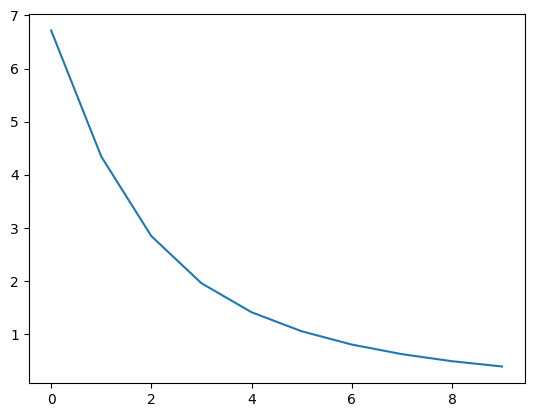

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [ ]:
def evaluate(prime_str='this process', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden().cuda()

    for p in range(predict_len):
        
        prime_input = torch.tensor([word_to_ix[w] for w in prime_str.split()], dtype=torch.long).cuda()
        inp = prime_input[-2:] #last two words as input
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted word to string and use as next input
        predicted_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(top_i)]
        prime_str += " " + predicted_word
#         inp = torch.tensor(word_to_ix[predicted_word], dtype=torch.long)

    return prime_str

In [ ]:
print(evaluate('nices city center', 40, temperature=1))


nices city center embassy quarter harbor valley additional amenity hotel sorry information available selected language shown en property location located alf ringhotel bömers mosellandhotel rural location within vicinity prinzenkopf lookout calmont klettersteig this hotel within vicinity vulkaneifel thermal spa mont royalrooms stay one


In [ ]:
print(evaluate('additional amenity', 40, temperature=1))


additional amenity convenience like wireless internet access additional feature hotel include union station pepsi center united castle mall 4 snack college daily hot breakfast served every day main fresh regional produce enjoy cocktail cigar lounge lunch onsite restaurant free local call free
